In [1004]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

import sys
sys.path.insert(0, 'C:\\Users\\dario\\Documents\\Bootcamp_DS\\Ejercicios\\Project_I_EDA\\Proyecto\\src\\utils')
from funciones import *
from bootcampviztools import *

In [1005]:
# Cargo el dataset que ya teníamos 
df_sat = pd.read_csv("./data/processed/satisfaccion_EU_filtrado.csv", index_col=0)

In [1006]:
# Cargo datos de ingresos para enriquecer el dataset

df_ingresos = pd.read_csv("./data/raw/ingresos_EU.csv")

In [1007]:
# Vamos a crear una leyenda para las columnas "isced11" y "geo" para poder consultar qué significan si lo necesitamos y así poder eliminar las columnas duplicadas

dict_educación = {"nivel_educativo (isced11)":  df_sat.isced11.unique(),
                  "descripcion": df_sat["International Standard Classification of Education (ISCED 2011)"].unique()}
df_isced11 = pd.DataFrame(dict_educación)
df_isced11

,nivel_educativo (isced11),descripcion
0,ED0-2,"Less than primary, primary and lower secondary..."
1,ED3_4,Upper secondary and post-secondary non-tertiar...
2,ED5-8,Tertiary education (levels 5-8)
3,TOTAL,All ISCED 2011 levels


In [1008]:
df_sat
dict_geo = {"codigo_entidad":  df_sat.geo.unique(),
            "entidad_geopolítica": df_sat["Geopolitical entity (reporting)"].unique()}
df_geo = pd.DataFrame(dict_geo)
df_geo

,codigo_entidad,entidad_geopolítica
0,AL,Albania
1,AT,Austria
2,BE,Belgium
3,BG,Bulgaria
4,CH,Switzerland
5,CY,Cyprus
6,CZ,Czechia
7,DE,Germany
8,DK,Denmark
9,EA20,Euro area – 20 countries (from 2023)


In [1009]:
# Ahora las grabamos en csv

df_isced11.to_csv("./data/info/leyenda_educacion.csv")
df_geo.to_csv("./data/info/leyenda_paises.csv")

In [1010]:
# Ya podemos eliminar las columnas

df_sat.drop(columns=["International Standard Classification of Education (ISCED 2011)", "Geopolitical entity (reporting)"], inplace=True)

In [1011]:
df_sat.columns

Index(['freq', 'statinfo', 'Unit of measure', 'isced11', 'sex', 'age', 'geo',
       'TIME_PERIOD', 'OBS_VALUE'],
      dtype='object')

In [1012]:
# Además, voy a deshacerme también de las columnas 'freq', 'statinfo', 'Unit of measure', ya que, aunque es información relevante, son constantes
# Por este motivo no me resulta interesante tenerlas en mi dataset, aunque sí las voy a guardar en un fichero csv para poder consultarlas si lo necesito
df_info_sat_gen = pd.DataFrame(df_sat[['freq', 'statinfo', 'Unit of measure']].loc[1]).T
df_info_sat_gen.to_csv("./data/info/info_satisfaccion_gen.csv")

In [1013]:
# Eliminamos las columnas

df_sat.drop(columns=['freq', 'statinfo', 'Unit of measure'], inplace=True)

Voy a ver cuántos registros tengo por año para ver si trabajo con todos los años o me quedo solo con algunos.

In [1014]:
# Utilizamos un value_counts para ordenar las frecuencias de mayor a menor y ver más claramente para qué países no tenemos registros de algún año 
# (tenemos que hacerlo así porque no son nulos, simplemente no aparecen)

frecuencia_geo = df_sat.geo.value_counts()
frecuencia_geo

geo
AT           936
BE           936
BG           936
CZ           936
CY           936
DK           936
DE           936
TR           936
SK           936
EE           936
EL           936
EU27_2020    936
ES           936
FI           936
FR           936
IT           936
HR           936
HU           936
IE           936
LU           936
LT           936
MT           936
LV           936
SI           936
PT           936
NO           936
NL           936
PL           936
RO           936
SE           936
CH           780
RS           780
ME           624
EA20         468
AL           312
IS           312
MK           312
UK           312
XK           156
Name: count, dtype: int64

In [1015]:
# Compruebo qué países no tiene registros

for i in frecuencia_geo.index:
    print(i, "--->", df_sat.loc[df_sat.geo == i, "TIME_PERIOD"].unique())

AT ---> [2013 2018 2021 2022 2023 2024]
BE ---> [2013 2018 2021 2022 2023 2024]
BG ---> [2013 2018 2021 2022 2023 2024]
CZ ---> [2013 2018 2021 2022 2023 2024]
CY ---> [2013 2018 2021 2022 2023 2024]
DK ---> [2013 2018 2021 2022 2023 2024]
DE ---> [2013 2018 2021 2022 2023 2024]
TR ---> [2013 2018 2021 2022 2023 2024]
SK ---> [2013 2018 2021 2022 2023 2024]
EE ---> [2013 2018 2021 2022 2023 2024]
EL ---> [2013 2018 2021 2022 2023 2024]
EU27_2020 ---> [2013 2018 2021 2022 2023 2024]
ES ---> [2013 2018 2021 2022 2023 2024]
FI ---> [2013 2018 2021 2022 2023 2024]
FR ---> [2013 2018 2021 2022 2023 2024]
IT ---> [2013 2018 2021 2022 2023 2024]
HR ---> [2013 2018 2021 2022 2023 2024]
HU ---> [2013 2018 2021 2022 2023 2024]
IE ---> [2013 2018 2021 2022 2023 2024]
LU ---> [2013 2018 2021 2022 2023 2024]
LT ---> [2013 2018 2021 2022 2023 2024]
MT ---> [2013 2018 2021 2022 2023 2024]
LV ---> [2013 2018 2021 2022 2023 2024]
SI ---> [2013 2018 2021 2022 2023 2024]
PT ---> [2013 2018 2021 2022 2023

In [1016]:
df_sat["TIME_PERIOD"].value_counts()

TIME_PERIOD
2018    5928
2013    5616
2021    5304
2022    5304
2023    5148
2024    4836
Name: count, dtype: int64

Finalmente me voy a quedar con los registros de 2021 a 2024, ya que son los datos más actuales y tengo los datos de los 4 años seguidos, no tengo discontinuidades. Elimino los registros de 2013 y 2018. De este modo elimino también algunos países que solo tienen registros en estos años.

In [1017]:
ind_eliminar = df_sat.loc[(df_sat.TIME_PERIOD == 2013) | (df_sat.TIME_PERIOD == 2018)].index
df_sat.drop(index=ind_eliminar, inplace=True)

Ahora voy a comprobar a qué países les faltan registros de algún año y, si son pocos, los voy a eliminar. Hago esto en este punto para empezar a enriquecer el dataset con otros datos teniendo ya las categorías definitivas (o por lo menos una aproximación bastante precisa).

In [1018]:
frecuencia_geo = df_sat.geo.value_counts()
frecuencia_geo

geo
AT           624
BE           624
BG           624
SK           624
CY           624
CZ           624
DE           624
EE           624
DK           624
ES           624
EL           624
FR           624
HR           624
EU27_2020    624
FI           624
HU           624
IE           624
LT           624
IT           624
TR           624
PT           624
LU           624
LV           624
MT           624
NL           624
NO           624
PL           624
RO           624
SI           624
SE           624
CH           468
RS           468
EA20         468
ME           312
AL           156
Name: count, dtype: int64

In [1019]:
lista_eliminar = []
for i in frecuencia_geo.index:
    print(i, "--->", df_sat.loc[df_sat.geo == i, "TIME_PERIOD"].unique())
    if len(df_sat.loc[df_sat.geo == i, "TIME_PERIOD"].unique()) < 4:
        lista_eliminar.append(i)

AT ---> [2021 2022 2023 2024]
BE ---> [2021 2022 2023 2024]
BG ---> [2021 2022 2023 2024]
SK ---> [2021 2022 2023 2024]
CY ---> [2021 2022 2023 2024]
CZ ---> [2021 2022 2023 2024]
DE ---> [2021 2022 2023 2024]
EE ---> [2021 2022 2023 2024]
DK ---> [2021 2022 2023 2024]
ES ---> [2021 2022 2023 2024]
EL ---> [2021 2022 2023 2024]
FR ---> [2021 2022 2023 2024]
HR ---> [2021 2022 2023 2024]
EU27_2020 ---> [2021 2022 2023 2024]
FI ---> [2021 2022 2023 2024]
HU ---> [2021 2022 2023 2024]
IE ---> [2021 2022 2023 2024]
LT ---> [2021 2022 2023 2024]
IT ---> [2021 2022 2023 2024]
TR ---> [2021 2022 2023 2024]
PT ---> [2021 2022 2023 2024]
LU ---> [2021 2022 2023 2024]
LV ---> [2021 2022 2023 2024]
MT ---> [2021 2022 2023 2024]
NL ---> [2021 2022 2023 2024]
NO ---> [2021 2022 2023 2024]
PL ---> [2021 2022 2023 2024]
RO ---> [2021 2022 2023 2024]
SI ---> [2021 2022 2023 2024]
SE ---> [2021 2022 2023 2024]
CH ---> [2021 2022 2023]
RS ---> [2021 2022 2023]
EA20 ---> [2022 2023 2024]
ME ---> [2021 20

In [1020]:
lista_eliminar

['CH', 'RS', 'EA20', 'ME', 'AL']

En vista de los resultados, voy a eliminar los 4 países a los que les faltan registros de algún año, ya que no son muchos y también los registros de la zona Euro, ya que faltan los registros de 2021.

In [1021]:
for i in lista_eliminar:
    ind_eliminar = df_sat.loc[df_sat.geo == i].index
    df_sat.drop(index=ind_eliminar, inplace=True)

In [1022]:
frecuencia_geo = df_sat.geo.value_counts()
for i in frecuencia_geo.index:
    print(i, "--->", df_sat.loc[df_sat.geo == i, "TIME_PERIOD"].unique())

AT ---> [2021 2022 2023 2024]
BE ---> [2021 2022 2023 2024]
BG ---> [2021 2022 2023 2024]
CY ---> [2021 2022 2023 2024]
CZ ---> [2021 2022 2023 2024]
DE ---> [2021 2022 2023 2024]
DK ---> [2021 2022 2023 2024]
EE ---> [2021 2022 2023 2024]
EL ---> [2021 2022 2023 2024]
ES ---> [2021 2022 2023 2024]
EU27_2020 ---> [2021 2022 2023 2024]
FI ---> [2021 2022 2023 2024]
FR ---> [2021 2022 2023 2024]
HR ---> [2021 2022 2023 2024]
HU ---> [2021 2022 2023 2024]
IE ---> [2021 2022 2023 2024]
IT ---> [2021 2022 2023 2024]
LT ---> [2021 2022 2023 2024]
LU ---> [2021 2022 2023 2024]
LV ---> [2021 2022 2023 2024]
MT ---> [2021 2022 2023 2024]
NL ---> [2021 2022 2023 2024]
NO ---> [2021 2022 2023 2024]
PL ---> [2021 2022 2023 2024]
PT ---> [2021 2022 2023 2024]
RO ---> [2021 2022 2023 2024]
SE ---> [2021 2022 2023 2024]
SI ---> [2021 2022 2023 2024]
SK ---> [2021 2022 2023 2024]
TR ---> [2021 2022 2023 2024]


In [1023]:
# Compruebo mi número de registros por año
df_sat.TIME_PERIOD.value_counts()

TIME_PERIOD
2021    4680
2022    4680
2023    4680
2024    4680
Name: count, dtype: int64

Ahora voy a añadir los datos de ingresos por edad y género a mi dataset.

In [1024]:
# Visualizo el dataset de ingresos y voy a seguir los mismos pasos que antes para eliminar algunas columnas que no vayan a aportarme nada rápidamente, 
# en este caso además la columna que me interesa es "OBS_VALUE", aunque necesito otras variables para coger los datos, como "age" y "geo"
df_ingresos.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,age,Age class,sex,Sex,indic_il,...,geo,Geopolitical entity (reporting),TIME_PERIOD,Time,OBS_VALUE,Observation value,OBS_FLAG,Observation status (Flag) V2 structure,CONF_STATUS,Confidentiality status (flag)
0,dataflow,ESTAT:ILC_DI03(1.0),Mean and median income by age and sex,A,Annual,TOTAL,Total,F,Females,MED_E,...,AL,Albania,2018,NaN,1972,NaN,NaN,NaN,NaN,NaN
1,dataflow,ESTAT:ILC_DI03(1.0),Mean and median income by age and sex,A,Annual,TOTAL,Total,F,Females,MED_E,...,AL,Albania,2021,NaN,2574,NaN,NaN,NaN,NaN,NaN
2,dataflow,ESTAT:ILC_DI03(1.0),Mean and median income by age and sex,A,Annual,TOTAL,Total,F,Females,MED_E,...,AT,Austria,2013,NaN,21629,NaN,NaN,NaN,NaN,NaN
3,dataflow,ESTAT:ILC_DI03(1.0),Mean and median income by age and sex,A,Annual,TOTAL,Total,F,Females,MED_E,...,AT,Austria,2018,NaN,24675,NaN,NaN,NaN,NaN,NaN
4,dataflow,ESTAT:ILC_DI03(1.0),Mean and median income by age and sex,A,Annual,TOTAL,Total,F,Females,MED_E,...,AT,Austria,2021,NaN,27048,NaN,NaN,NaN,NaN,NaN


In [1025]:
df_ingresos.columns

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'freq', 'Time frequency',
       'age', 'Age class', 'sex', 'Sex', 'indic_il',
       'Income and living conditions indicator', 'unit', 'Unit of measure',
       'geo', 'Geopolitical entity (reporting)', 'TIME_PERIOD', 'Time',
       'OBS_VALUE', 'Observation value', 'OBS_FLAG',
       'Observation status (Flag) V2 structure', 'CONF_STATUS',
       'Confidentiality status (flag)'],
      dtype='object')

In [1026]:
# Hago una lista con las columnas de las que creo que puedo prescindir, para hacer una análisis rápido de su cardinalidad

lista_no_relevantes = ['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'Time frequency', 'unit', 'Sex', 'Age class', 'Observation value', 'OBS_FLAG', 'Time',
       'Observation status (Flag) V2 structure', 'CONF_STATUS',
       'Confidentiality status (flag)']

dict_cardi = {}
for i in lista_no_relevantes:
    dict_cardi[i] = df_ingresos[i].nunique() / len(df_ingresos)
    print(f"{i}-->{dict_cardi[i]}")

STRUCTURE-->1.1930326890956813e-05
STRUCTURE_ID-->1.1930326890956813e-05
STRUCTURE_NAME-->1.1930326890956813e-05
Time frequency-->1.1930326890956813e-05
unit-->3.579098067287044e-05
Sex-->3.579098067287044e-05
Age class-->0.00026246719160104987
Observation value-->0.0
OBS_FLAG-->3.579098067287044e-05
Time-->0.0
Observation status (Flag) V2 structure-->3.579098067287044e-05
CONF_STATUS-->0.0
Confidentiality status (flag)-->0.0


In [1027]:
# Hago un value_counts de las columnas con una cardinalidad mayor a 0, aunque algunas ya están descartadas por ser dobles

for i in lista_no_relevantes:
    if dict_cardi[i] > 0.000001:
        print(df_ingresos[i].value_counts()) 

STRUCTURE
dataflow    83820
Name: count, dtype: int64
STRUCTURE_ID
ESTAT:ILC_DI03(1.0)    83820
Name: count, dtype: int64
STRUCTURE_NAME
Mean and median income by age and sex    83820
Name: count, dtype: int64
Time frequency
Annual    83820
Name: count, dtype: int64
unit
EUR    29304
PPS    28512
NAC    26004
Name: count, dtype: int64
Sex
Females    27940
Males      27940
Total      27940
Name: count, dtype: int64
Age class
Total                  3810
From 12 to 17 years    3810
From 16 to 24 years    3810
From 16 to 64 years    3810
From 18 to 24 years    3810
From 18 to 64 years    3810
From 25 to 49 years    3810
From 25 to 54 years    3810
From 50 to 64 years    3810
From 55 to 64 years    3810
From 6 to 11 years     3810
16 years or over       3810
18 years or over       3810
60 years or over       3810
65 years or over       3810
75 years or over       3810
Less than 16 years     3810
Less than 18 years     3810
Less than 6 years      3810
Less than 60 years     3810
Less than 65

In [1028]:
# Me deshago de las que no considero relevantes

df_ingresos.drop(columns=lista_no_relevantes, inplace=True)

In [1029]:
# Según las categorías de edad de un df y de otro voy a crear en df_sat una columna que encaje con las edades de df_ingresos

df_sat["age"].value_counts()

age
Y16-19    1440
Y16-24    1440
Y16-29    1440
Y20-24    1440
Y25-29    1440
Y25-34    1440
Y25-64    1440
Y35-49    1440
Y50-64    1440
Y65-74    1440
Y_GE16    1440
Y_GE65    1440
Y_GE75    1440
Name: count, dtype: int64

In [1030]:
df_ingresos["age"].value_counts()

age
TOTAL     3810
Y12-17    3810
Y16-24    3810
Y16-64    3810
Y18-24    3810
Y18-64    3810
Y25-49    3810
Y25-54    3810
Y50-64    3810
Y55-64    3810
Y6-11     3810
Y_GE16    3810
Y_GE18    3810
Y_GE60    3810
Y_GE65    3810
Y_GE75    3810
Y_LT16    3810
Y_LT18    3810
Y_LT6     3810
Y_LT60    3810
Y_LT65    3810
Y_LT75    3810
Name: count, dtype: int64

In [1031]:
df_sat["age_ingresos"] = "Y16-24"

In [1032]:
df_sat.loc[(df_sat["age"] == "Y25-29") | (df_sat["age"] == "Y25-34") | (df_sat["age"] == "Y35-49"), "age_ingresos"] = "Y25-49"

In [1033]:
df_sat.loc[(df_sat["age"] == "Y50-64"), "age_ingresos"] = "Y50-64"

In [1034]:
df_sat.loc[(df_sat["age"] == "Y65-74") | (df_sat["age"] == "Y_GE65"), "age_ingresos"] = "Y_GE65"

In [1035]:
df_sat.loc[(df_sat["age"] == "Y_GE75"), "age_ingresos"] = "Y_GE75"

In [1036]:
df_sat.loc[(df_sat["age"] == "Y_GE16"), "age_ingresos"] = "Y_GE16"

Ya tengo la nueva columna, faltan algunos rangos de edad que no encajan demasiado bien y que solucionaré más adelante.

In [1037]:
df_sat.head()

,isced11,sex,age,geo,TIME_PERIOD,OBS_VALUE,age_ingresos
4,ED0-2,F,Y16-19,AT,2021,8.2,Y16-24
5,ED0-2,F,Y16-19,AT,2022,8.1,Y16-24
6,ED0-2,F,Y16-19,AT,2023,7.9,Y16-24
7,ED0-2,F,Y16-19,AT,2024,7.7,Y16-24
10,ED0-2,F,Y16-19,BE,2021,7.5,Y16-24


In [1038]:
df_ingresos.head()

,freq,age,sex,indic_il,Income and living conditions indicator,Unit of measure,geo,Geopolitical entity (reporting),TIME_PERIOD,OBS_VALUE
0,A,TOTAL,F,MED_E,Median equivalised net income,Euro,AL,Albania,2018,1972
1,A,TOTAL,F,MED_E,Median equivalised net income,Euro,AL,Albania,2021,2574
2,A,TOTAL,F,MED_E,Median equivalised net income,Euro,AT,Austria,2013,21629
3,A,TOTAL,F,MED_E,Median equivalised net income,Euro,AT,Austria,2018,24675
4,A,TOTAL,F,MED_E,Median equivalised net income,Euro,AT,Austria,2021,27048


In [1039]:
# Voy a unir las dos tablas, lo hago de esta manera porque me permite añadir los datos directamente en las dos variables nuevas que he creado

# Defino primero las condiciones constantes
cond_indic_1 = df_ingresos["indic_il"] == "MEI_E"
cond_indic_2 = df_ingresos["indic_il"] == "MED_E"
cond_euro = df_ingresos["Unit of measure"] == "Euro"
for i in df_ingresos["age"].unique(): # Recorro todos los valores de "age" en el df_ingresos y de la nueva columna "age_ingresos" en df_sat y defino las condiciones necesarias para cada df
    cond_1 = df_sat["age_ingresos"] == i
    cond_1_1 = df_ingresos["age"] == i
    for j in df_sat["geo"].unique(): # Recorro todas las áreas geográficas
        cond_2 = df_sat["geo"] == j
        cond_2_2 = df_ingresos["geo"] == j
        for k in df_sat["sex"].unique(): # Recorro todos los valores de género
            cond_3 = df_sat["sex"] == k
            cond_3_3 = df_ingresos["sex"] == k
            for h in df_sat["TIME_PERIOD"].unique(): # Recorro todos los periodos de tiempo
                cond_4 = df_sat["TIME_PERIOD"] == h
                cond_4_4 = df_ingresos["TIME_PERIOD"] == h
                # Con las condiciones definidas, obtengo la media y la mediana para todos los grupos
                # Como tengo datos de media y mediana de ingresos, en vez de doblar registros creo dos variables nuevas en las que voy a guardar los datos de ingresos
                media = df_ingresos.loc[cond_1_1 & cond_2_2 & cond_3_3 & cond_4_4 & cond_indic_1 & cond_euro, "OBS_VALUE"]
                mediana = df_ingresos.loc[cond_1_1 & cond_2_2 & cond_3_3 & cond_4_4 & cond_indic_2 & cond_euro, "OBS_VALUE"]
                if len(media) > 0: # Como media y mediana son series, cuando tengo registros, me quedo con el primer (y único) valor
                    df_sat.loc[cond_1 & cond_2 & cond_3 & cond_4, "media_ingresos"] = media.iloc[0]
                if len(media) > 0:
                    df_sat.loc[cond_1 & cond_2 & cond_3 & cond_4, "mediana_ingresos"] = mediana.iloc[0]

In [1040]:
df_sat.loc[df_sat.geo == "AT"].head(20)

,isced11,sex,age,geo,TIME_PERIOD,OBS_VALUE,age_ingresos,media_ingresos,mediana_ingresos
4,ED0-2,F,Y16-19,AT,2021,8.2,Y16-24,28228.0,27305.0
5,ED0-2,F,Y16-19,AT,2022,8.1,Y16-24,28058.0,26070.0
6,ED0-2,F,Y16-19,AT,2023,7.9,Y16-24,32885.0,30700.0
7,ED0-2,F,Y16-19,AT,2024,7.7,Y16-24,33804.0,31026.0
210,ED0-2,F,Y16-24,AT,2021,8.2,Y16-24,28228.0,27305.0
211,ED0-2,F,Y16-24,AT,2022,8.1,Y16-24,28058.0,26070.0
212,ED0-2,F,Y16-24,AT,2023,7.8,Y16-24,32885.0,30700.0
213,ED0-2,F,Y16-24,AT,2024,7.7,Y16-24,33804.0,31026.0
416,ED0-2,F,Y16-29,AT,2021,8.2,Y16-24,28228.0,27305.0
417,ED0-2,F,Y16-29,AT,2022,8.1,Y16-24,28058.0,26070.0


Ahora voy a resolver las categorías de edad que me habían quedado pendientes

In [1041]:
df_sat["age"].value_counts()

age
Y16-19    1440
Y16-24    1440
Y16-29    1440
Y20-24    1440
Y25-29    1440
Y25-34    1440
Y25-64    1440
Y35-49    1440
Y50-64    1440
Y65-74    1440
Y_GE16    1440
Y_GE65    1440
Y_GE75    1440
Name: count, dtype: int64

In [1042]:
df_ingresos["age"].value_counts()

age
TOTAL     3810
Y12-17    3810
Y16-24    3810
Y16-64    3810
Y18-24    3810
Y18-64    3810
Y25-49    3810
Y25-54    3810
Y50-64    3810
Y55-64    3810
Y6-11     3810
Y_GE16    3810
Y_GE18    3810
Y_GE60    3810
Y_GE65    3810
Y_GE75    3810
Y_LT16    3810
Y_LT18    3810
Y_LT6     3810
Y_LT60    3810
Y_LT65    3810
Y_LT75    3810
Name: count, dtype: int64

In [1043]:
# En primer lugar me deshago de la categoría "Y16-29", ya que no encaja bien con ninguna de las categorías de edad de df_ingresos 
# y además tengo 4 categorías más concretas dentro de ella

ind_eliminar = df_sat.loc[(df_sat.age == "Y16-29")].index
df_sat.drop(index=ind_eliminar, inplace=True)

In [1044]:
df_sat["age"].value_counts()

age
Y16-19    1440
Y16-24    1440
Y20-24    1440
Y25-29    1440
Y25-34    1440
Y25-64    1440
Y35-49    1440
Y50-64    1440
Y65-74    1440
Y_GE16    1440
Y_GE65    1440
Y_GE75    1440
Name: count, dtype: int64

In [1045]:
# Para df_sat.age == "Y25-64" lo que voy a hacer es rellenarlo con media de los valores de df_ingresos.age == "Y25-49" y df_ingresos.age == "Y50-64"
# con un bucle similar al que he usado para obtener los valores de ingresos en un principio

# Defino primero las condiciones constantes
cond_indic_1 = df_ingresos["indic_il"] == "MEI_E"
cond_indic_2 = df_ingresos["indic_il"] == "MED_E"
cond_euro = df_ingresos["Unit of measure"] == "Euro"
cond_age_1 = df_sat["age"] == "Y25-64"
cond_age_2 = df_ingresos["age"] == "Y25-49"
cond_age_3 = df_ingresos["age"] == "Y50-64"
for j in df_sat["geo"].unique(): # Recorro todas las áreas geográficas
    cond_2 = df_sat["geo"] == j
    cond_2_2 = df_ingresos["geo"] == j
    for k in df_sat["sex"].unique(): # Recorro todos los valores de género
        cond_3 = df_sat["sex"] == k
        cond_3_3 = df_ingresos["sex"] == k
        for h in df_sat["TIME_PERIOD"].unique(): # Recorro todos los periodos de tiempo
            cond_4 = df_sat["TIME_PERIOD"] == h
            cond_4_4 = df_ingresos["TIME_PERIOD"] == h
            # Obtengo el valor de media y mediana para cada uno de los grupos etáreos y lo guardo en variables
            media_25 = df_ingresos.loc[cond_age_2 & cond_2_2 & cond_3_3 & cond_4_4 & cond_indic_1 & cond_euro, "OBS_VALUE"]
            media_50 = df_ingresos.loc[cond_age_3 & cond_2_2 & cond_3_3 & cond_4_4 & cond_indic_1 & cond_euro, "OBS_VALUE"]
            mediana_25 = df_ingresos.loc[cond_age_2 & cond_2_2 & cond_3_3 & cond_4_4 & cond_indic_2 & cond_euro, "OBS_VALUE"]
            mediana_50 = df_ingresos.loc[cond_age_3 & cond_2_2 & cond_3_3 & cond_4_4 & cond_indic_2 & cond_euro, "OBS_VALUE"]
            if len(media_25) > 0 and len(media_25) > 0 :
                media = (media_25.iloc[0] + media_50.iloc[0]) / 2 # Calculo la media de los valores obtenidos y la asigno a la fila correspondiente del df_sat
                df_sat.loc[cond_age_1 & cond_2 & cond_3 & cond_4, "media_ingresos"] = media
            if len(mediana_25) > 0 and len(mediana_25) > 0 :
                mediana = (mediana_25.iloc[0] + mediana_50.iloc[0]) / 2
                df_sat.loc[cond_age_1 & cond_2 & cond_3 & cond_4, "mediana_ingresos"] = mediana

In [1046]:
df_sat.loc[df_sat.geo == "AT"].head(20)

,isced11,sex,age,geo,TIME_PERIOD,OBS_VALUE,age_ingresos,media_ingresos,mediana_ingresos
4,ED0-2,F,Y16-19,AT,2021,8.2,Y16-24,28228.0,27305.0
5,ED0-2,F,Y16-19,AT,2022,8.1,Y16-24,28058.0,26070.0
6,ED0-2,F,Y16-19,AT,2023,7.9,Y16-24,32885.0,30700.0
7,ED0-2,F,Y16-19,AT,2024,7.7,Y16-24,33804.0,31026.0
210,ED0-2,F,Y16-24,AT,2021,8.2,Y16-24,28228.0,27305.0
211,ED0-2,F,Y16-24,AT,2022,8.1,Y16-24,28058.0,26070.0
212,ED0-2,F,Y16-24,AT,2023,7.8,Y16-24,32885.0,30700.0
213,ED0-2,F,Y16-24,AT,2024,7.7,Y16-24,33804.0,31026.0
622,ED0-2,F,Y20-24,AT,2021,8.0,Y16-24,28228.0,27305.0
623,ED0-2,F,Y20-24,AT,2022,NaN,Y16-24,28058.0,26070.0


In [1047]:
df_sat

,isced11,sex,age,geo,TIME_PERIOD,OBS_VALUE,age_ingresos,media_ingresos,mediana_ingresos
4,ED0-2,F,Y16-19,AT,2021,8.2,Y16-24,28228.0,27305.0
5,ED0-2,F,Y16-19,AT,2022,8.1,Y16-24,28058.0,26070.0
6,ED0-2,F,Y16-19,AT,2023,7.9,Y16-24,32885.0,30700.0
7,ED0-2,F,Y16-19,AT,2024,7.7,Y16-24,33804.0,31026.0
10,ED0-2,F,Y16-19,BE,2021,7.5,Y16-24,25223.0,24390.0
...,...,...,...,...,...,...,...,...,...
32126,TOTAL,T,Y_GE75,SK,2024,6.4,Y_GE75,10654.0,10494.0
32129,TOTAL,T,Y_GE75,TR,2021,5.5,Y_GE75,4132.0,2963.0
32130,TOTAL,T,Y_GE75,TR,2022,5.6,Y_GE75,4349.0,2805.0
32131,TOTAL,T,Y_GE75,TR,2023,5.5,Y_GE75,3572.0,2615.0


In [1048]:
df_sat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17280 entries, 4 to 32132
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   isced11           17280 non-null  object 
 1   sex               17280 non-null  object 
 2   age               17280 non-null  object 
 3   geo               17280 non-null  object 
 4   TIME_PERIOD       17280 non-null  int64  
 5   OBS_VALUE         16066 non-null  float64
 6   age_ingresos      17280 non-null  object 
 7   media_ingresos    17280 non-null  float64
 8   mediana_ingresos  17280 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.3+ MB


In [1049]:
# Renombro las columnas con nombres en español
df_sat.columns = ['isced11', 'genero', 'edad', 'geo', 'periodo', 'satisfaccion_general',
       'edad_ingresos', 'media_ingresos', 'mediana_ingresos']

In [1050]:
# Cargo el dataset que contiene la capacidad para hacer frente a necesidades inesperadas

df_nec = pd.read_csv("./data/raw/necesidades_inesperadas.csv")

In [1051]:
df_sat.head()

,isced11,genero,edad,geo,periodo,satisfaccion_general,edad_ingresos,media_ingresos,mediana_ingresos
4,ED0-2,F,Y16-19,AT,2021,8.2,Y16-24,28228.0,27305.0
5,ED0-2,F,Y16-19,AT,2022,8.1,Y16-24,28058.0,26070.0
6,ED0-2,F,Y16-19,AT,2023,7.9,Y16-24,32885.0,30700.0
7,ED0-2,F,Y16-19,AT,2024,7.7,Y16-24,33804.0,31026.0
10,ED0-2,F,Y16-19,BE,2021,7.5,Y16-24,25223.0,24390.0


In [1052]:
df_nec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   STRUCTURE                               125 non-null    object 
 1   STRUCTURE_ID                            125 non-null    object 
 2   STRUCTURE_NAME                          125 non-null    object 
 3   freq                                    125 non-null    object 
 4   Time frequency                          125 non-null    object 
 5   unit                                    125 non-null    object 
 6   Unit of measure                         125 non-null    object 
 7   geo                                     125 non-null    object 
 8   Geopolitical entity (reporting)         125 non-null    object 
 9   TIME_PERIOD                             125 non-null    int64  
 10  Time                                    0 non-null      float6

Voy a incorporar los datos a mi dataset, directamente con un bucle similar al del caso anterior.

In [1053]:
# Primero creo la columna "afrontar_imprevistos"
df_sat["no_afrontar_imprevistos(%)"] = None

In [1054]:
for i in df_sat["geo"].unique(): # Recorro todos los valores de "geo" y defino las condiciones necesarias para cada df
    cond_1 = df_sat["geo"] == i
    cond_1_1 = df_nec["geo"] == i
    for j in df_sat["periodo"].unique(): # Recorro todos los años
        cond_2 = df_sat["periodo"] == j
        cond_2_2 = df_nec["TIME_PERIOD"] == j
        # Con las condiciones definidas, obtengo el porcentaje de personas que no puede hacer frente a las necesidades inesperadas
        nec = df_nec.loc[cond_1_1 & cond_2_2, "OBS_VALUE"]
        if len(nec) > 0: # Como "nec" es una serie, cuando tengo registros, me quedo con el primer (y único) valor
            df_sat.loc[cond_1 & cond_2, "no_afrontar_imprevistos(%)"] = nec.iloc[0]

In [1055]:
df_sat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17280 entries, 4 to 32132
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   isced11                     17280 non-null  object 
 1   genero                      17280 non-null  object 
 2   edad                        17280 non-null  object 
 3   geo                         17280 non-null  object 
 4   periodo                     17280 non-null  int64  
 5   satisfaccion_general        16066 non-null  float64
 6   edad_ingresos               17280 non-null  object 
 7   media_ingresos              17280 non-null  float64
 8   mediana_ingresos            17280 non-null  float64
 9   no_afrontar_imprevistos(%)  16704 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.5+ MB


### Limpieza

In [1056]:

df_sat

,isced11,genero,edad,geo,periodo,satisfaccion_general,edad_ingresos,media_ingresos,mediana_ingresos,no_afrontar_imprevistos(%)
4,ED0-2,F,Y16-19,AT,2021,8.2,Y16-24,28228.0,27305.0,18.6
5,ED0-2,F,Y16-19,AT,2022,8.1,Y16-24,28058.0,26070.0,19.0
6,ED0-2,F,Y16-19,AT,2023,7.9,Y16-24,32885.0,30700.0,22.8
7,ED0-2,F,Y16-19,AT,2024,7.7,Y16-24,33804.0,31026.0,20.9
10,ED0-2,F,Y16-19,BE,2021,7.5,Y16-24,25223.0,24390.0,22.3
...,...,...,...,...,...,...,...,...,...,...
32126,TOTAL,T,Y_GE75,SK,2024,6.4,Y_GE75,10654.0,10494.0,28.2
32129,TOTAL,T,Y_GE75,TR,2021,5.5,Y_GE75,4132.0,2963.0,33.4
32130,TOTAL,T,Y_GE75,TR,2022,5.6,Y_GE75,4349.0,2805.0,31.1
32131,TOTAL,T,Y_GE75,TR,2023,5.5,Y_GE75,3572.0,2615.0,31.8


In [1057]:
# Primero vamos a ver si tenemos algún duplicado

In [1058]:
df_sat.duplicated().value_counts()

False    17280
Name: count, dtype: int64

In [1059]:
# Vamos a ver si tenemos nulos

df_sat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17280 entries, 4 to 32132
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   isced11                     17280 non-null  object 
 1   genero                      17280 non-null  object 
 2   edad                        17280 non-null  object 
 3   geo                         17280 non-null  object 
 4   periodo                     17280 non-null  int64  
 5   satisfaccion_general        16066 non-null  float64
 6   edad_ingresos               17280 non-null  object 
 7   media_ingresos              17280 non-null  float64
 8   mediana_ingresos            17280 non-null  float64
 9   no_afrontar_imprevistos(%)  16704 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.5+ MB


Tenemos nulos en las columnas "satisfaccion_general" y "no_afrontar_imprevistos(%)". Vamos a tratarlas una por una. En principio vamos a intentar sustituir los missings para que los datos sigan siendo simétricos y no nos falten datos de unos países que tenemos en otros.  

In [1060]:
# Vamos a ver cuáles son los nulos para ver si podemos reemplazarlos con algún valor
indice_nulo = df_sat.loc[df_sat.satisfaccion_general.isna()].index

In [1061]:
df_sat.head(3)

,isced11,genero,edad,geo,periodo,satisfaccion_general,edad_ingresos,media_ingresos,mediana_ingresos,no_afrontar_imprevistos(%)
4,ED0-2,F,Y16-19,AT,2021,8.2,Y16-24,28228.0,27305.0,18.6
5,ED0-2,F,Y16-19,AT,2022,8.1,Y16-24,28058.0,26070.0,19.0
6,ED0-2,F,Y16-19,AT,2023,7.9,Y16-24,32885.0,30700.0,22.8


In [1062]:
# Veamos si, por lo general, para los grupos con valores de satisfacción nulos tenemos valores de otros años
mascara = []
for i in indice_nulo:
    fila = df_sat.loc[i]
    cond_1 = df_sat["isced11"] == fila["isced11"]
    cond_2 = df_sat["genero"] == fila["genero"]
    cond_3 = df_sat["edad"] == fila["edad"]
    cond_4 = df_sat["geo"] == fila["geo"]
    print(df_sat.loc[cond_1 & cond_2 & cond_3 & cond_4, "satisfaccion_general"])
    if df_sat.loc[cond_1 & cond_2 & cond_3 & cond_4, "satisfaccion_general"].value_counts(dropna = False)[np.nan] < 3: # Consideramos que solo podemos sustituir con la media si tenemos por lo menos registro de otros 2 años
        mascara.append(True)
    else:
        mascara.append(False)

39    NaN
40    6.6
41    7.6
42    7.5
Name: satisfaccion_general, dtype: float64
72    NaN
73    7.7
74    7.8
75    7.7
Name: satisfaccion_general, dtype: float64
140    NaN
141    NaN
142    NaN
143    7.8
Name: satisfaccion_general, dtype: float64
140    NaN
141    NaN
142    NaN
143    7.8
Name: satisfaccion_general, dtype: float64
140    NaN
141    NaN
142    NaN
143    7.8
Name: satisfaccion_general, dtype: float64
164    NaN
165    7.0
166    8.9
167    7.4
Name: satisfaccion_general, dtype: float64
187    NaN
188    8.5
189    8.1
190    8.6
Name: satisfaccion_general, dtype: float64
245    NaN
246    6.3
247    7.3
248    7.3
Name: satisfaccion_general, dtype: float64
278    NaN
279    7.4
280    7.6
281    7.5
Name: satisfaccion_general, dtype: float64
370    NaN
371    6.7
372    8.9
373    7.4
Name: satisfaccion_general, dtype: float64
622    8.0
623    NaN
624    7.3
625    7.6
Name: satisfaccion_general, dtype: float64
645   NaN
646   NaN
647   NaN
648   NaN
Name: satis

In [1063]:
mascara = pd.Series(mascara)
mascara.value_counts()

False    701
True     513
Name: count, dtype: int64

Vemos que la mayoría de los valores no podemos sustituirlos por la media de el mismo grupo de personas en otros años, así que los sustituiremos por la media del mismo grupo de personas en el resto de países en el mismo año (podríamos usar directamente los valores de "EU27", pero algunos países no son de la UE).

In [1064]:
df_sat.head(3)

,isced11,genero,edad,geo,periodo,satisfaccion_general,edad_ingresos,media_ingresos,mediana_ingresos,no_afrontar_imprevistos(%)
4,ED0-2,F,Y16-19,AT,2021,8.2,Y16-24,28228.0,27305.0,18.6
5,ED0-2,F,Y16-19,AT,2022,8.1,Y16-24,28058.0,26070.0,19.0
6,ED0-2,F,Y16-19,AT,2023,7.9,Y16-24,32885.0,30700.0,22.8


In [1065]:
# En "lista_eliminar" vamos a obtener el primer elemento de los grupos de personas que solo tienen valores en menos de 15 países, 
# en estos grupos consideros que no tengo suficientes datos para que la media sea representativa y los voy a eliminar, para los demás grupos,
#  me quedaré con la media del año de todos los países para ese grupo

lista_eliminar = []
lista_grupos_eliminar = []
lista_no = []
lista_media = []
for i in indice_nulo: # recorro todos los valores nulos de la variable "satisfaccion_general"
    fila = df_sat.loc[i]
    cond_1 = df_sat["isced11"] == fila["isced11"]
    cond_2 = df_sat["genero"] == fila["genero"]
    cond_3 = df_sat["edad"] == fila["edad"]
    cond_4 = df_sat["periodo"] == fila["periodo"]
    cond_5 = df_sat["geo"] == fila["geo"]

    # Me quedo con los valores de todos los países para cada uno de los grupos concretos y compruebo que no haya más de 15 nulos
    if df_sat.loc[cond_1 & cond_2 & cond_3 & cond_4, "satisfaccion_general"].value_counts(dropna=False)[np.nan] > 16 and i not in lista_no:
        lista_grupos_eliminar.append(i) # antes de eliminar los valores quiero ver a qué grupos pertenecen
        for j in df_sat.loc[cond_1 & cond_2 & cond_3 & cond_4, "satisfaccion_general"].index:
            lista_eliminar.append(j) # Si hay más de 15 nulos añado todos los índices a la lista_eliminar para luego eliminarlos 
            lista_no.append(j)# Añado los índices de todo este grupo a la lista_no para no volver a consultarlos, ya los tengo en la lista para eliminar
            
    elif df_sat.loc[cond_1 & cond_2 & cond_3 & cond_4, "satisfaccion_general"].value_counts(dropna=False)[np.nan] <= 16 and i not in lista_no:
        lista_media.append(i) # Si hay menos de 15 nulos añado el primer valor a la lista para hacer la media (lo que me interesa son las categorías del grupo, con una fila me vale)
        for j in df_sat.loc[cond_1 & cond_2 & cond_3 & cond_4, "satisfaccion_general"].index:
            lista_no.append(j)
    
    

In [1066]:
len(df_sat["geo"].unique())

30

In [1067]:
df_sat.loc[lista_grupos_eliminar] # Compruebo los grupos

,isced11,genero,edad,geo,periodo,satisfaccion_general,edad_ingresos,media_ingresos,mediana_ingresos,no_afrontar_imprevistos(%)
623,ED0-2,F,Y20-24,AT,2022,NaN,Y16-24,28058.0,26070.0,19.0
829,ED0-2,F,Y25-29,AT,2022,NaN,Y25-49,30329.0,28176.0,19.0
16072,ED5-8,F,Y16-19,AT,2021,NaN,Y16-24,28228.0,27305.0,18.6
16073,ED5-8,F,Y16-19,AT,2022,NaN,Y16-24,28058.0,26070.0,19.0
16074,ED5-8,F,Y16-19,AT,2023,NaN,Y16-24,32885.0,30700.0,22.8
16075,ED5-8,F,Y16-19,AT,2024,NaN,Y16-24,33804.0,31026.0,20.9
18750,ED5-8,M,Y16-19,AT,2021,NaN,Y16-24,29570.0,27744.0,18.6
18751,ED5-8,M,Y16-19,AT,2022,NaN,Y16-24,28641.0,27758.0,19.0
18752,ED5-8,M,Y16-19,AT,2023,NaN,Y16-24,33284.0,31900.0,22.8
18753,ED5-8,M,Y16-19,AT,2024,NaN,Y16-24,37334.0,35048.0,20.9


Vemos que por las características de los grupos, hay muchos en los que no puede haber personas por la edad y el nivel de estudios, hay 2 en los que sí hay personas, pero es que haya pocas y quizá por eso no se han conseguido datos, también por edad y nivel de estudios (nivel de estudios muy bajo para la edad en el momento actual).

In [1068]:
df_sat.loc[lista_eliminar].satisfaccion_general.value_counts(dropna=False) # Miro cuántos registros que sí tienen datos voy a eliminar para asegurarme de que no son muchos

satisfaccion_general
NaN    393
7.2      4
6.9      3
7.4      2
5.0      2
7.0      2
8.2      1
5.9      1
7.5      1
6.7      1
6.6      1
6.5      1
7.3      1
5.1      1
5.6      1
6.8      1
7.8      1
7.6      1
4.9      1
8.3      1
Name: count, dtype: int64

In [1069]:
df_sat.drop(index=lista_eliminar, inplace=True)

Tras haber eliminado los grupos que tenían muy pocos valores en todos los países, vuelvo a comprobar si para los que quedan tengo registros de más años.

In [1070]:
# Veamos si, por lo general, para los grupos con valores de satisfacción nulos tenemos valores de otros años
indice_nulo = df_sat.loc[df_sat.satisfaccion_general.isna()].index
mascara = []
for i in indice_nulo:
    fila = df_sat.loc[i]
    cond_1 = df_sat["isced11"] == fila["isced11"]
    cond_2 = df_sat["genero"] == fila["genero"]
    cond_3 = df_sat["edad"] == fila["edad"]
    cond_4 = df_sat["geo"] == fila["geo"]
    print(df_sat.loc[cond_1 & cond_2 & cond_3 & cond_4, "satisfaccion_general"])
    if df_sat.loc[cond_1 & cond_2 & cond_3 & cond_4, "satisfaccion_general"].value_counts(dropna = False)[np.nan] < 3: # Consideramos que solo podemos sustituir con la media si tenemos por lo menos registro de otros 2 años
        mascara.append(True)
    else:
        mascara.append(False)

39    NaN
40    6.6
41    7.6
42    7.5
Name: satisfaccion_general, dtype: float64
72    NaN
73    7.7
74    7.8
75    7.7
Name: satisfaccion_general, dtype: float64
140    NaN
141    NaN
142    NaN
143    7.8
Name: satisfaccion_general, dtype: float64
140    NaN
141    NaN
142    NaN
143    7.8
Name: satisfaccion_general, dtype: float64
140    NaN
141    NaN
142    NaN
143    7.8
Name: satisfaccion_general, dtype: float64
164    NaN
165    7.0
166    8.9
167    7.4
Name: satisfaccion_general, dtype: float64
187    NaN
188    8.5
189    8.1
190    8.6
Name: satisfaccion_general, dtype: float64
245    NaN
246    6.3
247    7.3
248    7.3
Name: satisfaccion_general, dtype: float64
278    NaN
279    7.4
280    7.6
281    7.5
Name: satisfaccion_general, dtype: float64
370    NaN
371    6.7
372    8.9
373    7.4
Name: satisfaccion_general, dtype: float64
645   NaN
647   NaN
648   NaN
Name: satisfaccion_general, dtype: float64
645   NaN
647   NaN
648   NaN
Name: satisfaccion_general, dtype: 

In [1071]:
mascara = pd.Series(mascara)
mascara.value_counts()

True     529
False    292
Name: count, dtype: int64

 Vemos que siguen siendo muchos los valores que no podemos sustituir por la media de el mismo grupo de personas en otros años, así que definitivamente los sustituiré por la media del mismo grupo de personas en el resto de países en el mismo año (podría usar directamente los valores de "EU27", pero algunos países, aunque pocos, no son de la UE).

In [1072]:
df_sat.loc[lista_media]

,isced11,genero,edad,geo,periodo,satisfaccion_general,edad_ingresos,media_ingresos,mediana_ingresos,no_afrontar_imprevistos(%)
39,ED0-2,F,Y16-19,DE,2021,NaN,Y16-24,25640.0,22501.0,32.3
141,ED0-2,F,Y16-19,MT,2022,NaN,Y16-24,20875.0,19092.0,15.4
142,ED0-2,F,Y16-19,MT,2023,NaN,Y16-24,24797.0,19882.0,15.9
245,ED0-2,F,Y16-24,DE,2021,NaN,Y16-24,25640.0,22501.0,32.3
645,ED0-2,F,Y20-24,CY,2021,NaN,Y16-24,18397.0,16201.0,43.4
...,...,...,...,...,...,...,...,...,...,...
31145,TOTAL,T,Y50-64,DE,2021,NaN,Y50-64,32457.0,28003.0,32.3
31351,TOTAL,T,Y65-74,DE,2021,NaN,Y_GE65,25111.0,21957.0,32.3
31557,TOTAL,T,Y_GE16,DE,2021,NaN,Y_GE16,29406.0,25234.0,32.3
31763,TOTAL,T,Y_GE65,DE,2021,NaN,Y_GE65,25111.0,21957.0,32.3


In [1073]:
for i in df_sat.loc[lista_media].values: # Recorro la lista con los índices de los grupos a los que les voy a imputar la media
    cond_1 = df_sat["isced11"] == i[0]
    cond_2 = df_sat["genero"] == i[1]
    cond_3 = df_sat["edad"] == i[2]
    cond_4 = df_sat["periodo"] == i[4]
    cond_5 = df_sat["satisfaccion_general"].isna()
    media = round(df_sat.loc[cond_1 & cond_2 & cond_3 & cond_4, "satisfaccion_general"].mean(), 2) # Busco el grupo entero y calculo su media, dejo dos decimales para diferenciarlos de los valores que provienen de la encuesta
    df_sat.loc[cond_1 & cond_2 & cond_3 & cond_4 & cond_5, "satisfaccion_general"] = media # Imputo la media a los valores nulos de cada uno de los grupos

In [1074]:
df_sat.info() # Compuruebo que ya no quedan nulos en "satisfaccion_general"

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 4 to 32132
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   isced11                     16860 non-null  object 
 1   genero                      16860 non-null  object 
 2   edad                        16860 non-null  object 
 3   geo                         16860 non-null  object 
 4   periodo                     16860 non-null  int64  
 5   satisfaccion_general        16860 non-null  float64
 6   edad_ingresos               16860 non-null  object 
 7   media_ingresos              16860 non-null  float64
 8   mediana_ingresos            16860 non-null  float64
 9   no_afrontar_imprevistos(%)  16298 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.9+ MB


Ahora voy a limpiar de nulos la variable "no_afrontar_imprevistos(%)". Lo primero que voy a hacer el comprobar si todos los nulos son del mismo país.

In [1075]:
indice_nulo = df_sat.loc[df_sat["no_afrontar_imprevistos(%)"].isna()].index
df_sat.loc[indice_nulo, "geo"].value_counts()

geo
EU27_2020    562
Name: count, dtype: int64

El lugar que tiene nulos no es ningún país, sino la media de los 27 países de la UE, así que en este caso si hago la media de todos los países de la UE obtendré el dato.

In [1076]:
lista_UE = "BE, EL, LT, PT, BG, ES, LU, RO, CZ, FR, HU, SI, DK, HR, MT, SK, DE, IT, NL, FI, EE, CY, AT, SE, IE, LV, PL".split(", ")
lista_UE.sort()

In [1077]:
len(df_sat.loc[df_sat.geo.isin(lista_UE)]["geo"].unique()) # Compruebo que tengo registros de todos los países de la UE

27

In [1078]:
for i in df_sat.periodo.unique(): # Recorro todos los valores de periodo
    cond_1 = df_sat.periodo == i
    cond_2 = df_sat.geo.isin(lista_UE)
    cond_3 = df_sat.geo == "EU27_2020"
    media = round(df_sat.loc[cond_1 & cond_2, "no_afrontar_imprevistos(%)"].mean(), 2) # Calculo la media de los países de la UE para cada periodo
    df_sat.loc[cond_1 & cond_3, "no_afrontar_imprevistos(%)"] = media # Imputo la media a los registros de "no_afrontar_imprevistos(%)"

In [1079]:
df_sat.loc[df_sat.geo == "EU27_2020"].head(15)

,isced11,genero,edad,geo,periodo,satisfaccion_general,edad_ingresos,media_ingresos,mediana_ingresos,no_afrontar_imprevistos(%)
72,ED0-2,F,Y16-19,EU27_2020,2021,7.56,Y16-24,18942.0,16781.0,29.45
73,ED0-2,F,Y16-19,EU27_2020,2022,7.70,Y16-24,19664.0,17429.0,30.19
74,ED0-2,F,Y16-19,EU27_2020,2023,7.80,Y16-24,20847.0,18530.0,30.65
75,ED0-2,F,Y16-19,EU27_2020,2024,7.70,Y16-24,21729.0,19602.0,29.68
278,ED0-2,F,Y16-24,EU27_2020,2021,7.44,Y16-24,18942.0,16781.0,29.45
279,ED0-2,F,Y16-24,EU27_2020,2022,7.40,Y16-24,19664.0,17429.0,30.19
280,ED0-2,F,Y16-24,EU27_2020,2023,7.60,Y16-24,20847.0,18530.0,30.65
281,ED0-2,F,Y16-24,EU27_2020,2024,7.50,Y16-24,21729.0,19602.0,29.68
690,ED0-2,F,Y20-24,EU27_2020,2021,6.95,Y16-24,18942.0,16781.0,29.45
692,ED0-2,F,Y20-24,EU27_2020,2023,7.04,Y16-24,20847.0,18530.0,30.65


In [1080]:
df_sat.info() # Compruebo que no quedan nulos en el dataset

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 4 to 32132
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   isced11                     16860 non-null  object 
 1   genero                      16860 non-null  object 
 2   edad                        16860 non-null  object 
 3   geo                         16860 non-null  object 
 4   periodo                     16860 non-null  int64  
 5   satisfaccion_general        16860 non-null  float64
 6   edad_ingresos               16860 non-null  object 
 7   media_ingresos              16860 non-null  float64
 8   mediana_ingresos            16860 non-null  float64
 9   no_afrontar_imprevistos(%)  16860 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.9+ MB


In [1081]:
def convierte_float(imprevisto):
    if type(imprevisto) == str:
        return float(imprevisto)
    else:
        return imprevisto

In [1082]:
df_sat["no_afrontar_imprevistos(%)"] = df_sat["no_afrontar_imprevistos(%)"].apply(convierte_float)

In [1083]:
# Por último, paso la columna "periodo" a datetime

df_sat.periodo = pd.to_datetime(df_sat.periodo, format = "%Y")

In [1084]:
df_sat.head(10)

,isced11,genero,edad,geo,periodo,satisfaccion_general,edad_ingresos,media_ingresos,mediana_ingresos,no_afrontar_imprevistos(%)
4,ED0-2,F,Y16-19,AT,2021-01-01,8.2,Y16-24,28228.0,27305.0,18.6
5,ED0-2,F,Y16-19,AT,2022-01-01,8.1,Y16-24,28058.0,26070.0,19.0
6,ED0-2,F,Y16-19,AT,2023-01-01,7.9,Y16-24,32885.0,30700.0,22.8
7,ED0-2,F,Y16-19,AT,2024-01-01,7.7,Y16-24,33804.0,31026.0,20.9
10,ED0-2,F,Y16-19,BE,2021-01-01,7.5,Y16-24,25223.0,24390.0,22.3
11,ED0-2,F,Y16-19,BE,2022-01-01,7.8,Y16-24,27847.0,26563.0,22.7
12,ED0-2,F,Y16-19,BE,2023-01-01,7.7,Y16-24,29150.0,27845.0,21.5
13,ED0-2,F,Y16-19,BE,2024-01-01,7.9,Y16-24,30365.0,29218.0,21.5
16,ED0-2,F,Y16-19,BG,2021-01-01,6.8,Y16-24,5727.0,4637.0,36.4
17,ED0-2,F,Y16-19,BG,2022-01-01,6.4,Y16-24,6239.0,5234.0,42.4


In [1085]:
df_sat.edad.unique()

array(['Y16-19', 'Y16-24', 'Y20-24', 'Y25-29', 'Y25-34', 'Y25-64',
       'Y35-49', 'Y50-64', 'Y65-74', 'Y_GE16', 'Y_GE65', 'Y_GE75'],
      dtype=object)

In [1086]:
df_sat.reset_index(inplace = True)

In [1087]:
df_sat.drop(columns="index", inplace=True)

In [1088]:
df_sat.columns = ['isced11', 'genero', 'edad', 'geo', 'periodo', 'satisfaccion_general',
       'edad_ingresos', 'media_ingresos', 'mediana_ingresos', 'no_afrontar_imprevistos(%)']

In [1089]:
df_sat = df_sat.copy()[['isced11', 'genero', 'edad',
       'edad_ingresos', 'geo', 'periodo', 'satisfaccion_general', 'mediana_ingresos', 'media_ingresos',
       'no_afrontar_imprevistos(%)']]

In [1090]:
df_sat.to_csv("./data/processed/dataset_final.csv")

## Hipótesis

Voy a analizar este dataset de satisfacción en la Unión Europea de los años 2021 a 2024 para comprobar a qué factores va más ligada la satisfacción. Algunas de las preguntas que quiero responder e hipótesis que quiero comprobar son:
* Los jovenes están menos satisfechos con su vida que las personas de mediana edad.
* Existe una fuerte correlación postiva entre la satisfacción y el nivel de ingresos.
* ¿Está más relacionado con la satisfacción la edad o el nivel de ingresos?
* ¿Afecta la estabilidad económica a la satisfacción de la población? (Por países)
* ¿Hay países, y dentro de esos países grupos de edad concretos, con buenas condiciones económicas pero aun así poco satisfechos?
* ¿Cómo ha sido la evolución a lo largo del periodo?

## Análisis Univariante

In [1091]:
df_sat.head()

,isced11,genero,edad,edad_ingresos,geo,periodo,satisfaccion_general,mediana_ingresos,media_ingresos,no_afrontar_imprevistos(%)
0,ED0-2,F,Y16-19,Y16-24,AT,2021-01-01,8.2,27305.0,28228.0,18.6
1,ED0-2,F,Y16-19,Y16-24,AT,2022-01-01,8.1,26070.0,28058.0,19.0
2,ED0-2,F,Y16-19,Y16-24,AT,2023-01-01,7.9,30700.0,32885.0,22.8
3,ED0-2,F,Y16-19,Y16-24,AT,2024-01-01,7.7,31026.0,33804.0,20.9
4,ED0-2,F,Y16-19,Y16-24,BE,2021-01-01,7.5,24390.0,25223.0,22.3


In [1092]:
df_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   isced11                     16860 non-null  object        
 1   genero                      16860 non-null  object        
 2   edad                        16860 non-null  object        
 3   edad_ingresos               16860 non-null  object        
 4   geo                         16860 non-null  object        
 5   periodo                     16860 non-null  datetime64[ns]
 6   satisfaccion_general        16860 non-null  float64       
 7   mediana_ingresos            16860 non-null  float64       
 8   media_ingresos              16860 non-null  float64       
 9   no_afrontar_imprevistos(%)  16860 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 1.3+ MB


In [1093]:
cardinalidad(df_sat, 10, 30)

,Card,%_Card,Tipo_var
isced11,4,0.023725,Categórica
genero,3,0.017794,Categórica
edad,12,0.071174,Numerica Discreta
edad_ingresos,6,0.035587,Categórica
geo,30,0.177936,Numerica Discreta
periodo,4,0.023725,Categórica
satisfaccion_general,149,0.883749,Numerica Discreta
mediana_ingresos,2421,14.359431,Numerica Discreta
media_ingresos,2448,14.519573,Numerica Discreta
no_afrontar_imprevistos(%),104,0.616845,Numerica Discreta


Este dataset es un poco particular porque estamos analizando datos iguales de muchos países y de varios años para todos esos países, por lo que la frecuencia relativa de ciertas variables, como puede ser el precio de la vivienda, que es igual para todos los registros del mismo país en el mismo año puede verse afectada. Cuando la utilicemos para analizar las diferencias entre países o años en conjunto la trataremos como numérica continua. Veamos un ejemplo con la media de satisfacción de todos los grupos de edad, géneros y niveles de estudios, es decir, la media de cada país, por si queremos compararlos entre sí en general:

In [1094]:
cond1 = df_sat.isced11 == 'TOTAL'
cond2 = df_sat.genero == 'T'
cond3 = df_sat.edad == 'Y_GE16'
cond4 = df_sat.periodo == "2024"

card_pais = cardinalidad(df_sat.loc[cond1 & cond2 & cond3 & cond4], 10, 30)
card_pais

,Card,%_Card,Tipo_var
isced11,1,3.333333,Categórica
genero,1,3.333333,Categórica
edad,1,3.333333,Categórica
edad_ingresos,1,3.333333,Categórica
geo,30,100.000000,Numerica Continua
periodo,1,3.333333,Categórica
satisfaccion_general,13,43.333333,Numerica Continua
mediana_ingresos,30,100.000000,Numerica Continua
media_ingresos,30,100.000000,Numerica Continua
no_afrontar_imprevistos(%),29,96.666667,Numerica Continua


In [1095]:
df_sat.periodo.unique()

<DatetimeArray>
['2021-01-01 00:00:00', '2022-01-01 00:00:00', '2023-01-01 00:00:00',
 '2024-01-01 00:00:00']
Length: 4, dtype: datetime64[ns]

Aquí se puede ver que muchas de las variables han pasado a ser numéricas continuas, de momento no me voy a quedar con esta clasificación, pero me la voy a guardar para cuando la necesite para comparar por países.

### Tabla de información de variables

Nota general: todas las variables a partir de "satisfacción general" tienen valores que varían según el país y el año, por eso no se especifica este dato para cada variable concreta.
|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|isced11|El nombre en castellano es Clasificación Internacional Uniforme de la Educación (CINE) |Categórica|2|Mostraré una leyenda con las categorías más abajo. En principio menos importante porque voy a centrarme más en la edad y los ingresos||
|genero|El género de los participantes: masculino, femenino o ambos|Categórica|2|En principio menos importante porque voy a centrarme más en la edad y los ingresos||
|edad|Grupos de edad de los participantes|Categórica|1|Permite analizar la satisfacción por la edad, una de las preguntas a las que busco dar respuesta||
|edad_ingresos|Columna que he creado yo para añadir los datos de ingresos al dataset de satisfacción|||Me la quedo por si necesito consultarla, pero no la tendré en cuenta en el análisis||
|geo|Entidad geopolítica a la que corresponden los datos, son todo países menos uno que es "EU-27"|Categórica|1|Permite analizar la satisfacción según el país, importante, ya que busco quedarme con un país concreto y dentro de este país buscar un grupo objetivo||
|periodo|Año al que corresponden los datos: 2021-2024|Categórica|1|Los datos que me más me interesan son los de 2024, por ser los más actuales, pero los datos de los demás años me permitirán ver la evolución temporal||
|satisfaccion_general|Satisfacción de los participantes con la vida en general en una escala del 1 al 10 por nivel de estudios, edad y género. El valor que se presenta en esta columna es el valor medio de los participantes que pertenecen al mismo país, nivel de estudios, edad y género en el mismo año.|Numérica discreta|0|Es la variable central que da sentido a todo el análisis. Importante saber que son valores medios de los grupos que responden a la encuesta, no resultados por individuos aislados||
|media_ingresos|Media de ingresos en euros por edad y género (no tengo datos que tengan en cuenta el nivel de estudios)|Numérica continua|2|De momento no le doy gran importancia porque en principio voy a usar la mediana, que es más precisa||
|mediana_ingresos|Mediana de ingresos en euros por edad y género (no tengo datos que tengan en cuenta el nivel de estudios)|Numérica continua|0|Columna clave, ya que estoy buscando una buena oportunidad de mercado||
|no_afrontar_imprevistos(%)|Porcentaje de la población de cada país que no puede hacer frente a gastos inesperados|Numérica discreta/continua|1|Aunque no tenga información desglosada por grupos de población y solo del país en general, puede ser muy útil a la hora de decidir en qué país quiero establecer mi filial, ya que si hay una gran parte de la población que no puede hacer frente a gastos inesperados, probablemente no podrá permitirse tampoco un gasto extra para mejorar su satisfacción||

##### Algunas tablas que contienen información interesante.

In [1206]:
pd.read_csv("./data/info/info_satisfaccion_gen.csv") # Sobre la variable satisfacción

,Unnamed: 0,freq,statinfo,Unit of measure
0,1,A,AVG,Rating (0-10)


In [1207]:
pd.read_csv("./data/info/leyenda_educacion.csv")

,Unnamed: 0,nivel_educativo (isced11),descripcion
0,0,ED0-2,"Less than primary, primary and lower secondary..."
1,1,ED3_4,Upper secondary and post-secondary non-tertiar...
2,2,ED5-8,Tertiary education (levels 5-8)
3,3,TOTAL,All ISCED 2011 levels


In [1208]:
pd.read_csv("./data/info/leyenda_paises.csv")

,Unnamed: 0,codigo_entidad,entidad_geopolítica
0,0,AL,Albania
1,1,AT,Austria
2,2,BE,Belgium
3,3,BG,Bulgaria
4,4,CH,Switzerland
5,5,CY,Cyprus
6,6,CZ,Czechia
7,7,DE,Germany
8,8,DK,Denmark
9,9,EA20,Euro area – 20 countries (from 2023)


#### 1. Categóricas

In [1096]:
df_sat.isced11.value_counts()

isced11
ED3_4    4320
TOTAL    4320
ED0-2    4260
ED5-8    3960
Name: count, dtype: int64

In [1097]:
df_sat.isced11.value_counts()/len(df_sat) * 100

isced11
ED3_4    25.622776
TOTAL    25.622776
ED0-2    25.266904
ED5-8    23.487544
Name: count, dtype: float64

In [1098]:
df_sat.genero.value_counts()

genero
M    5640
T    5640
F    5580
Name: count, dtype: int64

In [1099]:
df_sat.genero.value_counts()/len(df_sat) * 100

genero
M    33.451957
T    33.451957
F    33.096085
Name: count, dtype: float64

In [1100]:
df_sat.edad.value_counts()

edad
Y16-24    1440
Y35-49    1440
Y25-64    1440
Y25-34    1440
Y65-74    1440
Y_GE16    1440
Y_GE65    1440
Y50-64    1440
Y_GE75    1440
Y20-24    1410
Y25-29    1410
Y16-19    1080
Name: count, dtype: int64

In [1101]:
df_sat.edad.value_counts()/len(df_sat) * 100

edad
Y16-24    8.540925
Y35-49    8.540925
Y25-64    8.540925
Y25-34    8.540925
Y65-74    8.540925
Y_GE16    8.540925
Y_GE65    8.540925
Y50-64    8.540925
Y_GE75    8.540925
Y20-24    8.362989
Y25-29    8.362989
Y16-19    6.405694
Name: count, dtype: float64

In [1102]:
df_sat.geo.value_counts()

geo
AT           562
BE           562
BG           562
CY           562
CZ           562
DE           562
DK           562
EE           562
EL           562
ES           562
EU27_2020    562
FI           562
FR           562
HR           562
HU           562
IE           562
IT           562
LT           562
LU           562
LV           562
MT           562
NL           562
NO           562
PL           562
PT           562
RO           562
SE           562
SI           562
SK           562
TR           562
Name: count, dtype: int64

In [1103]:
df_sat.geo.value_counts()/len(df_sat) * 100

geo
AT           3.333333
BE           3.333333
BG           3.333333
CY           3.333333
CZ           3.333333
DE           3.333333
DK           3.333333
EE           3.333333
EL           3.333333
ES           3.333333
EU27_2020    3.333333
FI           3.333333
FR           3.333333
HR           3.333333
HU           3.333333
IE           3.333333
IT           3.333333
LT           3.333333
LU           3.333333
LV           3.333333
MT           3.333333
NL           3.333333
NO           3.333333
PL           3.333333
PT           3.333333
RO           3.333333
SE           3.333333
SI           3.333333
SK           3.333333
TR           3.333333
Name: count, dtype: float64

In [1104]:
df_sat.periodo.value_counts()

periodo
2021-01-01    4230
2023-01-01    4230
2024-01-01    4230
2022-01-01    4170
Name: count, dtype: int64

In [1105]:
df_sat.periodo.value_counts()/len(df_sat) * 100

periodo
2021-01-01    25.088968
2023-01-01    25.088968
2024-01-01    25.088968
2022-01-01    24.733096
Name: count, dtype: float64

En este caso, al tener la satisfacción general en forma de valor medio para cada grupo determinado de personas en cada año, tenemos un número de valores muy similar para todas las categorías de las categóricas (con alguna diferencia por los registros nulos que hemos eliminado) y esto hace que no podamos obtener información del análisis univariante. Cuando podremos sacarles partido a estas variables será al analizar las variables numéricas en función de ellas. Solo con ver los números ya se puede concluir esto, aún así dejo los gráficos de barras de todas ellas.

In [1106]:
df_sat.columns

Index(['isced11', 'genero', 'edad', 'edad_ingresos', 'geo', 'periodo',
       'satisfaccion_general', 'mediana_ingresos', 'media_ingresos',
       'no_afrontar_imprevistos(%)'],
      dtype='object')

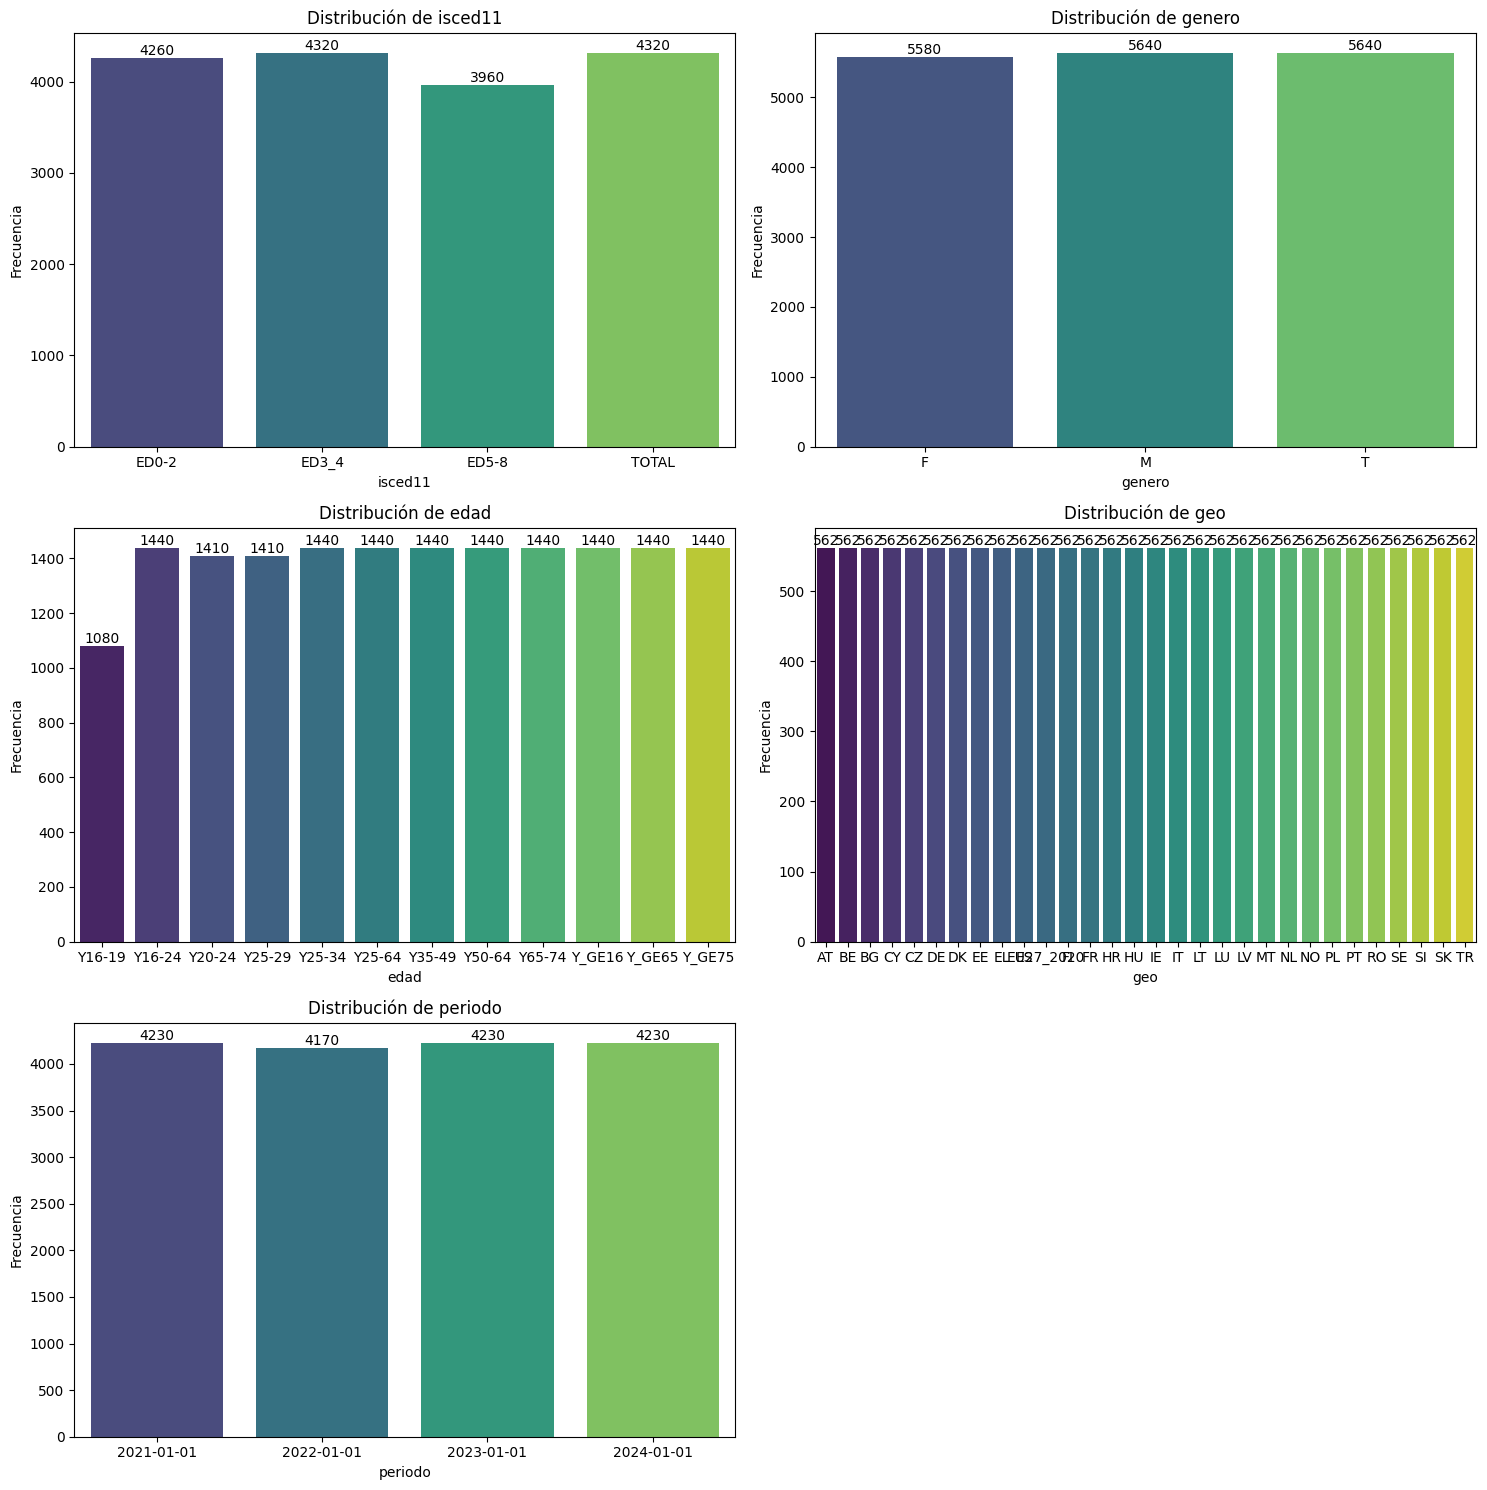

In [1107]:
pinta_categoricas(df_sat, ['isced11', 'genero', 'edad', 'geo', 'periodo'])

La conclusión que saco de esta visualización es que para manejar las variables "geo" y "edad" voy a tener que hacer algún tipo de divisón, probablemente según los ingresos. Voy a seguir ahora con el análisis de las numéricas.

In [1108]:
df_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   isced11                     16860 non-null  object        
 1   genero                      16860 non-null  object        
 2   edad                        16860 non-null  object        
 3   edad_ingresos               16860 non-null  object        
 4   geo                         16860 non-null  object        
 5   periodo                     16860 non-null  datetime64[ns]
 6   satisfaccion_general        16860 non-null  float64       
 7   mediana_ingresos            16860 non-null  float64       
 8   media_ingresos              16860 non-null  float64       
 9   no_afrontar_imprevistos(%)  16860 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 1.3+ MB


In [1109]:
df_des = df_sat.describe()
df_des = df_des.drop(columns= "periodo").T
df_des["IQR"] = df_des["75%"] - df_des["25%"]
df_des["range"] = df_des["max"] - df_des["min"]
df_des["CV"] = df_des["std"] / df_des["mean"]
df_des

,count,mean,min,25%,50%,75%,max,std,IQR,range,CV
satisfaccion_general,16860.0,7.242952,4.1,6.900,7.4,7.7,9.0,0.677186,0.800,4.9,0.093496
mediana_ingresos,16860.0,18858.729537,2426.0,9788.625,17560.0,26528.0,59956.0,10808.851002,16739.375,57530.0,0.573148
media_ingresos,16860.0,21124.499051,3218.0,10970.000,19764.0,29234.0,68404.0,11893.154362,18264.000,65186.0,0.563003
no_afrontar_imprevistos(%),16860.0,29.795883,14.7,22.700,29.4,34.9,47.9,8.810363,12.200,33.2,0.295691


In [1110]:
df_des.loc["satisfaccion_general"]

count    16860.000000
mean         7.242952
min          4.100000
25%          6.900000
50%          7.400000
75%          7.700000
max          9.000000
std          0.677186
IQR          0.800000
range        4.900000
CV           0.093496
Name: satisfaccion_general, dtype: float64

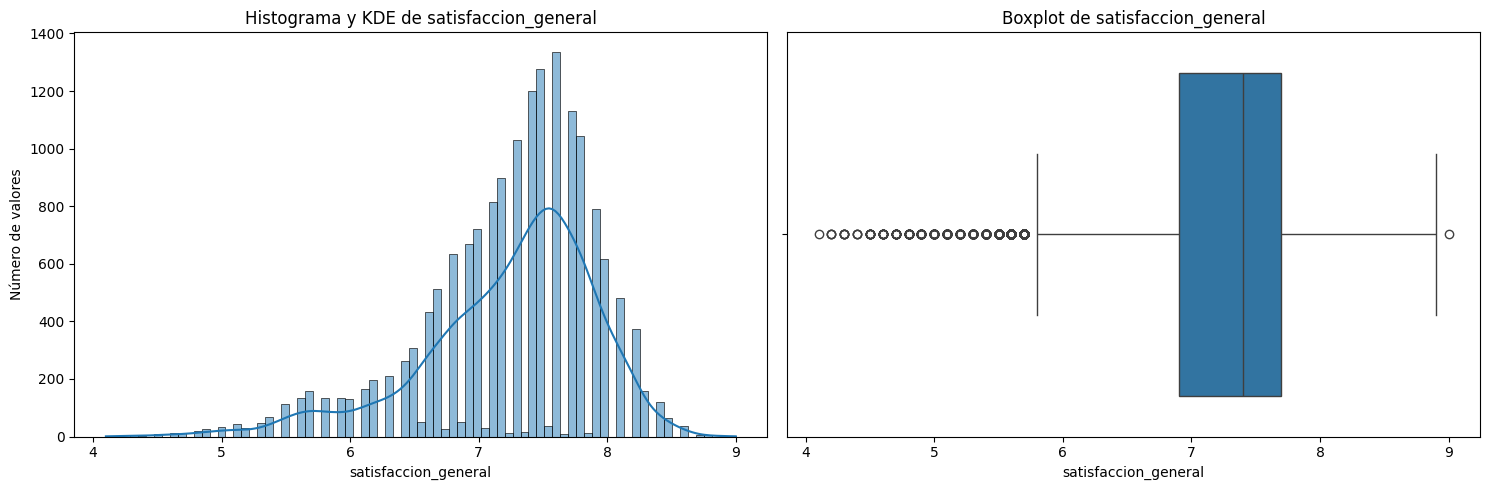

In [1111]:
pinta_hist_box(df_sat, ["satisfaccion_general"])

Es una variable que cuenta con bastante concentración de valores en la zona entre el 7 y el 8 y luego tenemos alguno outliers en la zona baja y uno en la zona alta. En general los valores que más nos interesan son los de la satisfacción considerada "baja", para definir cuáles son estos valores vamos a utilizar la mediana y el bigote. Vamos a crear una nueva columna categórica "categoria_satisfaccion" con los valores "baja" entre la mediana y el final del bigote, "muy baja" para los outliers y "alta" para el resto. Los valores que más nos interesan son los de satisfacción baja. Los de satisfacción alta nos interesan menos porque probablemente no necesites servicios para mejorarla y los de la satisfacción demasiado baja, al esta esta fuertemente ligada a factores económicos, probablemente tendrán también una economía que no sea muy atractiva para nosotros. De todas formas, más adelante analizaremos las categorías baja y muy baja en función de factores económicos.

In [1112]:
cond1 = df_sat["satisfaccion_general"] >= df_des.loc["satisfaccion_general", "25%"] - df_des.loc["satisfaccion_general", "IQR"] * 1.5
cond2 = df_sat["satisfaccion_general"] > df_des.loc["satisfaccion_general", "50%"]

df_sat["categoria_satisfaccion"] = "muy baja"
df_sat.loc[cond1, "categoria_satisfaccion"] = "baja"
df_sat.loc[cond2, "categoria_satisfaccion"] = "alta"


In [1113]:
df_sat.columns

Index(['isced11', 'genero', 'edad', 'edad_ingresos', 'geo', 'periodo',
       'satisfaccion_general', 'mediana_ingresos', 'media_ingresos',
       'no_afrontar_imprevistos(%)', 'categoria_satisfaccion'],
      dtype='object')

In [1114]:
df_sat = df_sat.copy()[['isced11', 'genero', 'edad', 'edad_ingresos', 'geo', 'periodo',
       'satisfaccion_general', 'categoria_satisfaccion', 'mediana_ingresos', 'media_ingresos', 'no_afrontar_imprevistos(%)']]
df_sat.head()

,isced11,genero,edad,edad_ingresos,geo,periodo,satisfaccion_general,categoria_satisfaccion,mediana_ingresos,media_ingresos,no_afrontar_imprevistos(%)
0,ED0-2,F,Y16-19,Y16-24,AT,2021-01-01,8.2,alta,27305.0,28228.0,18.6
1,ED0-2,F,Y16-19,Y16-24,AT,2022-01-01,8.1,alta,26070.0,28058.0,19.0
2,ED0-2,F,Y16-19,Y16-24,AT,2023-01-01,7.9,alta,30700.0,32885.0,22.8
3,ED0-2,F,Y16-19,Y16-24,AT,2024-01-01,7.7,alta,31026.0,33804.0,20.9
4,ED0-2,F,Y16-19,Y16-24,BE,2021-01-01,7.5,alta,24390.0,25223.0,22.3


In [1115]:
df_des.loc["mediana_ingresos"]

count    16860.000000
mean     18858.729537
min       2426.000000
25%       9788.625000
50%      17560.000000
75%      26528.000000
max      59956.000000
std      10808.851002
IQR      16739.375000
range    57530.000000
CV           0.573148
Name: mediana_ingresos, dtype: float64

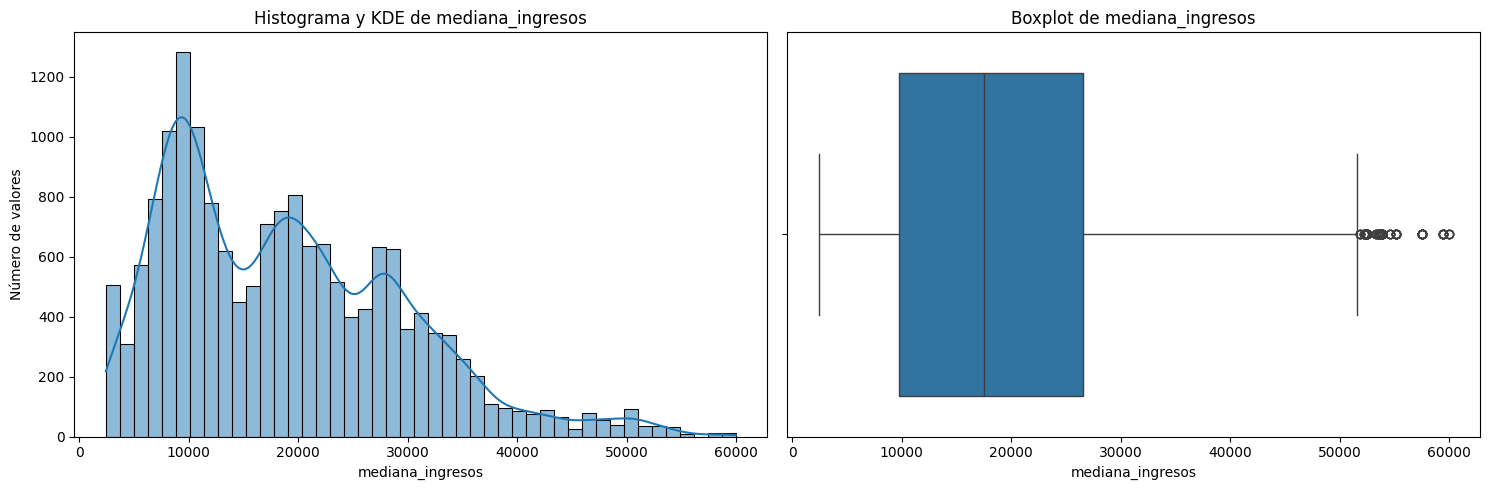

In [1116]:
pinta_hist_box(df_sat, ["mediana_ingresos"])

La mediana de los ingresos por edad y género es una variable más dispersa que la de satisfacción, que presenta una mayor concentración de valores en la parte baja de la tabla y la parte media y claramente menor en la parte alta, dando lugar incluso a algunos outliers. En este caso, al contrario que en el anterior, lo que nos interesa son los países con unos ingresos altos o muy altos. Los outliers son los más interesantes porque son por la parte de arriba, pero en este caso pasa al contrario, al estar tan ligada la satisfacción a la faceta financiera, es probable que los grupos de los outliers tengan una satisfacción alta, aunque será interesante comprobar si es así o no y en caso de no serlo esos grupos serán muy buenos candidatos. De las dos variables que tenemos con datos de ingresos, en principio trabajaré con esta, ya que me permite saber qué porcentaje de la población es el que tiene un determinado poder adquisitivo, es más preciso que la media, aunque los valores de la media también me los quedaré de momento por si me son útiles más adelante. Voy a crear una variable "categorica_ingresos", en la que asignaré "bajos" a los que estén por debajo de la mediana, "altos" entre la mediana y el bigote, pero como con 1,5 los outliers son muy pocos, usaré un bigote de 1 y "muy altos" a los outliers (también con el bigote de 1).

In [1117]:
cond1 = df_sat["mediana_ingresos"] >= df_des.loc["mediana_ingresos", "50%"]
cond2 = df_sat["mediana_ingresos"] > df_des.loc["mediana_ingresos", "75%"] + df_des.loc["mediana_ingresos", "IQR"] * 1


df_sat["categoria_ingresos"] = "baja"
df_sat.loc[cond1, "categoria_ingresos"] = "alta"
df_sat.loc[cond2, "categoria_ingresos"] = "muy alta"

In [1118]:
df_sat.columns

Index(['isced11', 'genero', 'edad', 'edad_ingresos', 'geo', 'periodo',
       'satisfaccion_general', 'categoria_satisfaccion', 'mediana_ingresos',
       'media_ingresos', 'no_afrontar_imprevistos(%)', 'categoria_ingresos'],
      dtype='object')

In [1119]:
df_sat = df_sat.copy()[['isced11', 'genero', 'edad', 'edad_ingresos', 'geo', 'periodo',
       'satisfaccion_general', 'categoria_satisfaccion',
       'mediana_ingresos', 'categoria_ingresos',  'media_ingresos',
       'no_afrontar_imprevistos(%)']]
df_sat.head()

,isced11,genero,edad,edad_ingresos,geo,periodo,satisfaccion_general,categoria_satisfaccion,mediana_ingresos,categoria_ingresos,media_ingresos,no_afrontar_imprevistos(%)
0,ED0-2,F,Y16-19,Y16-24,AT,2021-01-01,8.2,alta,27305.0,alta,28228.0,18.6
1,ED0-2,F,Y16-19,Y16-24,AT,2022-01-01,8.1,alta,26070.0,alta,28058.0,19.0
2,ED0-2,F,Y16-19,Y16-24,AT,2023-01-01,7.9,alta,30700.0,alta,32885.0,22.8
3,ED0-2,F,Y16-19,Y16-24,AT,2024-01-01,7.7,alta,31026.0,alta,33804.0,20.9
4,ED0-2,F,Y16-19,Y16-24,BE,2021-01-01,7.5,alta,24390.0,alta,25223.0,22.3


In [1120]:
df_des.loc["media_ingresos"]

count    16860.000000
mean     21124.499051
min       3218.000000
25%      10970.000000
50%      19764.000000
75%      29234.000000
max      68404.000000
std      11893.154362
IQR      18264.000000
range    65186.000000
CV           0.563003
Name: media_ingresos, dtype: float64

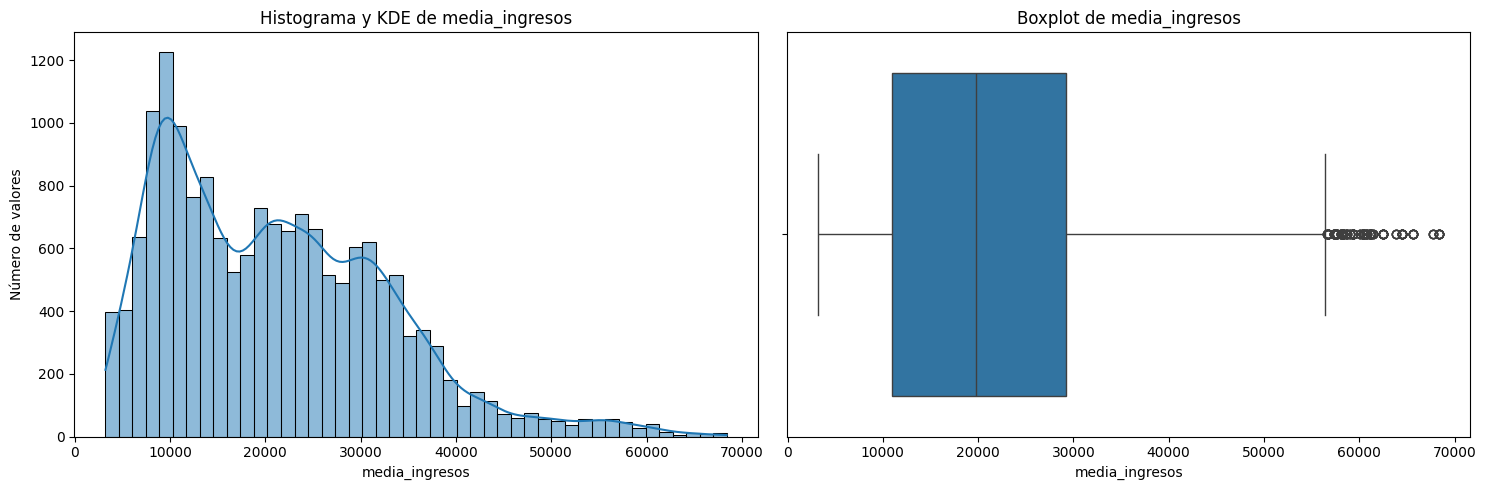

In [1121]:
pinta_hist_box(df_sat, ["media_ingresos"])

La distribución es muy similar a la de "mediana_ingresos", ya que miden la misma magnitud aunque la medida sea diferente, cabe destacar que los valores de "media_ingresos" son en general más altos que los de "mediana_ingresos", esto probablemente se debe a la dispersión de las muestras que se utilizaron para medir estas magnitudes, cuyos outliers por la parte alta hicieron que creciera la media. En nuestras variables pasa algo similar y el que si nos fijamos en la tabla de funciones de agrupación, vemos que tanto para "media_ingresos" como para "mediana_ingresos" la media es mayor que la mediana y esto es debido a que tenemos outliers que destacan muy por arriba e inflan la media.

In [1122]:
df_des.loc["no_afrontar_imprevistos(%)"]

count    16860.000000
mean        29.795883
min         14.700000
25%         22.700000
50%         29.400000
75%         34.900000
max         47.900000
std          8.810363
IQR         12.200000
range       33.200000
CV           0.295691
Name: no_afrontar_imprevistos(%), dtype: float64

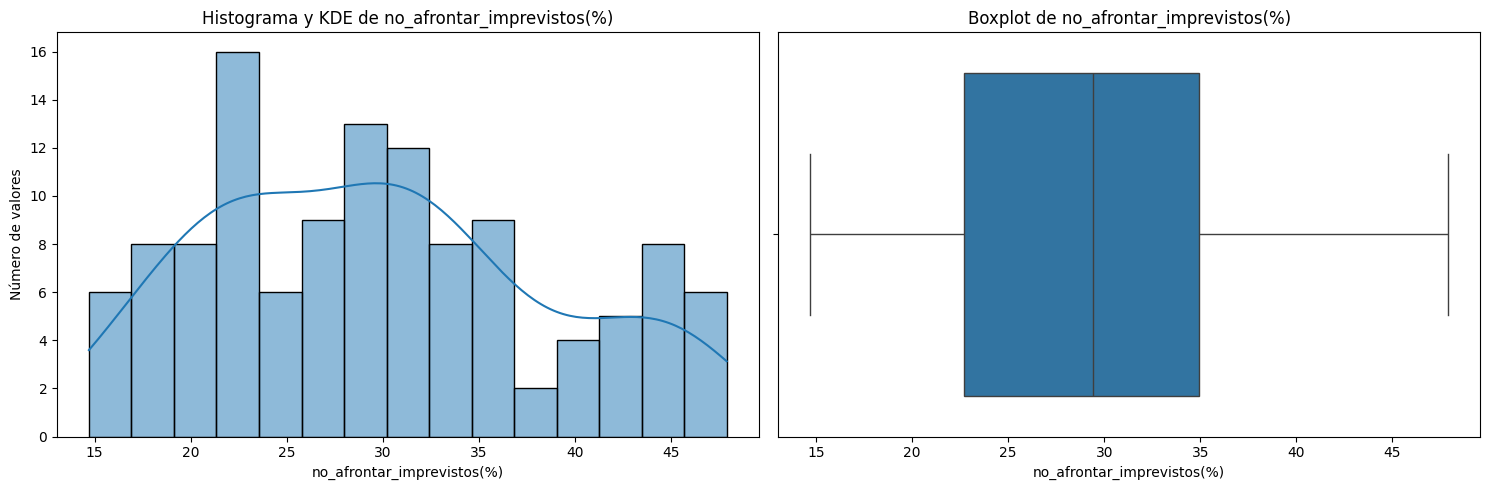

In [1123]:
cond1 = df_sat.isced11 == 'TOTAL'
cond2 = df_sat.genero == 'T'
cond3 = df_sat.edad == 'Y_GE16'

df_num = df_sat.loc[cond1 & cond2 & cond3] # Como esta variable es igual para todos los grupos de un país y un año, nos quedamos solo con un registro de cada país y año
df_num
pinta_hist_box(df_num, ["no_afrontar_imprevistos(%)"], bins=15)

Vemos que es una variable con bastante dispersión, aunque presenta una acumulación algo mayor en la parte baja. Esta parte es la que más nos interesa, ya que cuanta más población pueda hacer frente a gastos imprevistos, también será mayor la cantidad de gente que pueda permitirse los servicios que ofrece la empresa. Siempre hay que tener en cuenta los ingresos, ya que si mucha gente puede permitirse hacer frente a gastos inesperados, pero los ingresos son muy bajos, quizá la rentabilidad no va a ser muy alta. Como se puede apreciar en el digarama de cajas, la mediana está más o menos en el centro del rango de valores que tenemos y, al no ser un rango demasiado grande, vamos a crear una columna categórica únicamente con las categorías "bajo" y "alto" utilizando la mediana como punto de referencia.

In [1124]:
cond1 = df_sat["no_afrontar_imprevistos(%)"] >= df_des.loc["no_afrontar_imprevistos(%)", "50%"]


df_sat["categoria_imprevistos"] = "bajo"
df_sat.loc[cond1, "categoria_imprevistos"] = "alto"

In [1125]:
df_sat.columns

Index(['isced11', 'genero', 'edad', 'edad_ingresos', 'geo', 'periodo',
       'satisfaccion_general', 'categoria_satisfaccion', 'mediana_ingresos',
       'categoria_ingresos', 'media_ingresos', 'no_afrontar_imprevistos(%)',
       'categoria_imprevistos'],
      dtype='object')

In [1126]:
df_sat.head()

,isced11,genero,edad,edad_ingresos,geo,periodo,satisfaccion_general,categoria_satisfaccion,mediana_ingresos,categoria_ingresos,media_ingresos,no_afrontar_imprevistos(%),categoria_imprevistos
0,ED0-2,F,Y16-19,Y16-24,AT,2021-01-01,8.2,alta,27305.0,alta,28228.0,18.6,bajo
1,ED0-2,F,Y16-19,Y16-24,AT,2022-01-01,8.1,alta,26070.0,alta,28058.0,19.0,bajo
2,ED0-2,F,Y16-19,Y16-24,AT,2023-01-01,7.9,alta,30700.0,alta,32885.0,22.8,bajo
3,ED0-2,F,Y16-19,Y16-24,AT,2024-01-01,7.7,alta,31026.0,alta,33804.0,20.9,bajo
4,ED0-2,F,Y16-19,Y16-24,BE,2021-01-01,7.5,alta,24390.0,alta,25223.0,22.3,bajo


### Análisis bivariante y mutivariante

Voy a empezar por analizar mi variable central que es satisfaccion_general en función de todas las demás.

In [1127]:
def dispersion_hasta_cuatro(df, col_x, col_y, size = None, col_color = None):
    fig, axs = plt.subplots(1,1,figsize = (10,8))
    axs.set_title(f"Diagrama de dispersión de {col_x} y {col_y}")
    if size and col_color:
        if type(size) == str:
            sns.scatterplot(x = col_x, y = col_y, size = size, hue = col_color, data=df, alpha = .7)
        else:
            sns.scatterplot(x = col_x, y = col_y, s = size, hue = col_color, data=df, alpha = .7)
    elif size:
        if type(size) == str:
            sns.scatterplot(x = col_x, y = col_y, size = size, data=df, alpha = .7, color = "green")
        else:
            sns.scatterplot(x = col_x, y = col_y, s = size, data=df, alpha = .7, color = "green")
    elif col_color:
        sns.scatterplot(x = col_x, y = col_y, hue = col_color, data=df, alpha = .7, s = 35)
    else:
        sns.scatterplot(x = col_x, y = col_y, data=df, alpha = .7, color = "green", s = 35)

    plt.show();

### Tabla de información de variables

Nota general: todas las variables a partir de "satisfacción general" tienen valores que varían según el país y el año, por eso no se especifica este dato para cada variable concreta.
|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|isced11|El nombre en castellano es Clasificación Internacional Uniforme de la Educación (CINE) |Categórica|2|Mostraré una leyenda con las categorías más abajo. En principio menos importante porque voy a centrarme más en la edad y los ingresos||
|genero|El género de los participantes: masculino, femenino o ambos|Categórica|2|En principio menos importante porque voy a centrarme más en la edad y los ingresos||
|edad|Grupos de edad de los participantes|Categórica|1|Permite analizar la satisfacción por la edad, una de las preguntas a las que busco dar respuesta||
|edad_ingresos|Columna que he creado yo para añadir los datos de ingresos al dataset de satisfacción|||Me la quedo por si necesito consultarla, pero no la tendré en cuenta en el análisis||
|geo|Entidad geopolítica a la que corresponden los datos, son todo países menos uno que es "EU-27"|Categórica|1|Permite analizar la satisfacción según el país, importante, ya que busco quedarme con un país concreto y dentro de este país buscar un grupo objetivo||
|periodo|Año al que corresponden los datos: 2021-2024|Categórica|2|Los datos que me interesan en principio son los de 2024, aunque puede ser útil ver una evolución temporar para ver la tendencia||
|satisfaccion_general|Satisfacción de los participantes con la vida en general en una escala del 1 al 10 por nivel de estudios, edad y género. El valor que se presenta en esta columna es el valor medio de los participantes que pertenecen al mismo país, nivel de estudios, edad y género en el mismo año.|Numérica discreta|0|Es la variable central que da sentido a todo el análisis. Importante saber que son valores medios de los grupos que responden a la encuesta, no resultados por individuos aislados||
|media_ingresos|Media de ingresos en euros por edad y género (no tengo datos que tengan en cuenta el nivel de estudios)|Numérica continua|2|De momento no le doy gran importancia porque en principio voy a usar la mediana, que es más precisa||
|mediana_ingresos|Mediana de ingresos en euros por edad y género (no tengo datos que tengan en cuenta el nivel de estudios)|Numérica continua|0|Columna clave, ya que estoy buscando una buena oportunidad de mercado||
|no_afrontar_imprevistos(%)|Porcentaje de la población de cada país que no puede hacer frente a gastos inesperados|Numérica discreta/continua|1|Aunque no tenga información desglosada por grupos de población y solo del país en general, puede ser muy útil a la hora de decidir en qué país quiero establecer mi filial, ya que si hay una gran parte de la población que no puede hacer frente a gastos inesperados, probablemente no podrá permitirse tampoco un gasto extra para mejorar su satisfacción||

#### satisfaccion_general - mediana_ingresos

In [1128]:
df_des.loc[["satisfaccion_general", "mediana_ingresos"]]

,count,mean,min,25%,50%,75%,max,std,IQR,range,CV
satisfaccion_general,16860.0,7.242952,4.1,6.900,7.4,7.7,9.0,0.677186,0.800,4.9,0.093496
mediana_ingresos,16860.0,18858.729537,2426.0,9788.625,17560.0,26528.0,59956.0,10808.851002,16739.375,57530.0,0.573148


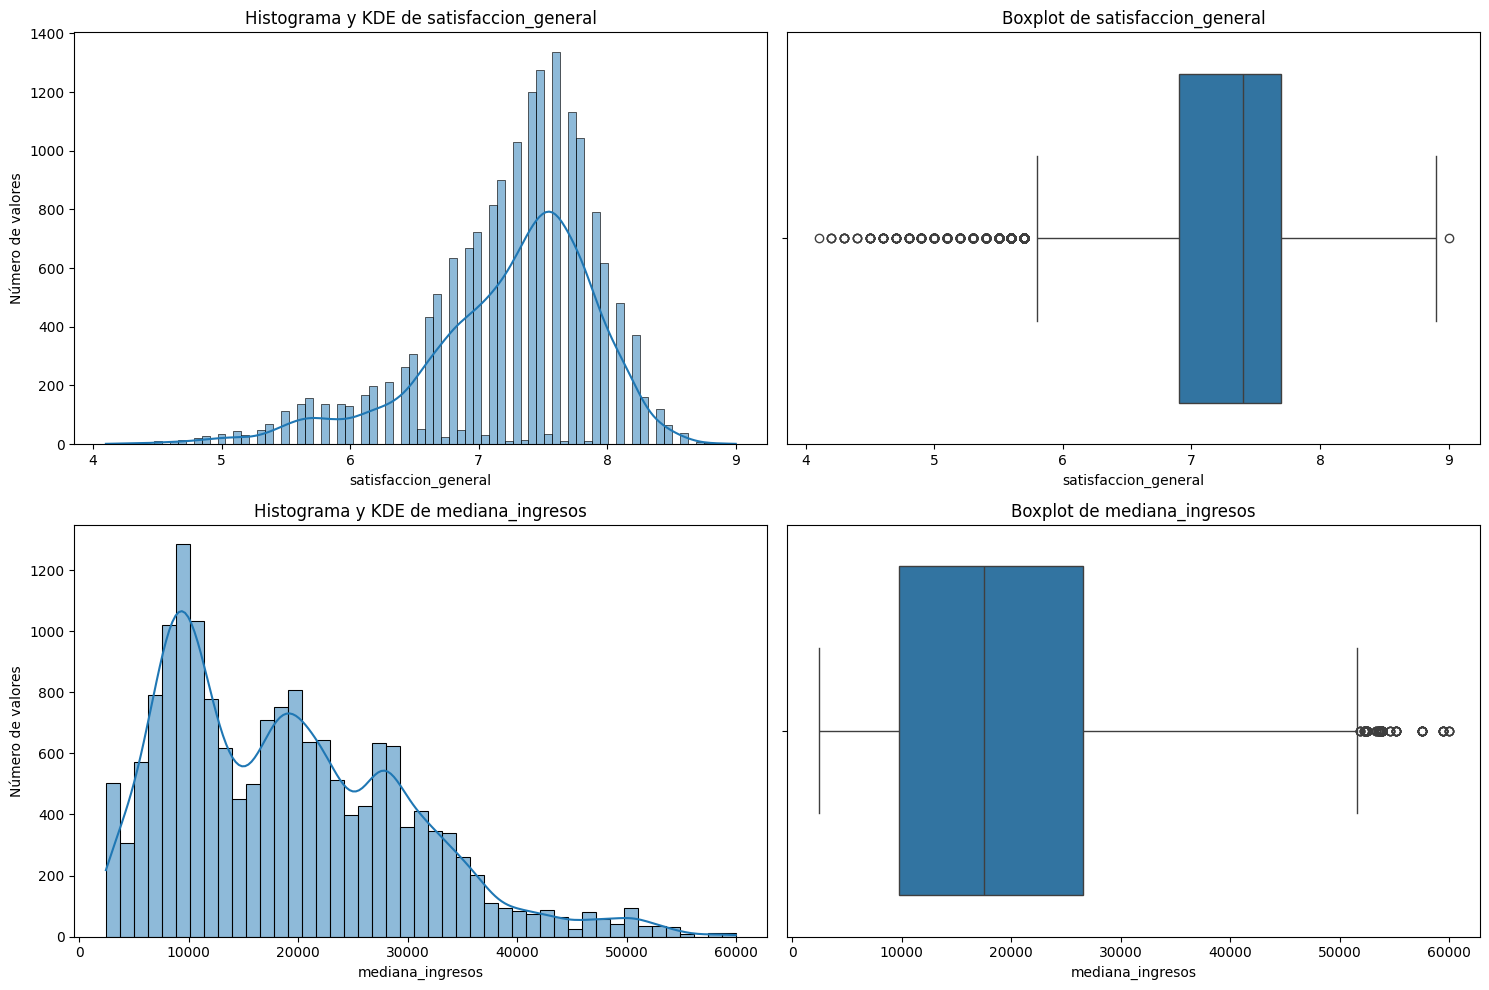

In [1129]:
pinta_hist_box(df_sat, ["satisfaccion_general", "mediana_ingresos"])

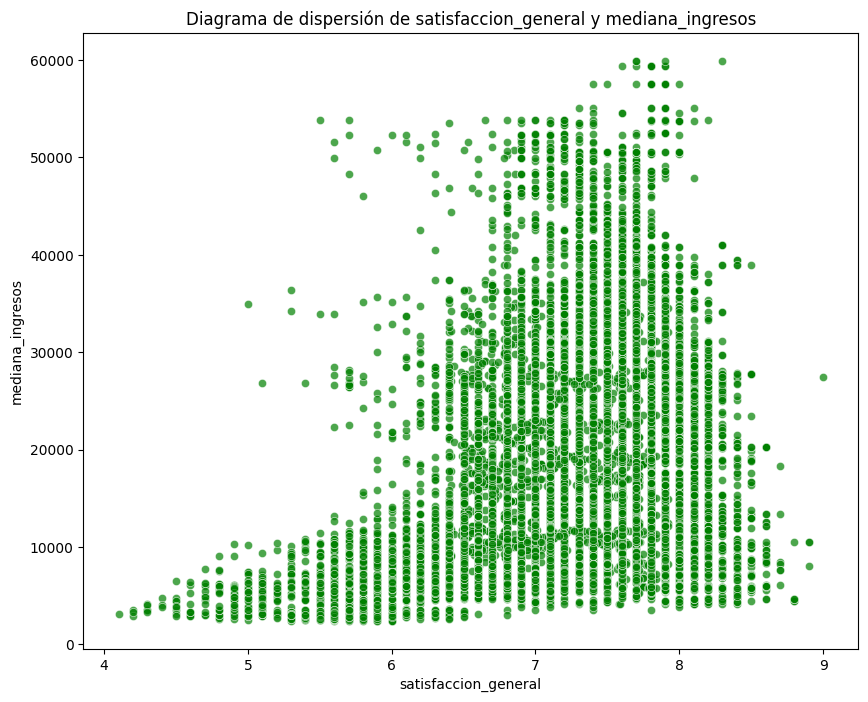

In [1130]:
dispersion_hasta_cuatro(df_sat, "satisfaccion_general", "mediana_ingresos")

Con la visualización de los histogramas y diagramas de cajas de "satisfaccion_general" y "mediana_ingresos" ya se puede observar que la distribución de ambas es muy diferente y que los valores de "mediana_ingresos" se agrupan mucho más en la parte baja que los de "satisfacción_general", por lo que podemos suponer que no hay una fuerte correlación lineal positiva entre estas dos variables, en todo caso negativa. Con el diagrama de dispersión comprobamos que existe una cierta correlación positiva, ya que los valores de ingresos tienden a crecer a medida que aumenta la satisfacción, aunque no parece demasiado fuerte. Si bien se observa una línea cuyos ingresos crecen de manera clara a medida que aumenta su satisfacción (y algunas otras líneas con esta tendencia, pero no se ven tan claramente por la acumulación de valores) y para los valores más bajos de satisfacción los valores de ingresos son también bajos, al seguir avanzando por el eje x, en el que se representa la satisfacción, vemos que hay valores de ingresos que no crecen mucho, estos son los valores que menos nos interesan. Los resultados más atractivos, por el contrario son aquellos cuyos ingresos son altos, pero su satisfacción se mantiene baja, es decir, quedan por encima de la línea que mencionaba antes. Vamos a comprobar la correlación entre las dos variables con el coeficiente de Pearson.

In [1131]:
df_sat[["satisfaccion_general", "mediana_ingresos"]].corr()

,satisfaccion_general,mediana_ingresos
satisfaccion_general,1.000000,0.329677
mediana_ingresos,0.329677,1.000000


El valor que nos da este coeficiente muestra lo que ya anticipábamos al ver el diagrama de dispersión, existe correlación entre las dos variables, pero no es muy fuerte.   
Vamos a hacer ahora un análisis comparando las dos variables categóricas que hemos creado a partir de "satisfaccion_general" y "mediana_ingresos".

categoria_ingresos      alta  baja  muy alta
categoria_satisfaccion                      
alta                    4430  2901       201
baja                    3489  4829       288
muy baja                  21   695         6


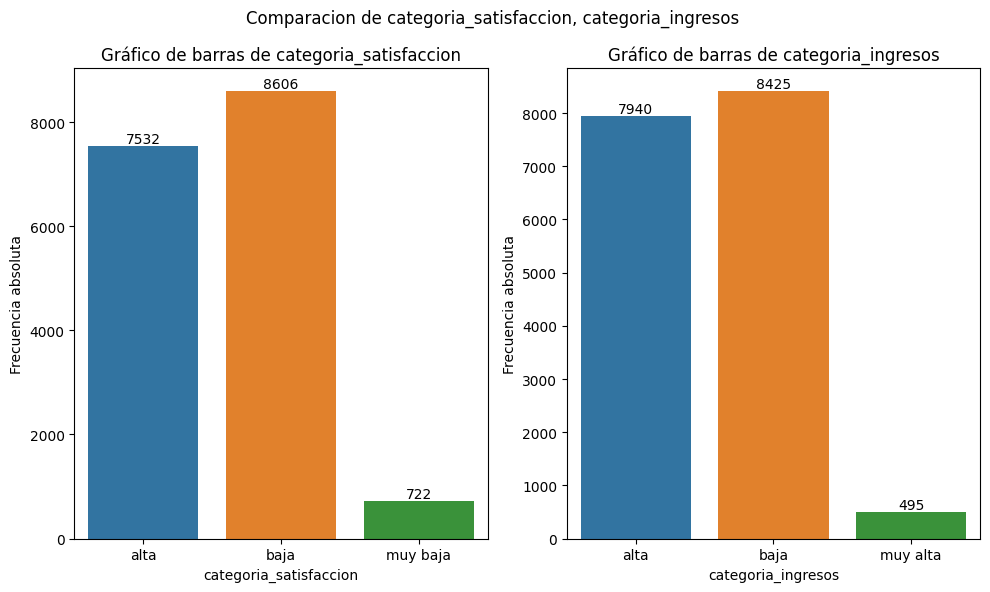

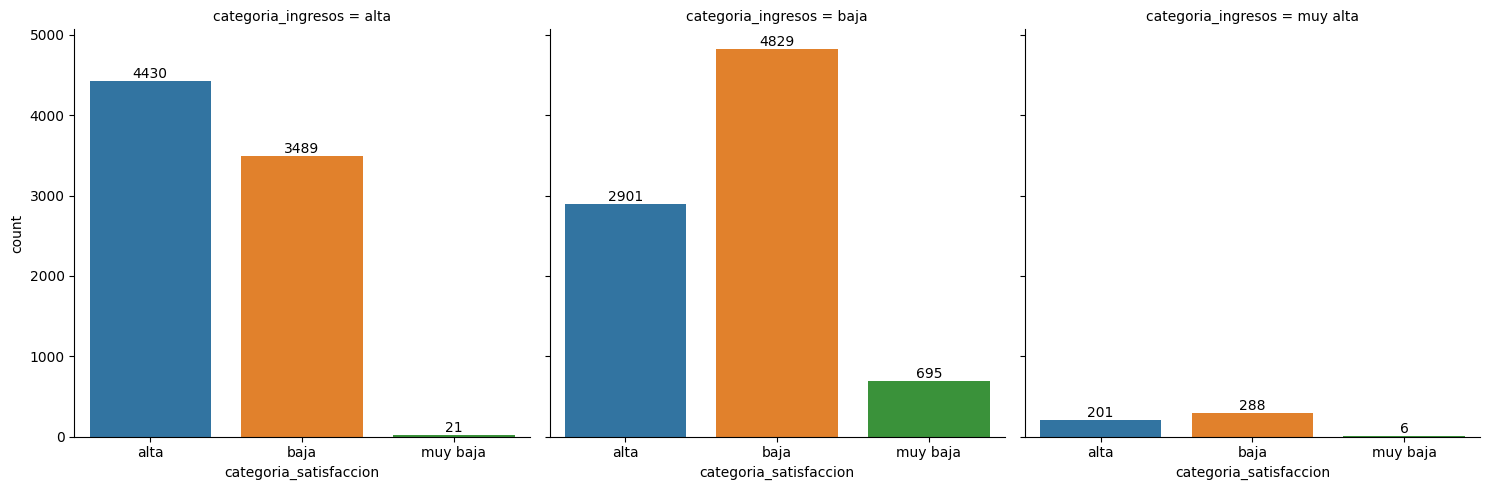

In [1132]:
comparacion_categoricas(df_sat, "categoria_satisfaccion", "categoria_ingresos")

Ya empezábamos a encontrar resultados potentes al analizar el diagrama de dispersión que nos indicaban que había grupos cuyos ingresos eran elevados y su satisfacción no lo era tanto, pero con estos gráficos de barras y la tabla de contingencia nos queda más claro todavía. En la categoría de ingresos muy alta, aunque tenemos pocos valores, podemos ver que ya mayoría de los grupos tienen una satisfacción baja y algunos, muy pocos, incluso muy baja. Estos son los grupos más interesantes. También en la categoría de ingresos alta tenemos un número abundante de grupos con satisfacción baja. Más adelante será interesante ver si hay algún país en el que se concentren en mayor medida estos grupos a la hora de ver cuál es el país idóneo para establecer la filial de la empresa. Vamos a analizar ahora la capacidad de los ciudadanos de cada país para afrontar gastos inesperados, que es otro indicador que nos ayuda a determinar si existen países en los que la satisfacción no está tan ligada al aspecto económico.

#### satisfaccion_general - no_afrontar_imprevistos(%)
Nota: para esta variable voy a utilizar el dataframe filtrado que solo muestra un resultado general por país y año, ya que para la variable "no_afrontar_imprevistos(%)" solo tenemos registros por país y año, entonces solo la vamos a utilizar para comparar países o años en conjunto.

In [1133]:
df_des.loc[["satisfaccion_general", "no_afrontar_imprevistos(%)"]]

,count,mean,min,25%,50%,75%,max,std,IQR,range,CV
satisfaccion_general,16860.0,7.242952,4.1,6.9,7.4,7.7,9.0,0.677186,0.8,4.9,0.093496
no_afrontar_imprevistos(%),16860.0,29.795883,14.7,22.7,29.4,34.9,47.9,8.810363,12.2,33.2,0.295691


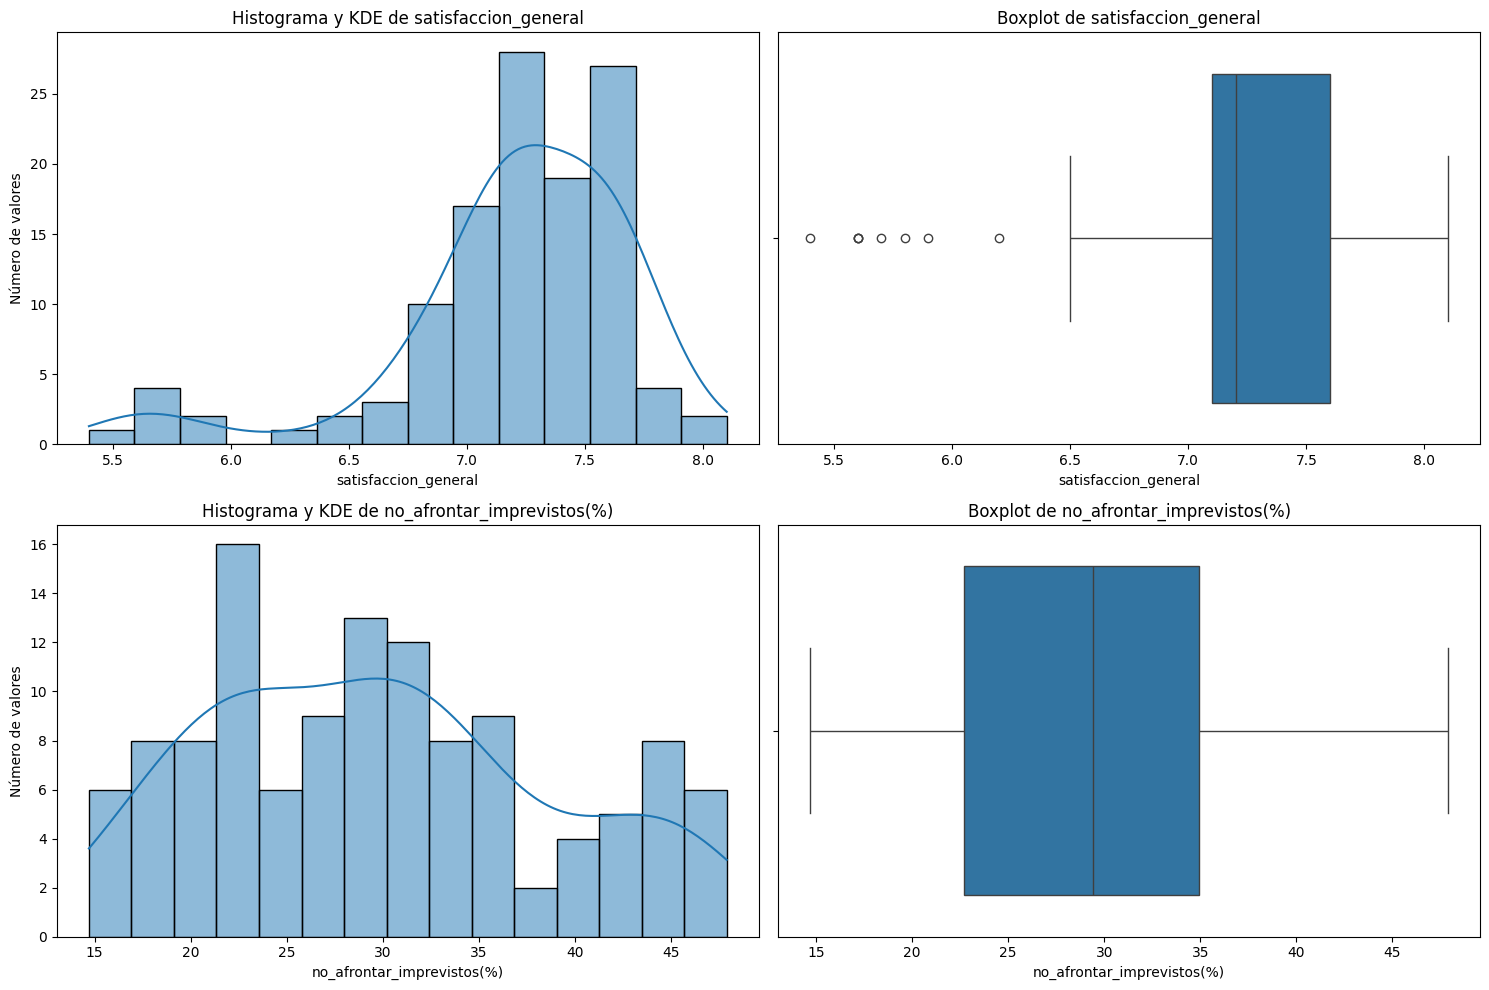

In [1134]:
pinta_hist_box(df_num, ["satisfaccion_general", "no_afrontar_imprevistos(%)"],bins = ["auto", 15]) 

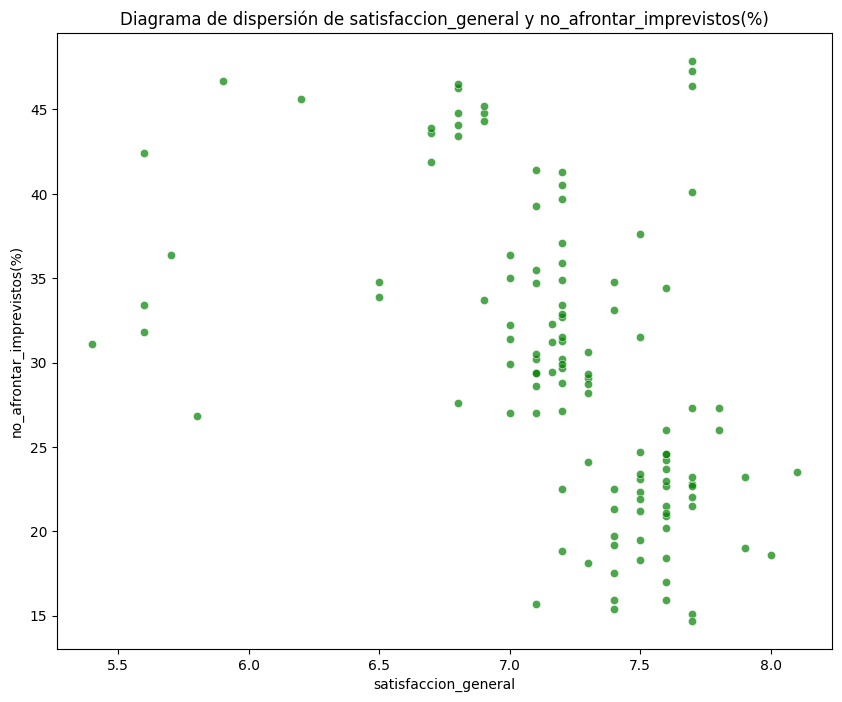

In [1135]:
dispersion_hasta_cuatro(df_num, "satisfaccion_general", "no_afrontar_imprevistos(%)") # Muestro los resultados filtrados para tener un único valor por país y año

Con la visualización individual del histograma y KDE, así como del diagrama de caja de las variables "satisfaccion_general" y "no_afrontar_imprevistos(%)" podemos ver que sus distribuciones no son muy parecidas, siendo más dispersa y uniforme la variable "no_afrontar_imprevistos(%)", aunque sus valores tienen una mayor concentración en la parte baja. Esto nos hace pensar que la correlación entre estas dos variables no será demasiado fuerte, igual que en el caso anterior, y que es posible que exista una correlación lineal negativa, lo cual sería esperable, es decir, la satisfacción aumenta a medida que disminuye la incapacidad para hacer frente a imprevistos financieros. Al observar el diagrama de dispersión, podemos apreciar que existe una relación lineal negativa que se confirma esta hipótesis: ninguno de los países con valores más bajos de incapacidad para hacer frente a gastos inesperados tiene valores de satisfacción extremadamente bajos, aunque estos países no tienen tampoco los valores más altos. Esto es algo positivo de cara a nuestro análisis, ya que hay países en los que la población, según esta estadística podría permitirse los servicios de la empresa y que pueden también necesitarlos, por no tener unos niveles de satisfacción muy altos. Para comprobar que existe esta correlación vamos a ver su coeficiente de Pearson:

In [1136]:
df_num[["satisfaccion_general", "no_afrontar_imprevistos(%)"]].corr()

,satisfaccion_general,no_afrontar_imprevistos(%)
satisfaccion_general,1.000000,-0.481568
no_afrontar_imprevistos(%),-0.481568,1.000000


El valor que nos da este coeficiente muestra lo que ya anticipábamos al ver el diagrama de dispersión, existe correlación entre las dos variables.   
Vamos a hacer ahora un análisis comparando las dos variables categóricas que hemos creado a partir de "satisfaccion_general" y "no_afrontar_imprevistos(%)".

In [1137]:
df_num

,isced11,genero,edad,edad_ingresos,geo,periodo,satisfaccion_general,categoria_satisfaccion,mediana_ingresos,categoria_ingresos,media_ingresos,no_afrontar_imprevistos(%)
16500,TOTAL,T,Y_GE16,Y_GE16,AT,2021-01-01,8.0,alta,28103.0,alta,30674.0,18.6
16501,TOTAL,T,Y_GE16,Y_GE16,AT,2022-01-01,7.9,alta,28446.0,alta,31470.0,19.0
16502,TOTAL,T,Y_GE16,Y_GE16,AT,2023-01-01,7.7,alta,32220.0,alta,35738.0,22.8
16503,TOTAL,T,Y_GE16,Y_GE16,AT,2024-01-01,7.6,alta,34089.0,alta,38119.0,20.9
16504,TOTAL,T,Y_GE16,Y_GE16,BE,2021-01-01,7.5,alta,25866.0,alta,27932.0,22.3
...,...,...,...,...,...,...,...,...,...,...,...,...
16615,TOTAL,T,Y_GE16,Y_GE16,SK,2024-01-01,7.3,baja,10273.0,baja,10511.0,28.2
16616,TOTAL,T,Y_GE16,Y_GE16,TR,2021-01-01,5.6,muy baja,2980.0,baja,4039.0,33.4
16617,TOTAL,T,Y_GE16,Y_GE16,TR,2022-01-01,5.4,muy baja,3019.0,baja,4328.0,31.1
16618,TOTAL,T,Y_GE16,Y_GE16,TR,2023-01-01,5.6,muy baja,3150.0,baja,4507.0,31.8


categoria_imprevistos   alto  bajo
categoria_satisfaccion            
alta                       7    36
baja                      49    23
muy baja                   5     0


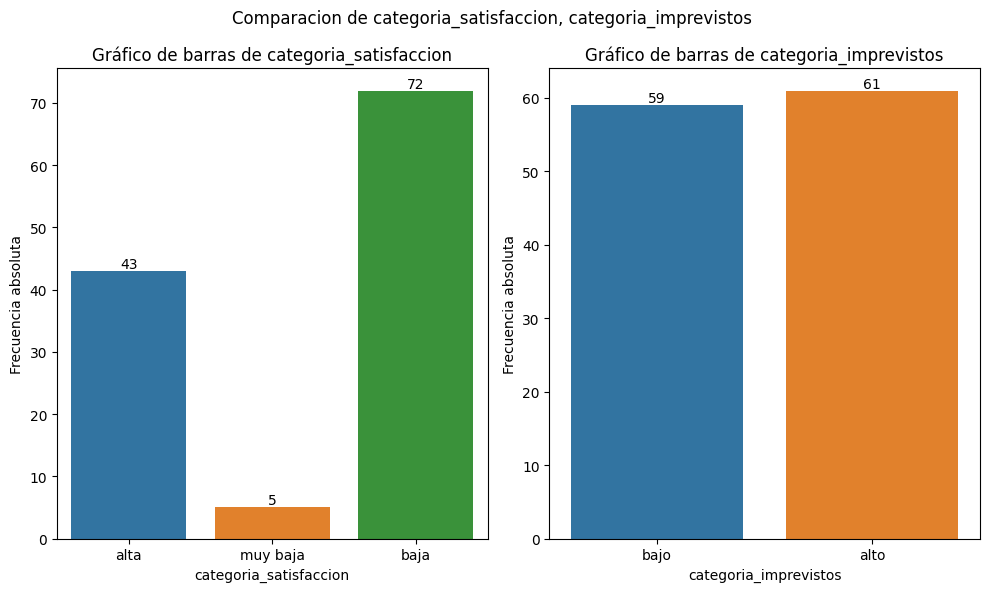

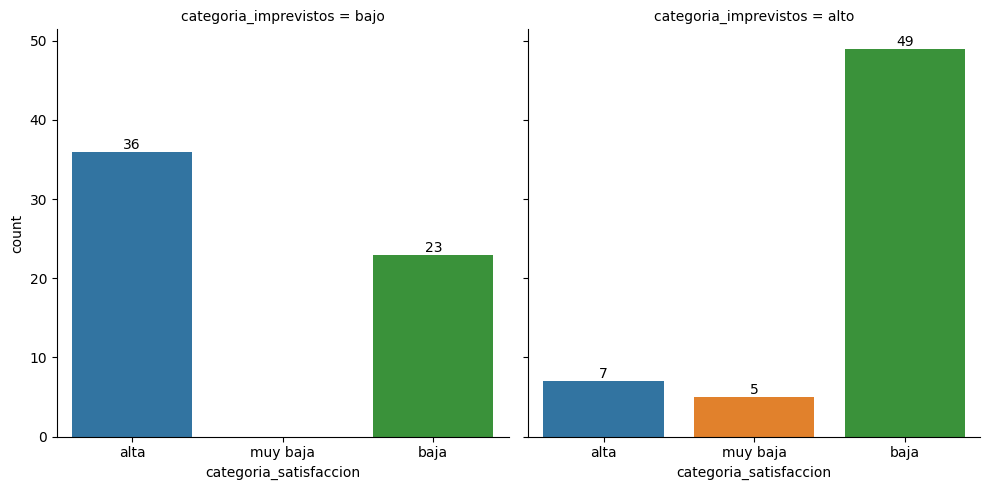

In [1138]:
cond1 = df_sat.isced11 == 'TOTAL'
cond2 = df_sat.genero == 'T'
cond3 = df_sat.edad == 'Y_GE16'

df_num = df_sat.loc[cond1 & cond2 & cond3]

comparacion_categoricas(df_num, "categoria_satisfaccion", "categoria_imprevistos")

En esta tabla ya vemos más claramente que tenemos un grupo de país-año (aunque el año que nos interesa sea 2024) en el que puede estar nuestro público objetivo, con un porcentaje bajo de personas que no pueden permitirse los gastos inesperados y una satisfacción baja (ninguno muy baja).

#### mediana_ingresos y no_afrontar_imprevistos(%)

In [1139]:
df_des.loc[["mediana_ingresos", "no_afrontar_imprevistos(%)"]]

,count,mean,min,25%,50%,75%,max,std,IQR,range,CV
mediana_ingresos,16860.0,18858.729537,2426.0,9788.625,17560.0,26528.0,59956.0,10808.851002,16739.375,57530.0,0.573148
no_afrontar_imprevistos(%),16860.0,29.795883,14.7,22.700,29.4,34.9,47.9,8.810363,12.200,33.2,0.295691


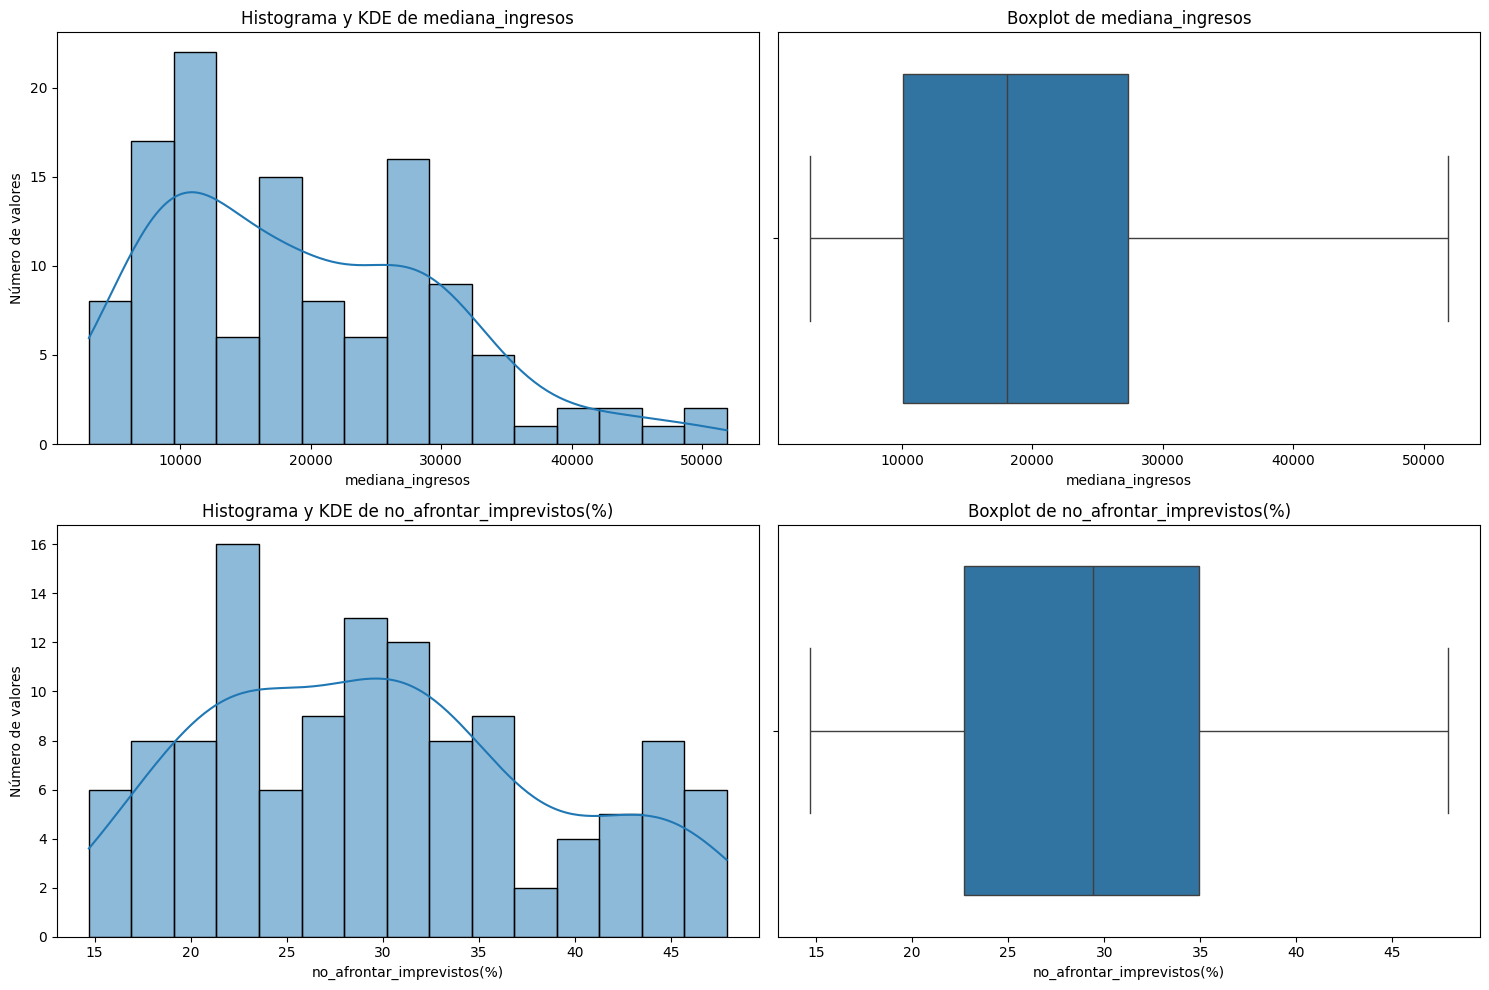

In [1140]:
pinta_hist_box(df_num, ["mediana_ingresos", "no_afrontar_imprevistos(%)"],bins = 15)

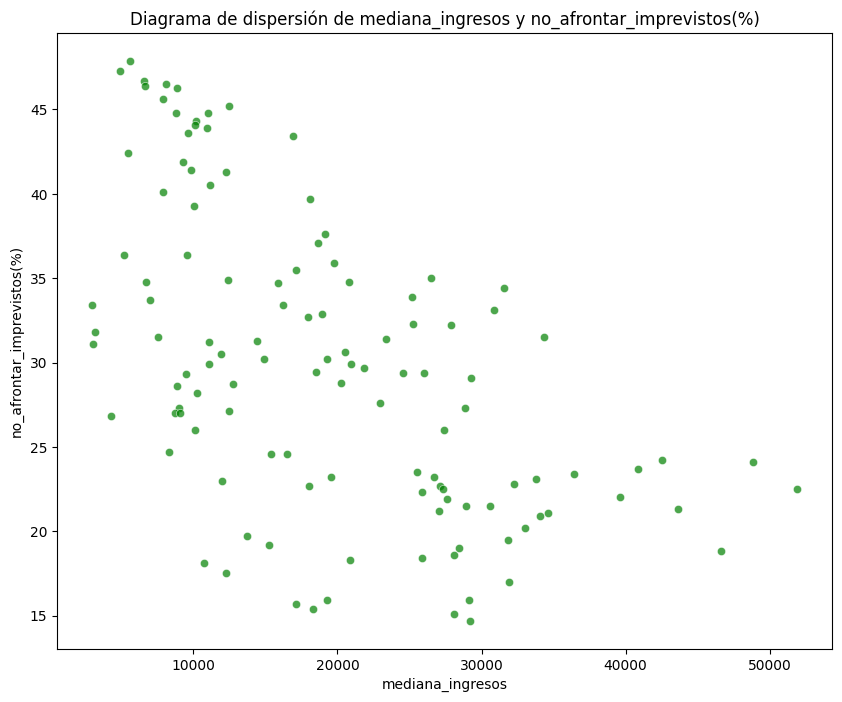

In [1141]:
dispersion_hasta_cuatro(df_num, "mediana_ingresos", "no_afrontar_imprevistos(%)")

Después de los resultados obtenidos en el análisis anterior, resulta interesante ver cómo de relacionada está la capacidad para hacer frente a imprevistos con los ingresos. Estos dos indicadores nos servirán para evaluar la economía de nuestro grupo objetivo. La capacidad para hacer frente a gastos inesperados es un un indicador más preciso para comparar entre países, ya que puede haber circunstancias de cada país que hagan que unos ingresos más altos no sean suficientes para cubrir necesidades inesperadas, pero dentro de un mismo país podremos comparar entre grupos según sus ingresos.   
Viendo los histogramas y diagramas de caja podemos apreciar que ambas son variables dispersas y con una distribución de los valores similar, lo cual podría llevarnos a pensar que existe una correlación lineal positiva. Nada más lejos de la realidad, ya que, aunque le línea no sea muy clara, por lo general a medida que suben los ingresos baja la incapacidad para hacer frente a imprevistos, lo cual entra dentro de lo esperable, veamos su coeficiente de Pearson para asegurarnos de que confirma lo que muestra el gráfico.

In [1142]:
df_num[["mediana_ingresos", "no_afrontar_imprevistos(%)"]].corr()

,mediana_ingresos,no_afrontar_imprevistos(%)
mediana_ingresos,1.000000,-0.560903
no_afrontar_imprevistos(%),-0.560903,1.000000


Efectivamente confirma que existe una correlación lineal negativa un poco más fuerte que en el caso anterior.   
A continuación compararé las categóricas que he creado a partir de estas dos variables para ver si tengo valores por país y año que resulten interesantes desde el punto de vista de negocio.

categoria_imprevistos  alto  bajo
categoria_ingresos               
alta                     22    36
baja                     39    19
muy alta                  0     4


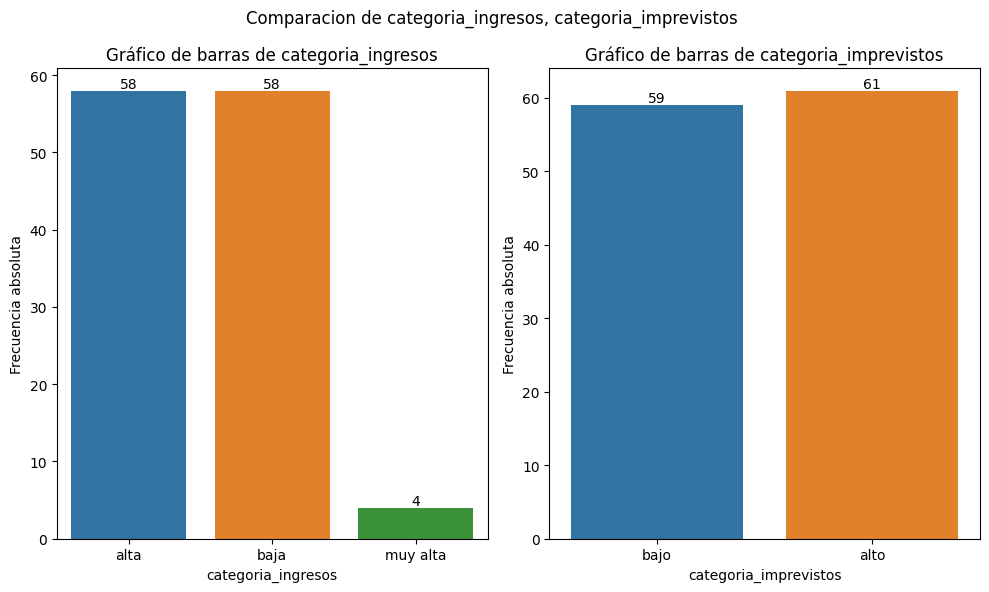

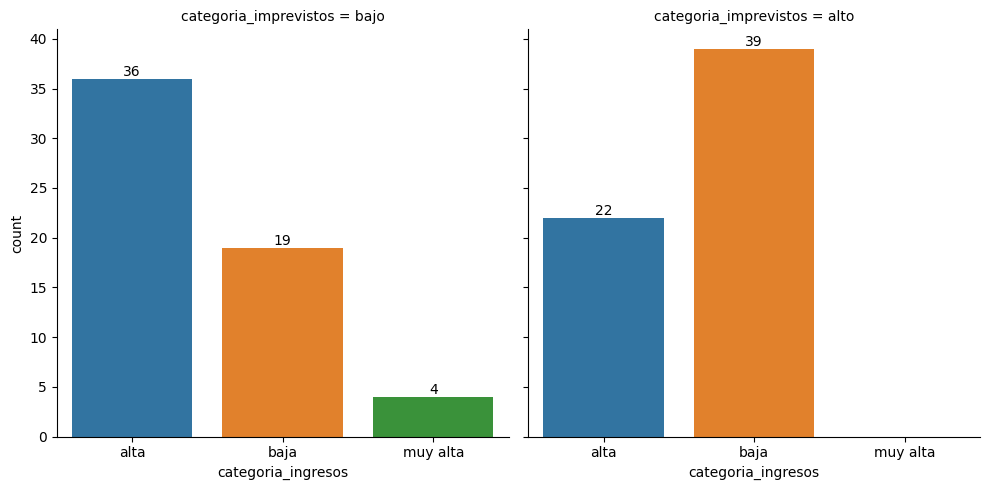

In [1143]:
comparacion_categoricas(df_num, "categoria_ingresos", "categoria_imprevistos")

Los valores que nos interesan son los que presentan una baja incapacidad para afrontar gastos inesperados y un nivel de ingresos alto o muy alto, pero podremos obtener resultados más potentes cuando tengamos también en el análisis la edad y el país.

#### edad y satisfaccion_general

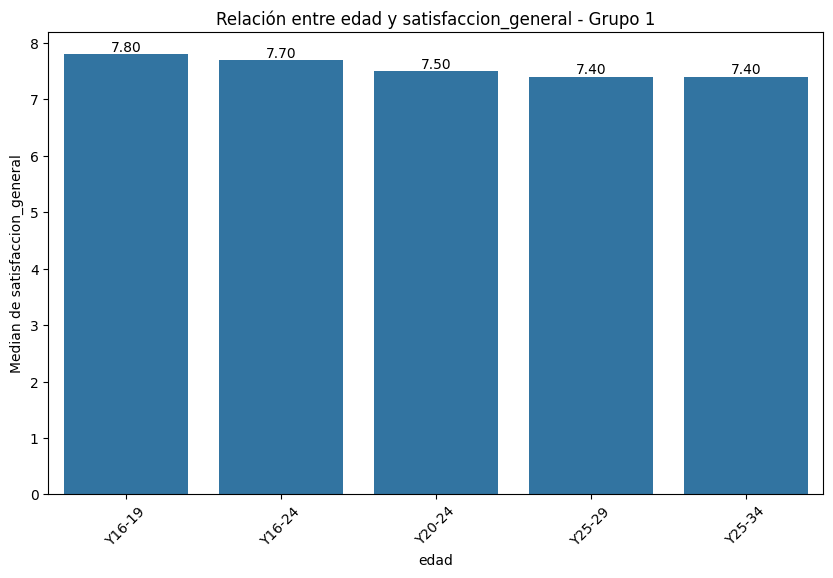

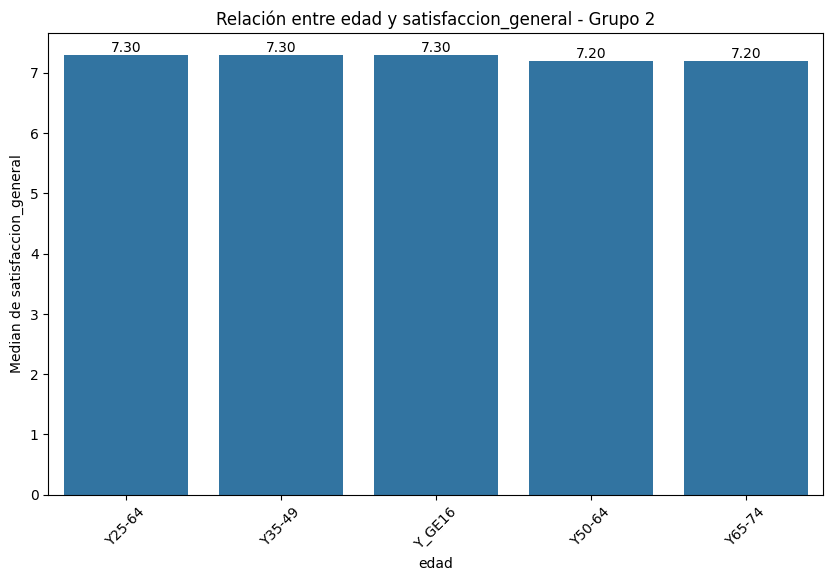

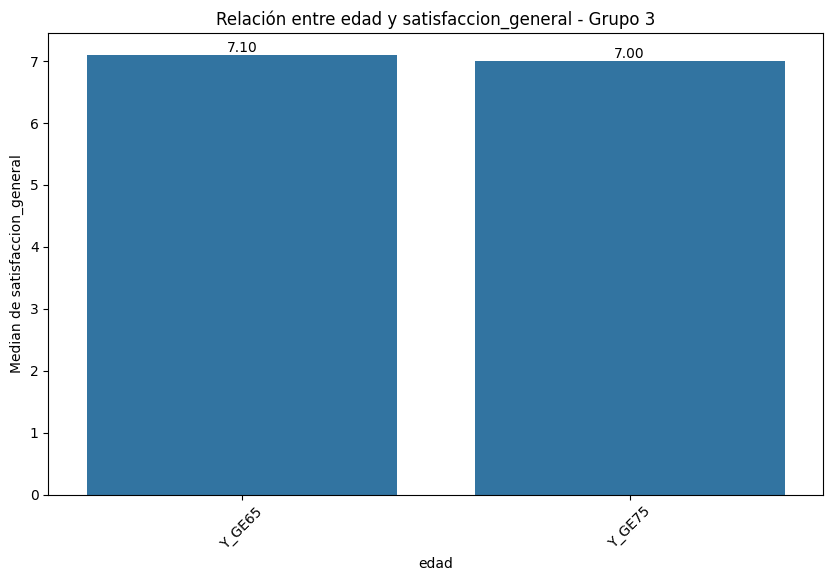

In [1144]:
plot_categorical_numerical_relationship(df_sat, "edad", "satisfaccion_general", show_values=True, measure="median")

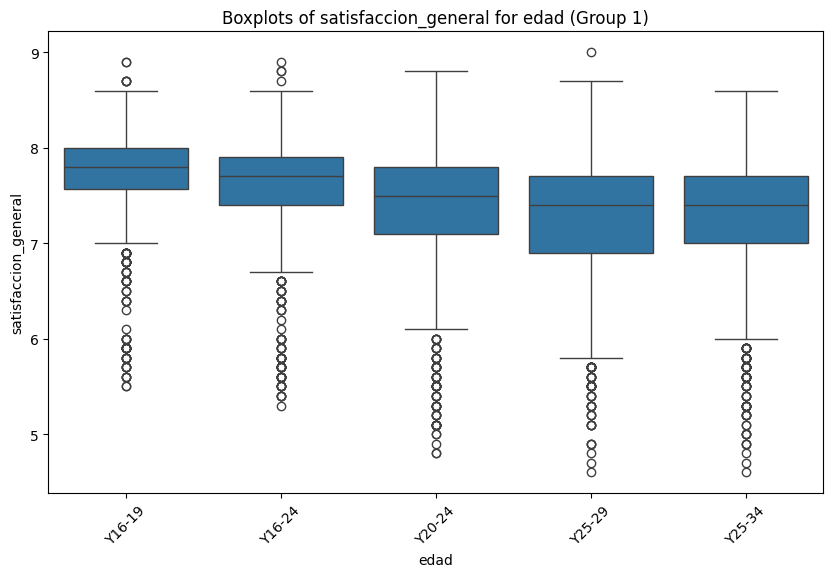

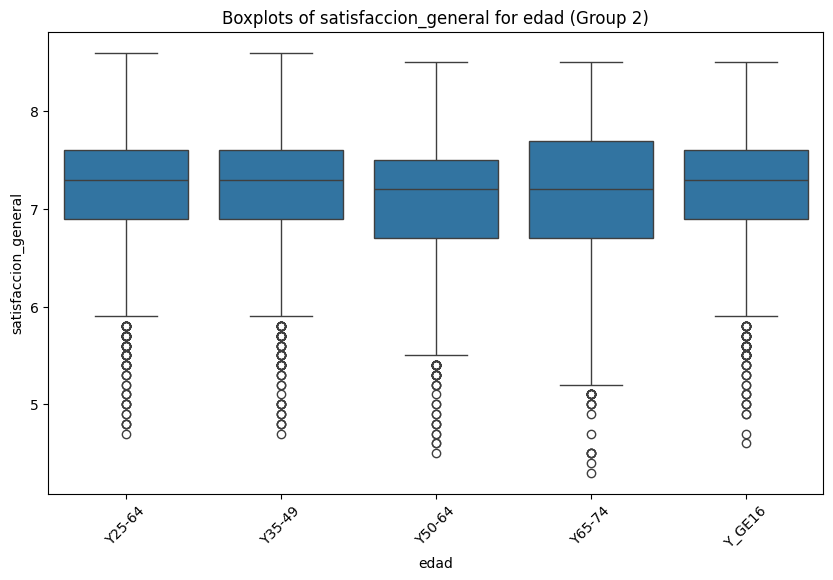

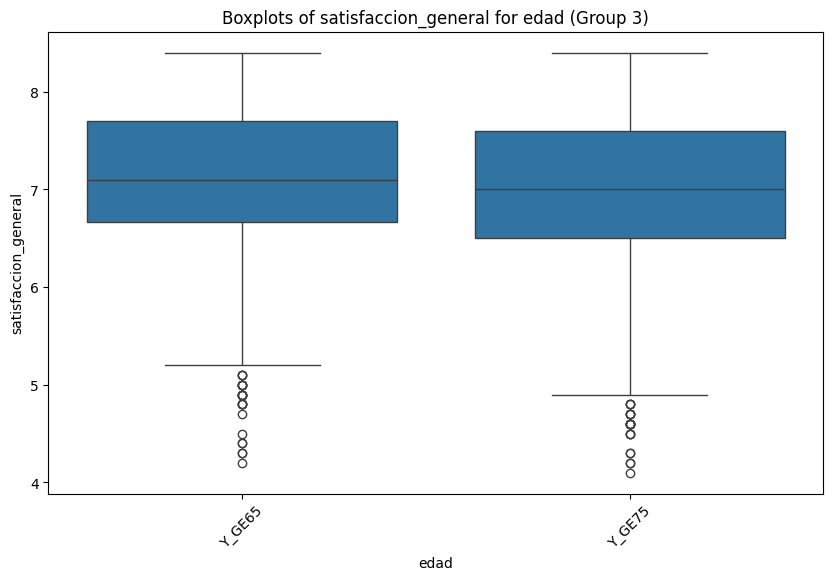

In [1145]:
plot_grouped_boxplots(df_sat, "edad", "satisfaccion_general")

La variable edad tiene demasidas categorías, lo que hace más complicado el análisis, pero sí que es posible rechazar la hipótesis de que los jóvenes están menos satisfechos que las personas de mediana edad con su vida, ya que esta visualización lo que nos muestra es que los jóvenes son los más satisfechos de todos y a medida que sube la edad, desciende la satisfacción. Ahora haremos una visualización centrándonos solo en las categorías que más nos interesan en el análisis de esta hipótesis. También debemos comprobar qué relación tienen los ingresos y la edad, porque quizá nuestro grupo objetivo dentro del país que elijamos sean las personas a partir de cierta edad, cuya satisfacción sea más baja y cuyo poder adquisitivo más alto.

In [1146]:
df_sat.edad.unique()

array(['Y16-19', 'Y16-24', 'Y20-24', 'Y25-29', 'Y25-34', 'Y25-64',
       'Y35-49', 'Y50-64', 'Y65-74', 'Y_GE16', 'Y_GE65', 'Y_GE75'],
      dtype=object)

In [1147]:
df_edad = df_sat.copy().loc[df_sat.edad.isin(['Y16-19', 'Y16-24', 'Y20-24', 'Y25-29', 'Y25-34',
       'Y35-49', 'Y50-64'])]

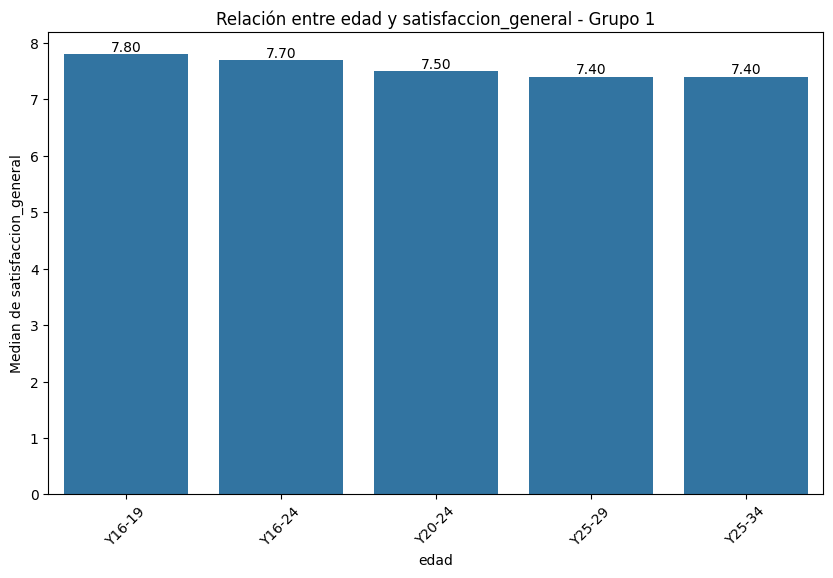

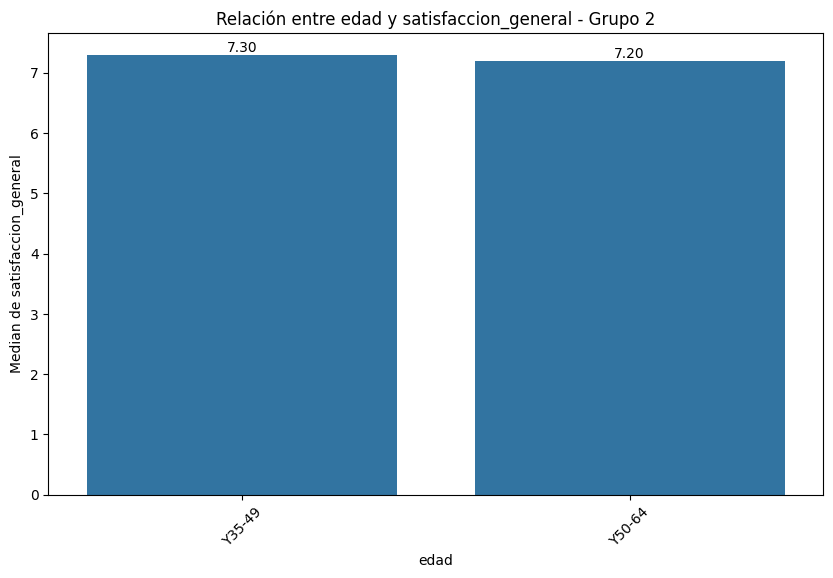

In [1148]:
plot_categorical_numerical_relationship(df_edad, "edad", "satisfaccion_general", show_values=True, measure="median")

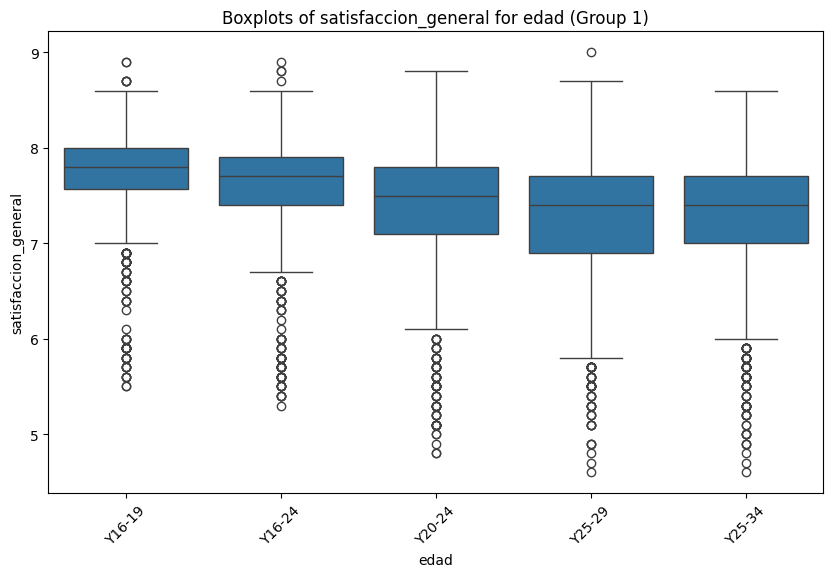

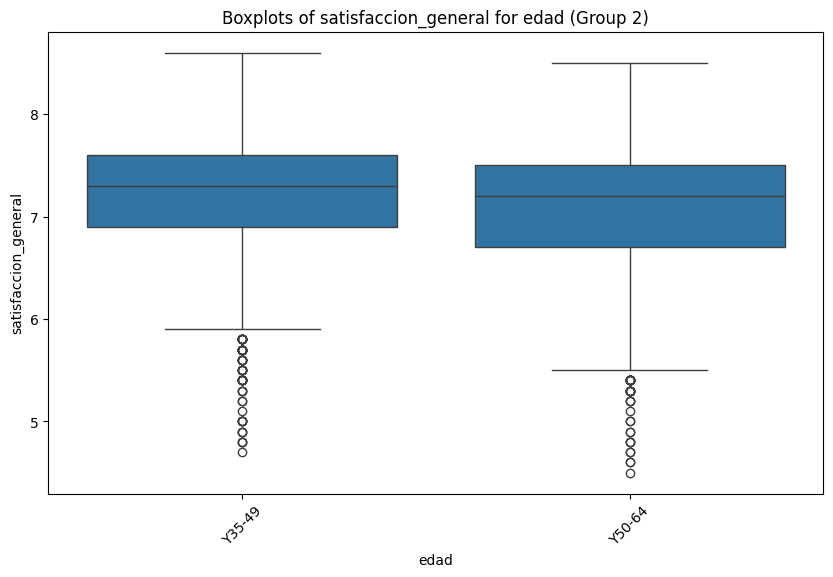

In [1149]:
plot_grouped_boxplots(df_edad, "edad", "satisfaccion_general")

Aquí ya solo tenemos los datos que nos interesan para descartar nuestra hipótesis y parece claro que cuanto más joven es la población mayor es su satisfacción, los valores son también menos dispersos y se concentran todos en la parte alta, no tienen ningún outlier excesivamente bajo.

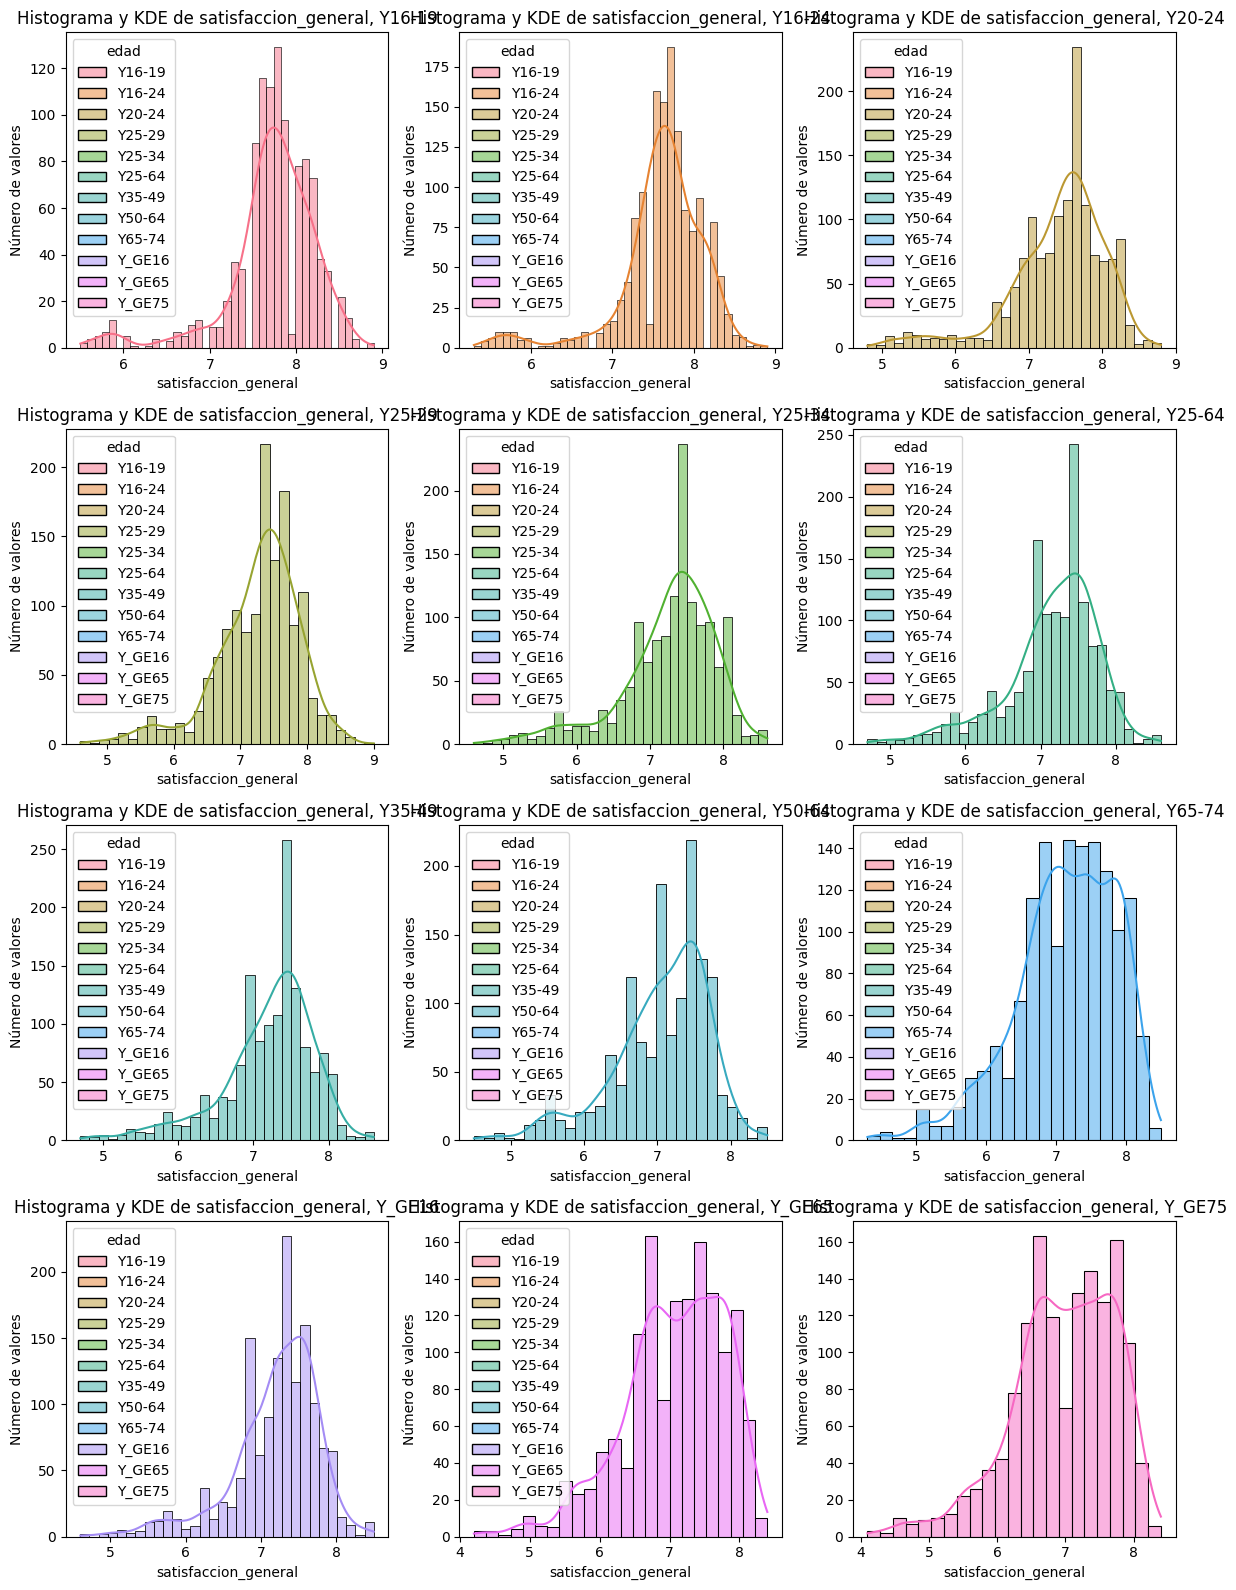

In [1150]:
pinta_histogramas_cat_num(df_sat, "edad", "satisfaccion_general")

En los histogramas no se observa nada nuevo destacable, se puede ver que la condensación de los valores a medida que aumenta la edad se da en una zona ligeramente más baja y los valores máximos y mínimos son también cada vez más bajos.   
Vamos a hacer el test ANOVA para ver si podemos extrapolar nuestros resultados y rechazar la hipótesis nula, que en este caso es que son variables independientes y por lo tanto las variaciones de una no afectan a la otra.

In [1151]:
grupos = df_sat["edad"].unique()
ingresos_edad = [df_sat[df_sat.edad == grupo]["satisfaccion_general"] for grupo in grupos]

In [1152]:
f_val, p_val = stats.f_oneway(*ingresos_edad)

print("Valor F:", f_val)
print("Valor P:", p_val)

Valor F: 153.95311084733183
Valor P: 0.0


Al ser 0 el valor P podemos rechazar la hipótesis nula y confirmar que las dos variables están relacionadas entre sí, como habíamos observado en los gráficos.

#### geo y satisfaccion_general

Nota: "geo", a pesar de ser una variable categórica tiene 30 valores diferentes, por lo que, para acotar, directamente vamos a quedarnos con países con un porcentaje de población bajo que no puede afrontar imprevistos y con ingresos altos (es decir, los países que nos interesan desde el punto de vista económico) y vamos a ver su satisfacción en 2024.

In [1153]:
cond1 = df_sat.isced11 == 'TOTAL'
cond2 = df_sat.genero == 'T'
cond3 = df_sat.edad == 'Y_GE16'
cond4 = df_sat.categoria_imprevistos == "bajo"
cond5 = df_sat.periodo == "2024"
cond6 = df_sat.categoria_ingresos.isin(["alta", "muy alta"])
df_pais = df_sat.copy().loc[cond1 & cond2 & cond3 & cond4 & cond5 & cond6].sort_values(by="mediana_ingresos", ascending= False)
df_pais

,isced11,genero,edad,edad_ingresos,geo,periodo,satisfaccion_general,categoria_satisfaccion,mediana_ingresos,categoria_ingresos,media_ingresos,no_afrontar_imprevistos(%),categoria_imprevistos
16575,TOTAL,T,Y_GE16,Y_GE16,LU,2024-01-01,7.2,baja,51883.0,muy alta,59346.0,22.5,bajo
16591,TOTAL,T,Y_GE16,Y_GE16,NO,2024-01-01,7.6,alta,40878.0,alta,43812.0,23.7,bajo
16527,TOTAL,T,Y_GE16,Y_GE16,DK,2024-01-01,7.6,alta,34594.0,alta,40444.0,21.1,bajo
16503,TOTAL,T,Y_GE16,Y_GE16,AT,2024-01-01,7.6,alta,34089.0,alta,38119.0,20.9,bajo
16587,TOTAL,T,Y_GE16,Y_GE16,NL,2024-01-01,7.6,alta,31919.0,alta,35569.0,17.0,bajo
16507,TOTAL,T,Y_GE16,Y_GE16,BE,2024-01-01,7.6,alta,30583.0,alta,33498.0,21.5,bajo
16547,TOTAL,T,Y_GE16,Y_GE16,FI,2024-01-01,7.8,alta,28866.0,alta,32210.0,27.3,bajo
16607,TOTAL,T,Y_GE16,Y_GE16,SE,2024-01-01,7.4,baja,27328.0,alta,29859.0,22.5,bajo
16583,TOTAL,T,Y_GE16,Y_GE16,MT,2024-01-01,7.5,alta,20885.0,alta,24010.0,18.3,bajo
16611,TOTAL,T,Y_GE16,Y_GE16,SI,2024-01-01,7.7,alta,19562.0,alta,21125.0,23.2,bajo


In [1154]:
cond7 = df_sat.geo.isin(df_pais.geo.unique().tolist())

df_pais = df_sat.copy().loc[cond5 & cond7] # cond7 realmente ya me agrupa todas las demás, pero sigo queriendo que los valores sean solo para 2024
df_pais.geo.nunique()

10

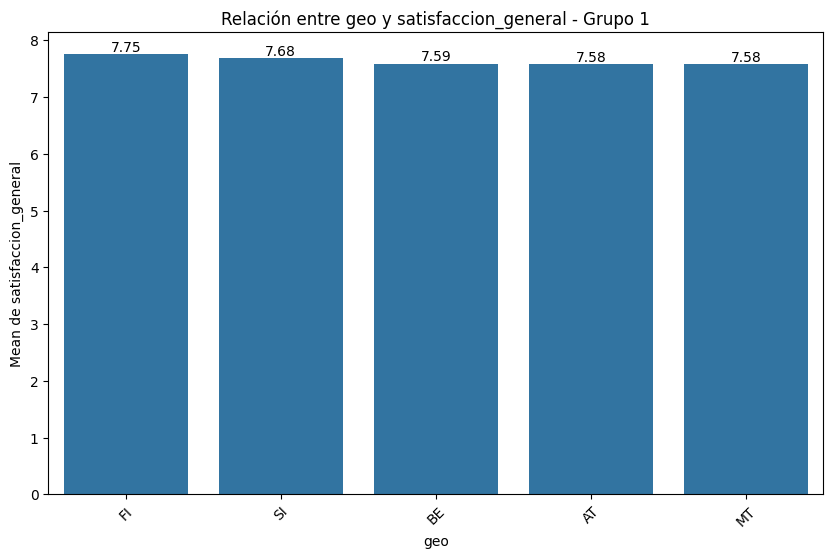

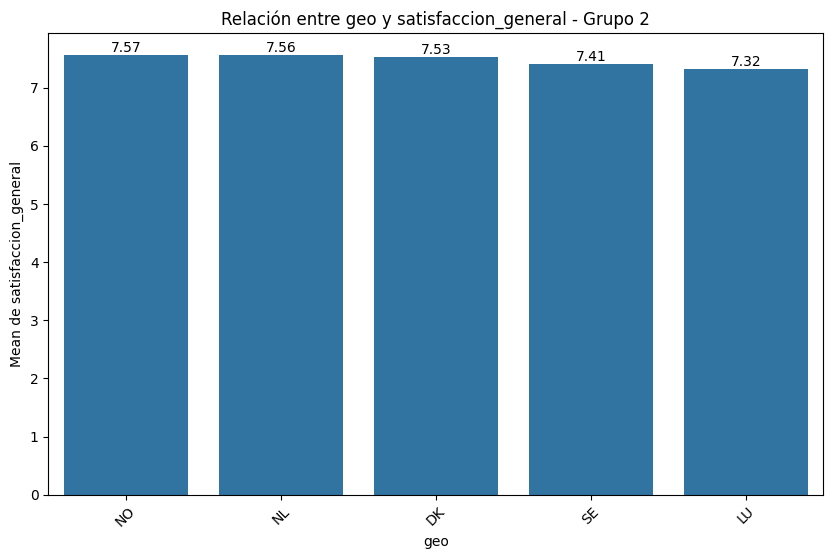

In [1155]:
plot_categorical_numerical_relationship(df_pais, "geo", "satisfaccion_general", show_values=True, measure="mean")

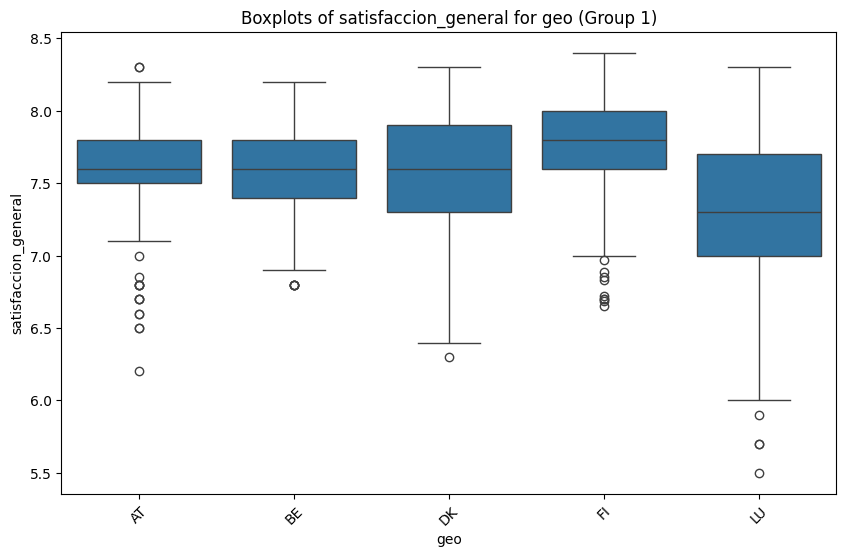

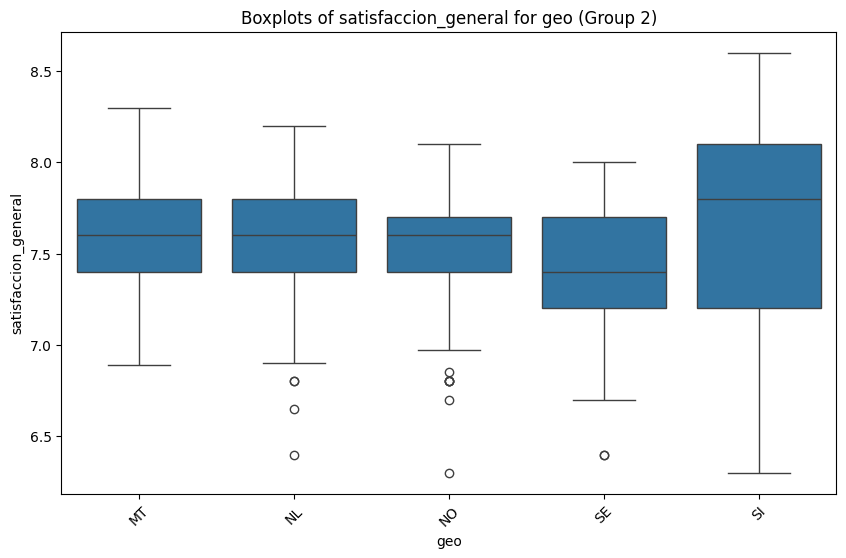

In [1156]:
plot_grouped_boxplots(df_pais, "geo", "satisfaccion_general")

Con la visualización de los diagramas de caja de este grupo seleccionado de países con una buena situación desde el punto de vista económico obtenemos unos resultados muy potentes. A priori podría parecernos que los más interesantes son los que tienen la categoría de satisfacción baja, pero al visualizar la dispersión de los valores vemos que es así en el caso de Luxemburgo, ya que es el que tiene los ingresos más altos y tiene una dispersión de valores grande, por lo que tiene grupos de población con una satisfacción bastante baja. Sin embargo, debido a su dispersión de valores de satisfacción, Dinamarca (categoria satisfacción: alta) y Eslovenia (categoria satisgaccion: alta) pueden ser mejores candidatos para establecer una filial que Suecia (categoría satisfacción: baja), ya que los primeros tiene un rango de satisfacción que llega hasta más abajo y el último está menos disperso y no tiene valores tan bajos.

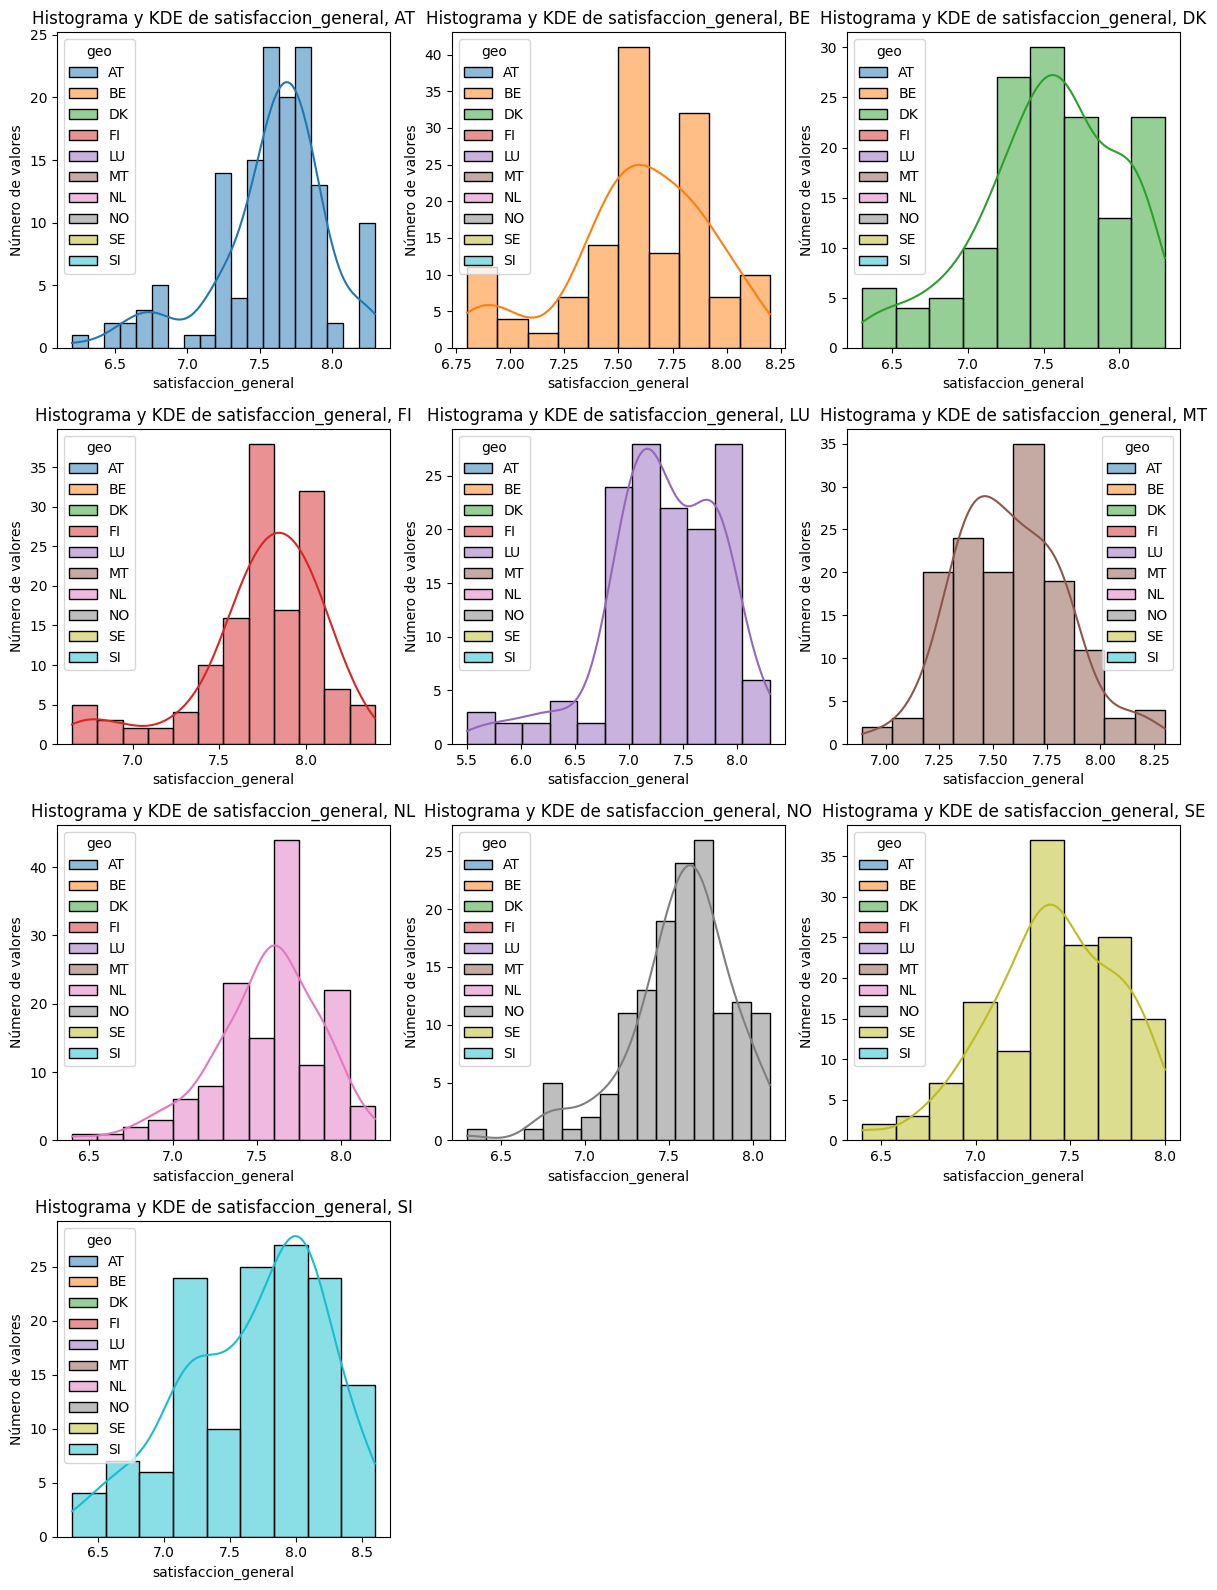

In [1157]:
pinta_histogramas_cat_num(df_pais, "geo", "satisfaccion_general")

Esta visualización de los histogramas y KDE de los países que hemos seleccionado confirma lo que apuntábamos antes, los países con un mayor número de grupos con valores más bajos son Luxemburgo, Dinamarca, Eslovenia y también Suecia. De todas formas vamos a confirmarlo con números:

In [1158]:
df_pais.loc[df_pais.satisfaccion_general <= 7.4]["geo"].value_counts()

geo
LU    85
SE    77
DK    52
MT    49
SI    45
NL    44
NO    38
BE    38
AT    33
FI    19
Name: count, dtype: int64

Vemos que si utilizamos la mediana como referencia se cumple lo observado, menos por Malta, que tiene más que Suecia, pero sabiendo que son países que tienen valores bajos, vamos a buscar valores más bajos, por debajo de 7.

In [1159]:
df_pais.loc[df_pais.satisfaccion_general <= 7]["geo"].value_counts()

geo
LU    37
DK    20
SE    19
SI    17
BE    15
AT    14
NL    11
FI    10
NO    10
MT     2
Name: count, dtype: int64

Los países que coinciden entre los 5 primeros son los 4 que habíamos mencionado en la visualización, parece que desde el punto de vista de la satisfacción, teniendo en cuenta los filtros que hemos aplicado, que consideran también variables económicas, los países más interesantes son estos 4. Para continuar, haremos el mismo análisis del df filtrado con las variables "geo" e "ingresos". Buscaré coincidencias entre los países que resultan buenos candidatos desde ambos puntos de vista.

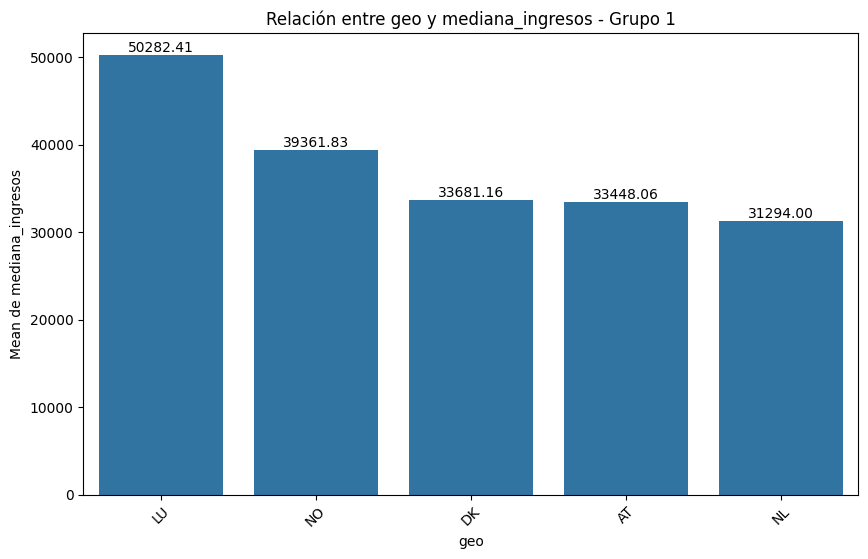

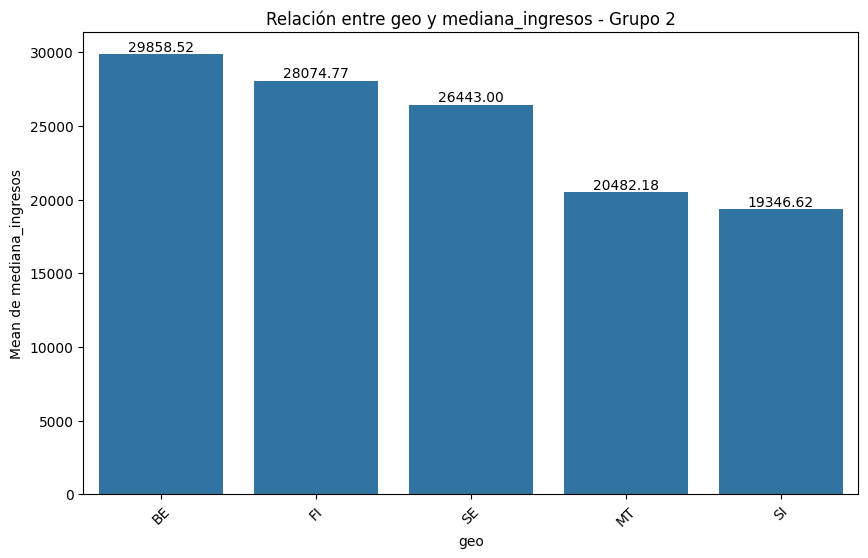

In [1160]:
plot_categorical_numerical_relationship(df_pais, "geo", "mediana_ingresos", show_values=True, measure="mean")

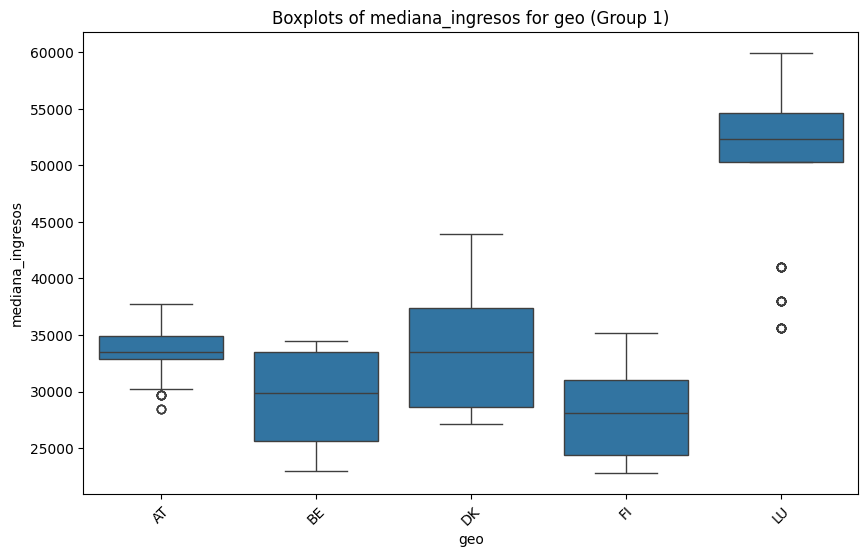

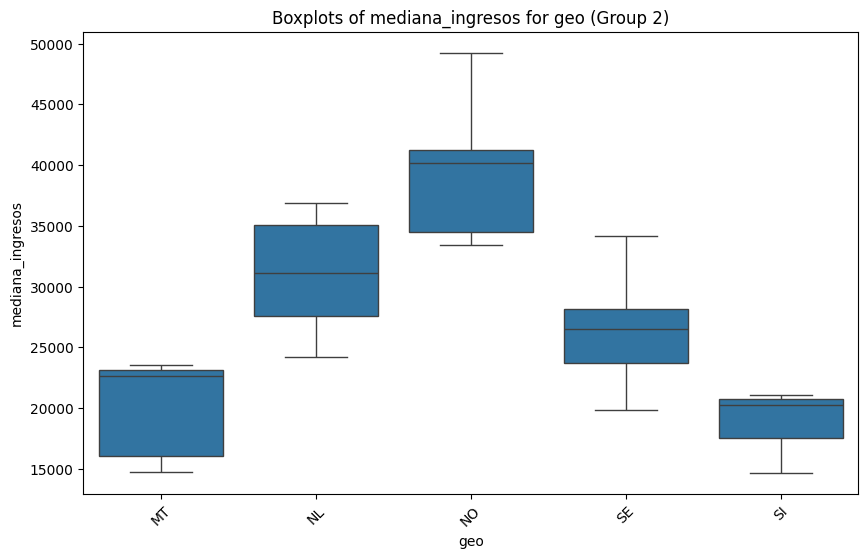

In [1161]:
plot_grouped_boxplots(df_pais, "geo", "mediana_ingresos")

La variable "mediana_ingresos" en función del país es en general una variable poco dispersa y con pocos outliers, lo que quiere decir que los valores de cada país están concentrados. Los países con los valores más interesantes en cuanto a ingresos son, por este orden, Luxemburgo, Noruega, Dinamarca, Países Bajos y Austria. Al ver que sus ingresos son bastante bajos en relación con los demás países de la lista, podemos descartar a Eslovenia. Si no encontrásemos un candidato mejor, Austria y Países Bajos pueden ser buenos candidatos, ya que también tienen grupos con valores bajos de satisfacción.

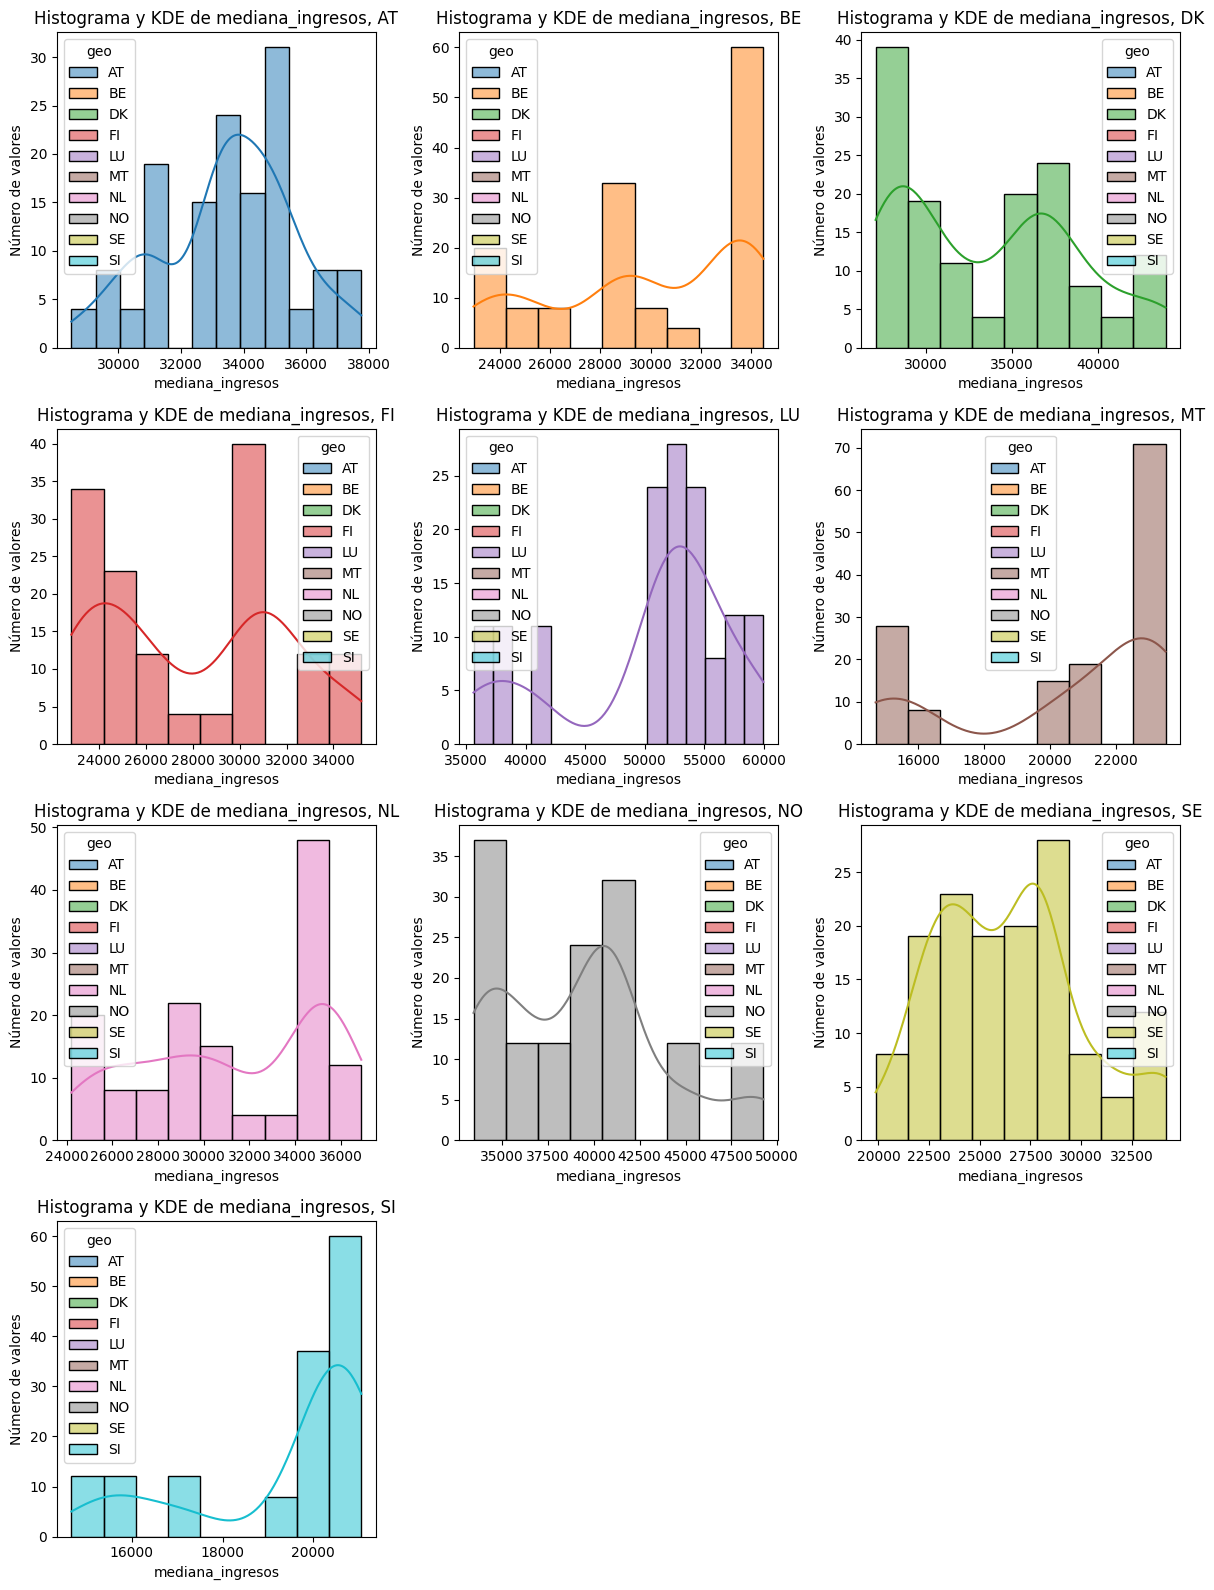

In [1162]:
pinta_histogramas_cat_num(df_pais, "geo", "mediana_ingresos")

Los histogramas no añaden mucha información, simplemente confirman lo que ya hemos podido observar en los otros gráficos. De todas formas vamos a comprobar lo observado con los números.

In [1163]:
df_pais.loc[df_pais.mediana_ingresos >= 35000]["geo"].value_counts()

geo
LU    141
NO    104
DK     64
NL     44
AT     35
FI      4
Name: count, dtype: int64

In [1164]:
df_pais.loc[df_pais.mediana_ingresos >= 40000]["geo"].value_counts()

geo
LU    119
NO     72
DK     20
Name: count, dtype: int64

Viendo los datos numéricos parece claro que tenemos dos candidatos claros al país idóneo para que la empresa abra su filial, ya que Luxemburgo y Dinamarca son dos países con bastantes valores de satisfacción baja y además ambos están en el top 3 de países con ingresos más altos. Ahora falta ver cuántos de los grupos con satisfacción baja se encuentran entre los que tienen unos ingresos altos. Aunque podemos anticipar que si consideramos como umbral de ingresos los 35000€ en Luxemburgo todos los grupos con satisfacción baja van a estar entre los de ingresos altos.

In [1165]:
df_pais.loc[(df_pais.mediana_ingresos >= 35000) & (df_pais.satisfaccion_general <= 7.4)]["geo"].value_counts()

geo
LU    85
DK    34
NO    33
NL    14
AT    13
FI     1
Name: count, dtype: int64

In [1166]:
df_pais.loc[(df_pais.mediana_ingresos >= 40000) & (df_pais.satisfaccion_general <= 7.4)]["geo"].value_counts()

geo
LU    78
NO    32
DK     7
Name: count, dtype: int64

In [1167]:
df_pais.loc[(df_pais.mediana_ingresos >= 35000) & (df_pais.satisfaccion_general <= 7)]["geo"].value_counts()

geo
LU    37
DK    14
NO     8
NL     6
AT     5
Name: count, dtype: int64

In [1168]:
df_restrictivo = df_pais.loc[(df_pais.mediana_ingresos >= 40000) & (df_pais.satisfaccion_general <= 7)].geo.value_counts()
df_restrictivo

geo
LU    35
NO     8
DK     1
Name: count, dtype: int64

Viendo los datos, el segundo mejor candidato podría estar entre Noruega y Dinamarca, ya que Noruega tiene también bastantes valores de satisfacción baja y con ingresos altos, pero claramente es Luxemburgo el país que más tiene. Vamos a comprobar que tenga un valor bajo de porcentaje de personas que no pueden hacer frente a los imprevistos económicos antes de decidirnos por este país y analizar sus grupos de población.

In [1169]:
df_num.loc[(df_num.geo == "LU") & (df_num.periodo == 2024), "no_afrontar_imprevistos(%)"]

Series([], Name: no_afrontar_imprevistos(%), dtype: float64)

En vista de que es un valor bajo, tras los múltiples análisis realizados, concluyo que Luxemburgo es el país más adecuado para empezar la andadura de la empresa en Europa, ahora voy a analizar a qué grupos pueden dirigirse más específicamente los servicios de la empresa.

### Análisis de un país y un grupo acotado

### Tabla de información de variables

Nota general: todas las variables a partir de "satisfacción general" tienen valores que varían según el país y el año, por eso no se especifica este dato para cada variable concreta.
|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|isced11|El nombre en castellano es Clasificación Internacional Uniforme de la Educación (CINE) |Categórica|2|Mostraré una leyenda con las categorías más abajo. En principio menos importante porque voy a centrarme más en la edad y los ingresos. Además no tengo valores de ingresos por nivel de estudios||
|genero|El género de los participantes: masculino, femenino o ambos|Categórica|2|En principio menos importante porque voy a centrarme más en la edad y los ingresos||
|edad|Grupos de edad de los participantes|Categórica|1|Permite analizar la satisfacción por la edad, una de las preguntas a las que busco dar respuesta||
|edad_ingresos|Columna que he creado yo para añadir los datos de ingresos al dataset de satisfacción|||Me la quedo por si necesito consultarla, pero no la tendré en cuenta en el análisis||
|geo|Entidad geopolítica a la que corresponden los datos, son todo países menos uno que es "EU-27"|Categórica|1|Permite analizar la satisfacción según el país, importante, ya que busco quedarme con un país concreto y dentro de este país buscar un grupo objetivo||
|periodo|Año al que corresponden los datos: 2021-2024|Categórica|2|Los datos que me interesan en principio son los de 2024, aunque puede ser útil ver una evolución temporar para ver la tendencia||
|satisfaccion_general|Satisfacción de los participantes con la vida en general en una escala del 1 al 10 por nivel de estudios, edad y género. El valor que se presenta en esta columna es el valor medio de los participantes que pertenecen al mismo país, nivel de estudios, edad y género en el mismo año.|Numérica discreta|0|Es la variable central que da sentido a todo el análisis. Importante saber que son valores medios de los grupos que responden a la encuesta, no resultados por individuos aislados||
|media_ingresos|Media de ingresos en euros por edad y género (no tengo datos que tengan en cuenta el nivel de estudios)|Numérica continua|2|De momento no le doy gran importancia porque en principio voy a usar la mediana, que es más precisa||
|mediana_ingresos|Mediana de ingresos en euros por edad y género (no tengo datos que tengan en cuenta el nivel de estudios)|Numérica continua|0|Columna clave, ya que estoy buscando una buena oportunidad de mercado||
|no_afrontar_imprevistos(%)|Porcentaje de la población de cada país que no puede hacer frente a gastos inesperados|Numérica discreta/continua|1|Aunque no tenga información desglosada por grupos de población y solo del país en general, puede ser muy útil a la hora de decidir en qué país quiero establecer mi filial, ya que si hay una gran parte de la población que no puede hacer frente a gastos inesperados, probablemente no podrá permitirse tampoco un gasto extra para mejorar su satisfacción||

De momento voy a trabajar con los grupos de Luxemburgo con una satisfacción por debajo de 7.4 y por encima de 35000€ de ingresos en 2024, luego puedo acotar más los límites si me interesa.   
Voy a guardar el dataset en una variable y a hacer una pequeña limpieza, sobre todo de grupos de edad que no me aportan mucho si quiero buscar grupos más concretos.

In [1170]:
cond1 = df_sat.geo == "LU"
cond2 = df_sat.satisfaccion_general <= 7.4
cond3 = df_sat.periodo == "2024"

df_lux = df_sat.copy()[cond1 & cond2 & cond3]
df_lux.drop(columns= "geo", inplace=True)

In [1171]:
df_lux.edad.unique()

array(['Y25-29', 'Y25-34', 'Y25-64', 'Y35-49', 'Y50-64', 'Y65-74',
       'Y_GE16', 'Y_GE65', 'Y20-24', 'Y16-24', 'Y_GE75'], dtype=object)

In [1172]:
df_lux = df_lux.copy().loc[df_lux.edad.isin(['Y25-29', 'Y25-34', 'Y35-49', 'Y50-64', 'Y65-74',
       'Y20-24', 'Y16-24', 'Y_GE75'])]

Además me voy a quedar solo con los datos que tienen la media de todos los niveles de estudios, ya que no tengo datos de ingresos por estudios.

In [1173]:
df_lux = df_lux.copy().loc[df_lux.isced11 == "TOTAL"]

In [1174]:
df_lux.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 12735 to 16335
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   isced11                     15 non-null     object        
 1   genero                      15 non-null     object        
 2   edad                        15 non-null     object        
 3   edad_ingresos               15 non-null     object        
 4   periodo                     15 non-null     datetime64[ns]
 5   satisfaccion_general        15 non-null     float64       
 6   categoria_satisfaccion      15 non-null     object        
 7   mediana_ingresos            15 non-null     float64       
 8   categoria_ingresos          15 non-null     object        
 9   media_ingresos              15 non-null     float64       
 10  no_afrontar_imprevistos(%)  15 non-null     float64       
 11  categoria_imprevistos       15 non-null     object        

Ya tengo solo los 15 valores que más me interesan del dataset.

### Análisis univariante

Nota: ya quedan muy pocos valores y visualizando el dataset directamente podrían extraerse conclusiones, aunque de esta forma es más visual.

In [1175]:
df_lux.edad.value_counts()

edad
Y25-34    3
Y25-29    3
Y35-49    3
Y50-64    3
Y20-24    2
Y16-24    1
Name: count, dtype: int64

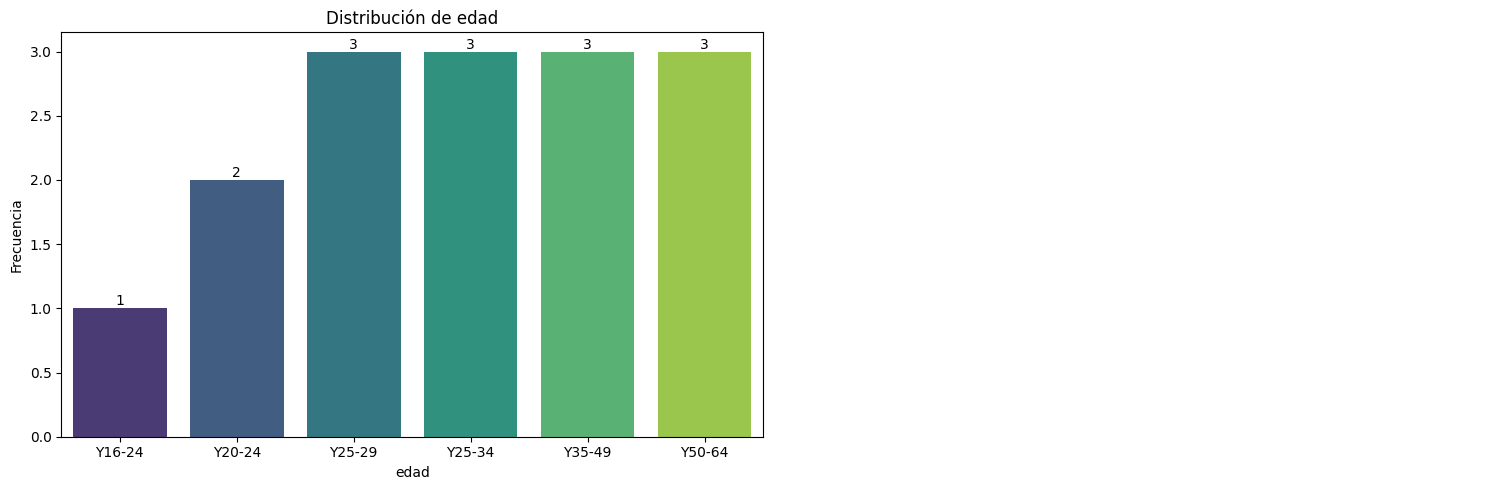

In [1176]:
pinta_categoricas(df_lux, ['edad'])

Observamos que en luxemburgo, las categorías de edad con distribución más baja en ambos géneros son las que van desde los 25 hasta los 64, aunque también hay algunas de personas más jóvenes, en este aspecto difiere del comportamiento del dataset completo, ya que las personas menos satisfechas eran las más mayores y aquí no tenemos ningún grupo de mayores de 65 años entre los menos felices.

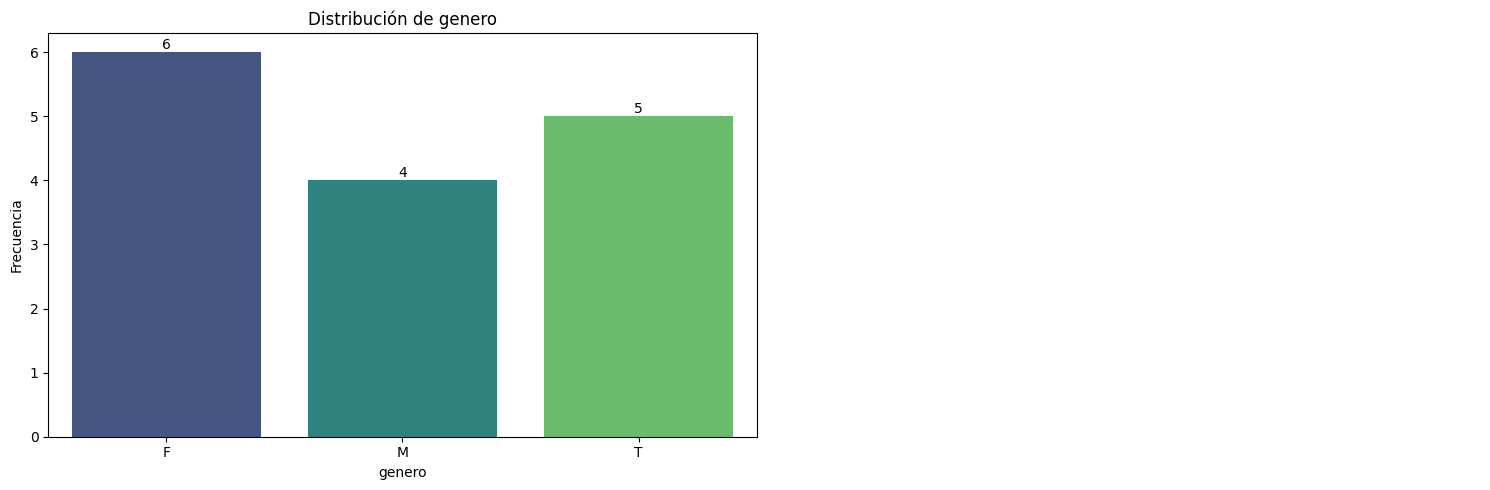

In [1177]:
pinta_categoricas(df_lux, ['genero'])

Al analizar los géneros de los grupos menos satisfechos, vemos que hay más mujeres que hombres entre estos grupos, por lo que el género también puede ser un factor a tener en cuenta, veremos si también es así dentro de nuestros grupos objetivo.

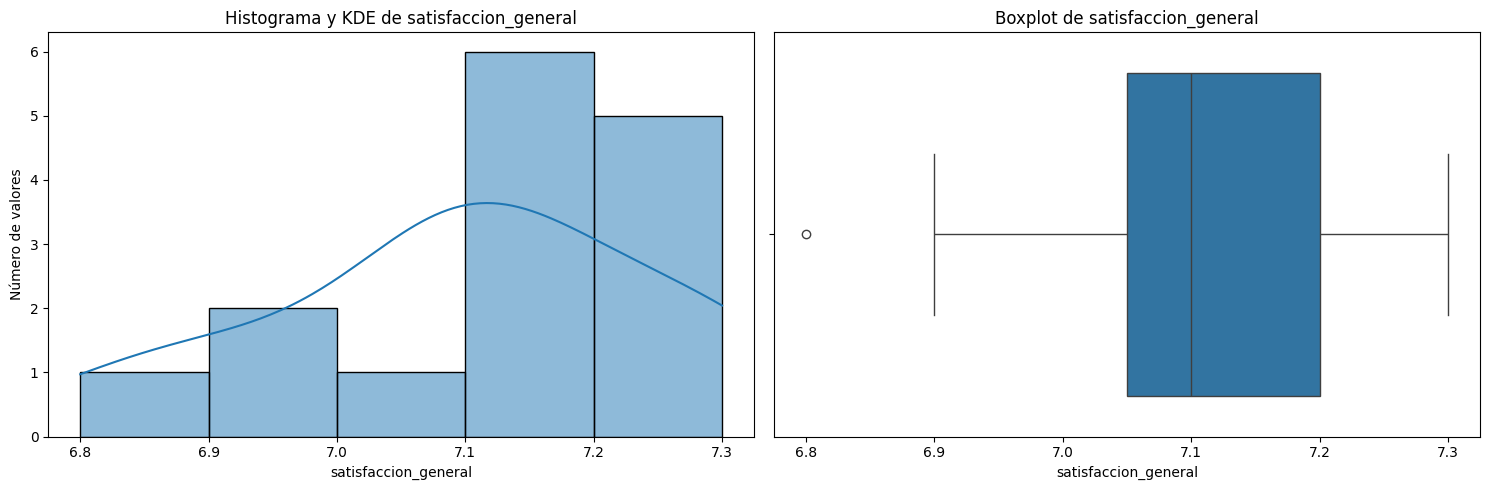

In [1178]:
pinta_hist_box(df_lux, ["satisfaccion_general"])

Como ya habíamos visto en cuando analizábamos el dataset en general, en concreto la distribución de satisfacción por países, la tendencia en Luxemburgo es que cuanto más baja la satisfacción, cada vez quedan menos grupos.

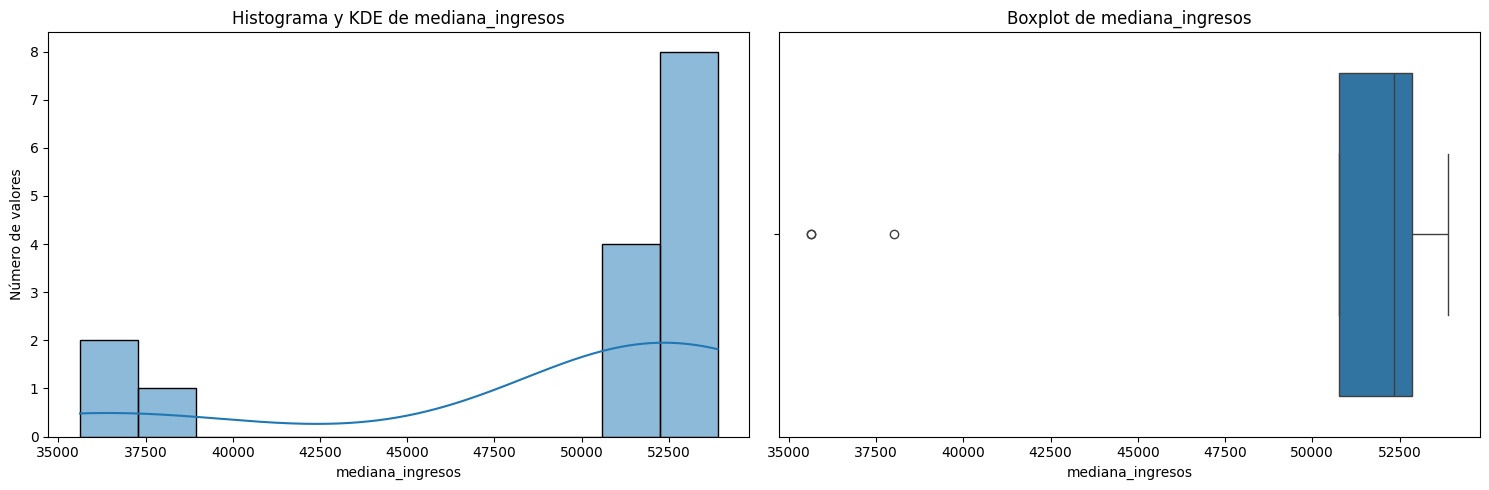

In [1179]:
pinta_hist_box(df_lux, ["mediana_ingresos"])

Hay una diferencia muy grande entre 3 de los grupos y el resto, probablemente sean los grupos de personas más jóvenes.

### Análisis bivariante y multivariante

### satisfaccion_general y mediana_ingresos

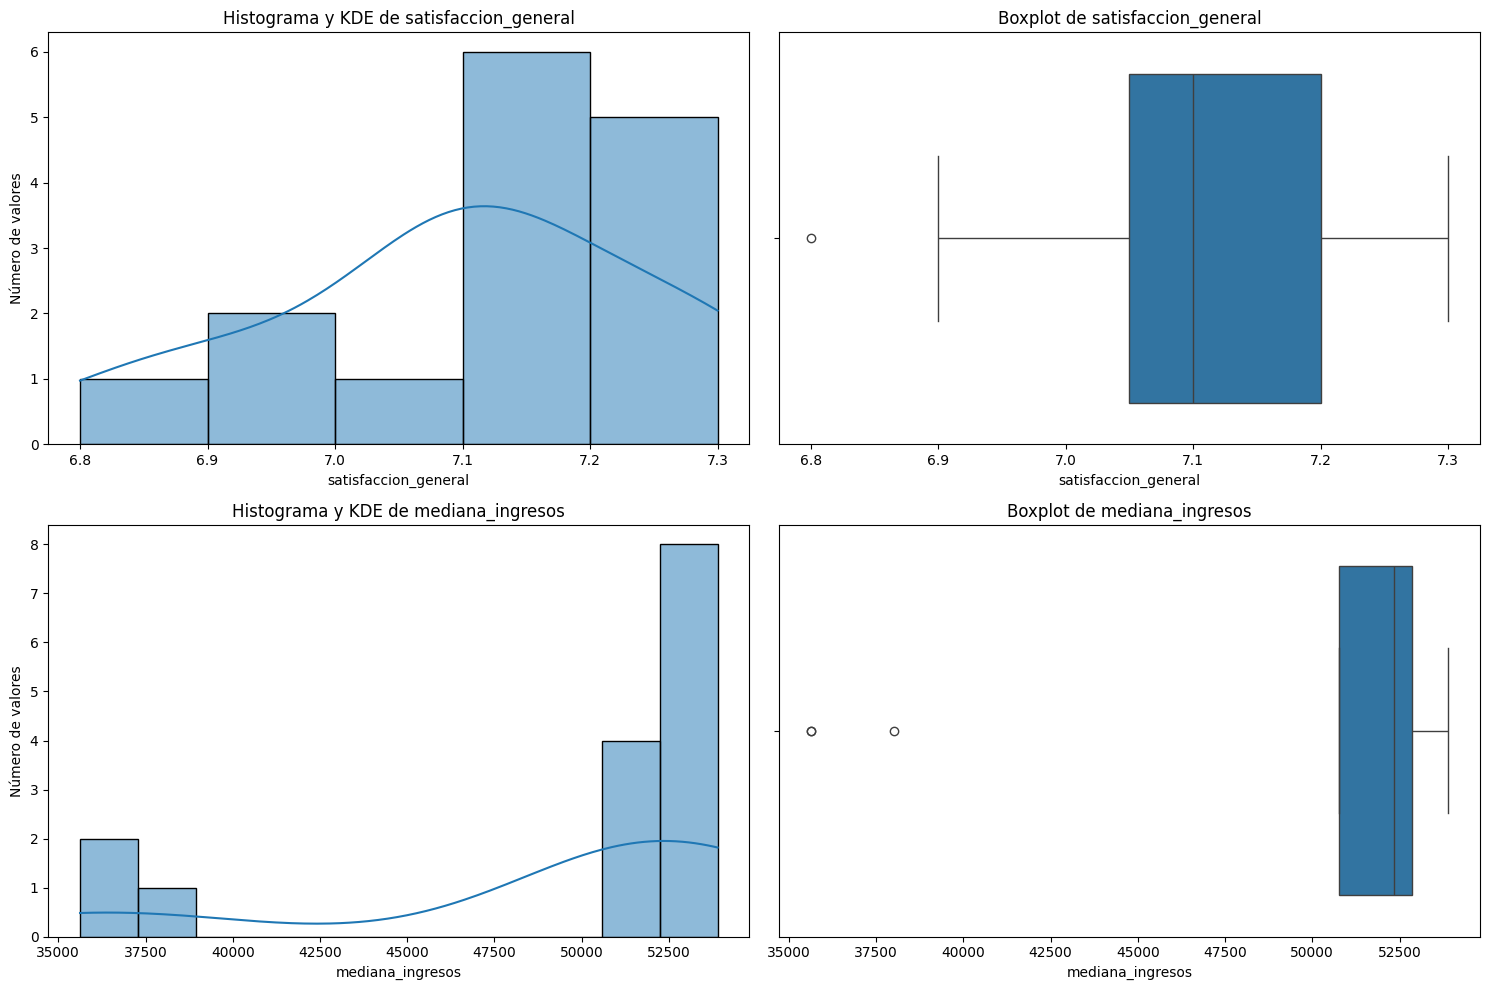

In [1180]:
pinta_hist_box(df_lux, ["satisfaccion_general", "mediana_ingresos"])

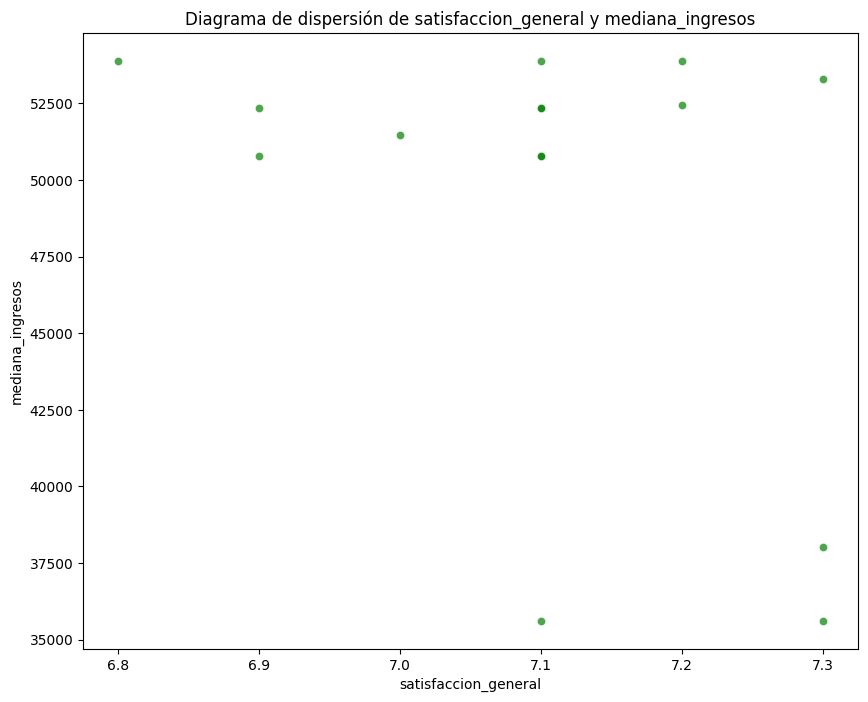

In [1181]:
dispersion_hasta_cuatro(df_lux, "satisfaccion_general", "mediana_ingresos")

Observamos que los ingresos no parecen condicionar la satisfacción en esta muestra de Luxemburgo con la que estamos trabajando.

### edad y satisfaccion_general

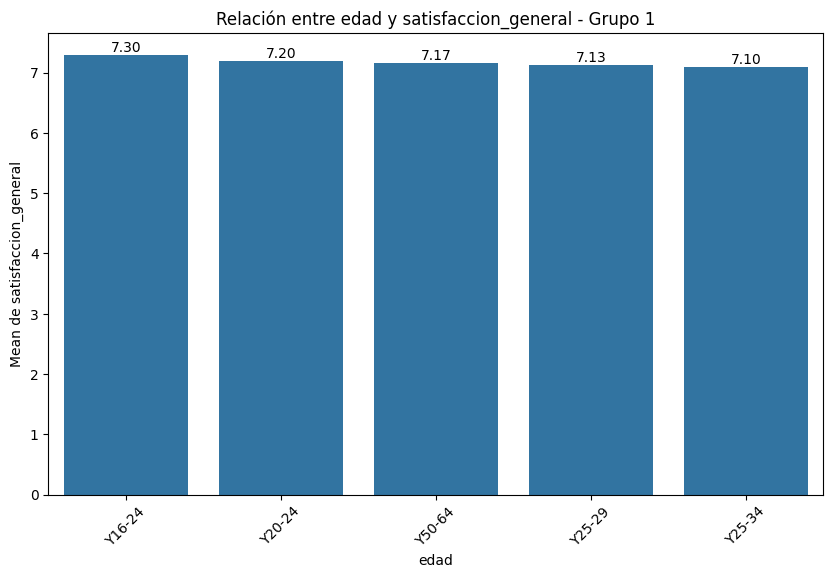

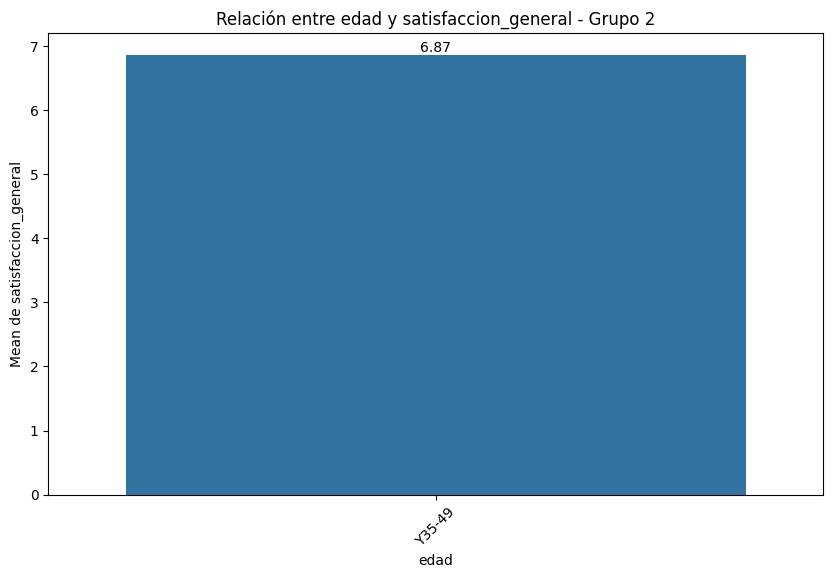

In [1182]:
plot_categorical_numerical_relationship(df_lux, "edad", "satisfaccion_general", show_values=True, measure="mean")

Se confirma lo que apuntábamos al ver los valores de edad, en este caso no disminuye linealmente la satisfacción a medida que aumenta la edad. Por el contrario hay grupos de gente mayor más satisfechos con su vida que otros grupos de personas más jóvenes, en concreto las personas menos satisfechas son las de 35-49 años.

### edad y mediana_ingresos

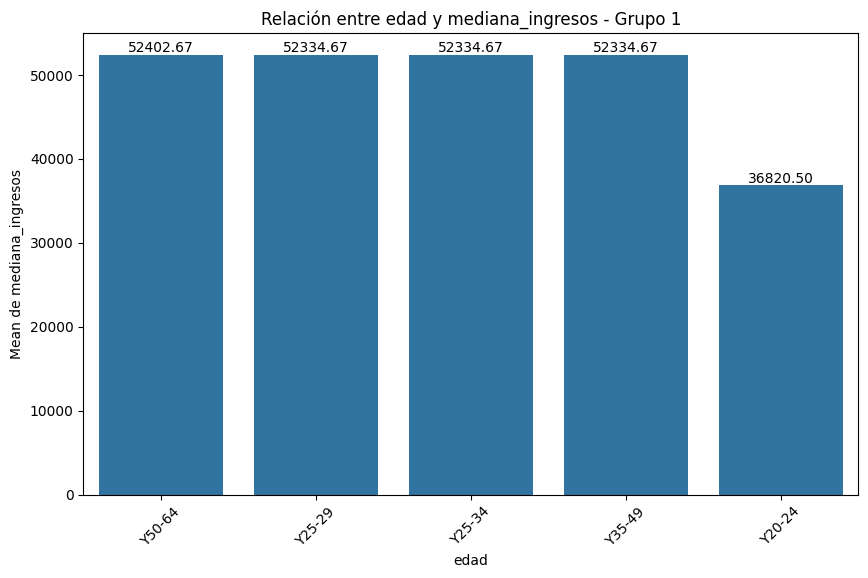

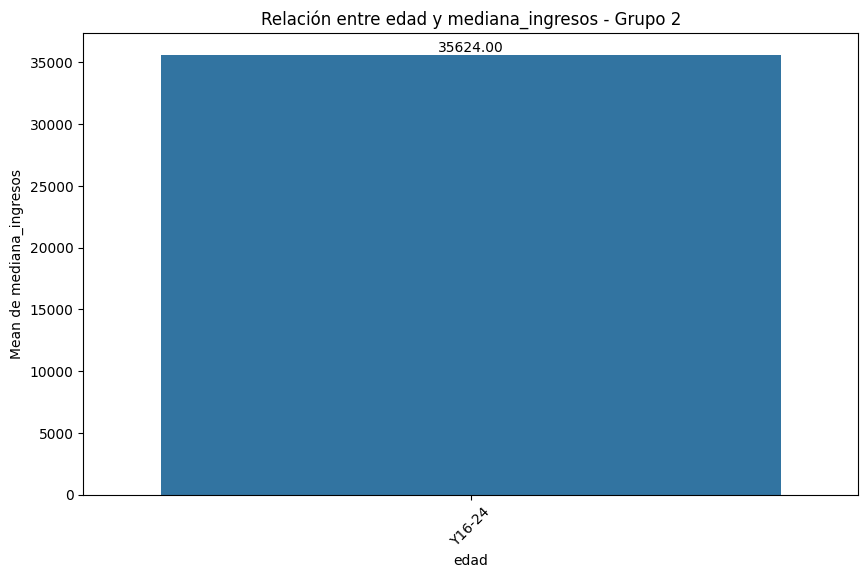

In [1183]:
plot_categorical_numerical_relationship(df_lux, "edad", "mediana_ingresos", show_values=True, measure="mean")

En este caso, no podemos ver si afectan los ingresos entre las categorías entre los 25-49 años, ya que en el dataset del que obtuve los datos de ingresos estaban en una sola categoría, así que no podemos saber bien si la edad y los ingresos están ligados dentro de esas 3 categorías, pero sí que vemos que los ingresos de la categoría inmediatamente mayor son algo superiores y los de las categorías menores son inferiores, por lo que es probable que los ingresos vayan aumentando con la edad.

### genero y satisfaccion_general

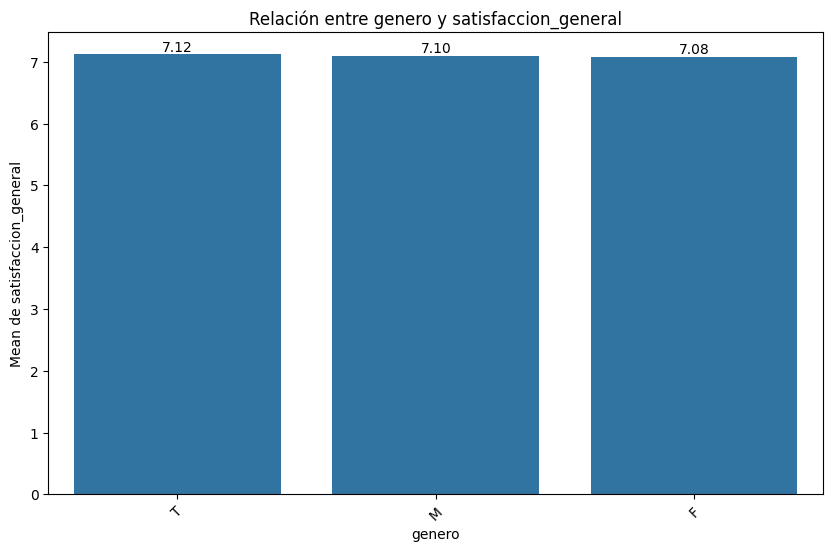

In [1184]:
plot_categorical_numerical_relationship(df_lux, "genero", "satisfaccion_general", show_values=True, measure="mean")

El rango de valores de satisfacción es tan pequeño que las diferencias son despreciables, no parece que la satisfacción vaya en función del género.

### genero y mediana_ingresos

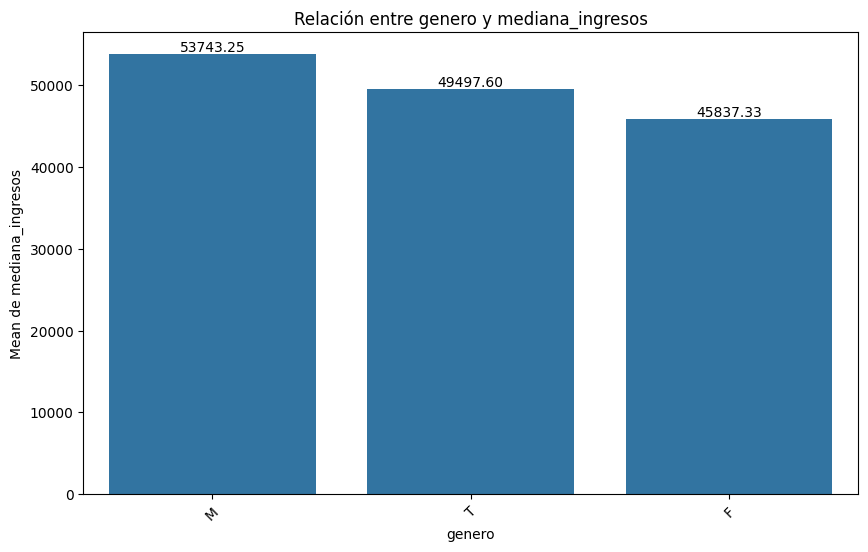

In [1185]:
plot_categorical_numerical_relationship(df_lux, "genero", "mediana_ingresos", show_values=True, measure="mean")

Al analizar los ingresos en función del género se puede ver que existe una diferencia notable entre los de los hombres y los de las mujeres, lo cual podría explicar también que haya más grupos de mujeres que de hombres entre nuestro df de Luxemburgo de grupos con satisfacción baja. Sin embargo, al no estar ligados los ingresos a la satisfacción en este grupo, lo mejor será ver una representación de las 3 variables juntas.

Como conclusión del análisis bivariante de este dataset ya muy acotado podemos extraer que entre los grupos con menor satisfacción de Luxemburgo, la variable más relacionada con la satisfacción es la edad.

### genero, mediana_ingresos, satisfaccion_general

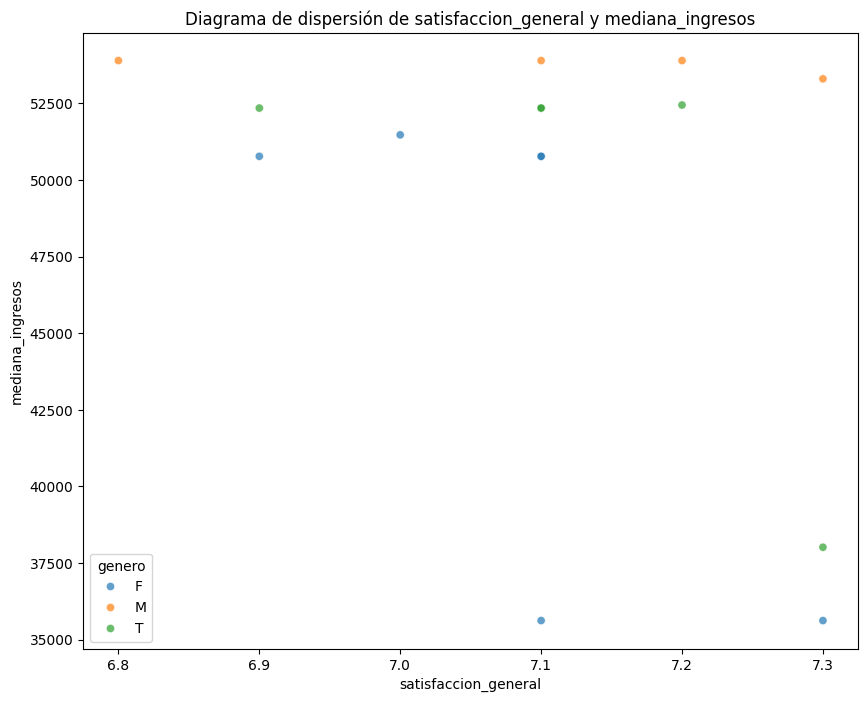

In [1186]:
dispersion_hasta_cuatro(df_lux, "satisfaccion_general", "mediana_ingresos", col_color= "genero")

Son muy pocos los datos para sacar conclusiones, pero sí que parece que, en general, no parece que las mujeres de esta muestra presenten una satisfacción menor que la de los hombres, lo que sí es claramente menor, como ya habíamos visto son los ingresos.

### edad, mediana_ingresos, satisfaccion_general

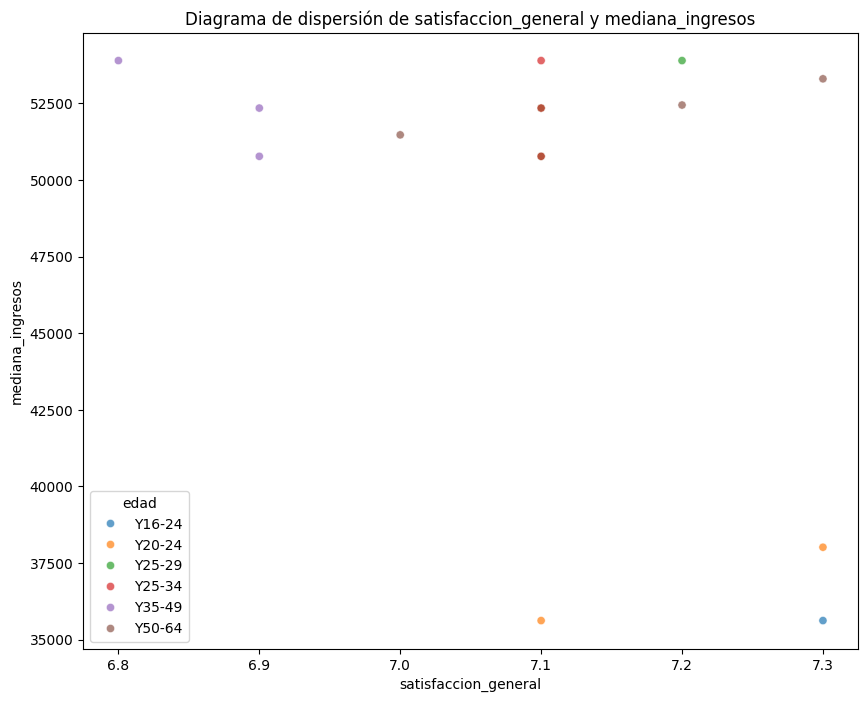

In [1187]:
dispersion_hasta_cuatro(df_lux, "satisfaccion_general", "mediana_ingresos", col_color= "edad")

En este gráfico vemos que la edad sí que está más ligada a la satisfacción, ya que hay varios grupos de edad de los que todas las categorías de género está incluídas en este conjunto y grupos de edad de los que ninguna categoría de género está incluido, además, la satisfacción de los diferentes géneros de cada grupo de edad se agrupa en valores parecidos.

In [1209]:
df_lux["edad_numero"] = 1
for i, edad in enumerate(df_lux.sort_values(by = "edad")["edad"].unique()):
    df_lux.loc[df_lux.edad == edad, "edad_numero"] = i

df_lux.sort_values(by = "satisfaccion_general")

,isced11,genero,edad,edad_ingresos,periodo,satisfaccion_general,categoria_satisfaccion,mediana_ingresos,categoria_ingresos,media_ingresos,no_afrontar_imprevistos(%),categoria_imprevistos,edad_numero
14775,TOTAL,M,Y35-49,Y25-49,2024-01-01,6.8,baja,53892.0,muy alta,60362.0,22.5,bajo,4
13335,TOTAL,F,Y35-49,Y25-49,2024-01-01,6.9,baja,50769.0,muy alta,58280.0,22.5,bajo,4
16215,TOTAL,T,Y35-49,Y25-49,2024-01-01,6.9,baja,52343.0,muy alta,59322.0,22.5,bajo,4
13455,TOTAL,F,Y50-64,Y50-64,2024-01-01,7.0,baja,51469.0,muy alta,59019.0,22.5,bajo,5
14535,TOTAL,M,Y25-34,Y25-49,2024-01-01,7.1,baja,53892.0,muy alta,60362.0,22.5,bajo,3
13095,TOTAL,F,Y25-34,Y25-49,2024-01-01,7.1,baja,50769.0,muy alta,58280.0,22.5,bajo,3
12855,TOTAL,F,Y20-24,Y16-24,2024-01-01,7.1,baja,35624.0,alta,43890.0,22.5,bajo,1
12975,TOTAL,F,Y25-29,Y25-49,2024-01-01,7.1,baja,50769.0,muy alta,58280.0,22.5,bajo,2
15975,TOTAL,T,Y25-34,Y25-49,2024-01-01,7.1,baja,52343.0,muy alta,59322.0,22.5,bajo,3
15855,TOTAL,T,Y25-29,Y25-49,2024-01-01,7.1,baja,52343.0,muy alta,59322.0,22.5,bajo,2


### genero, mediana_ingresos, satisfaccion_general

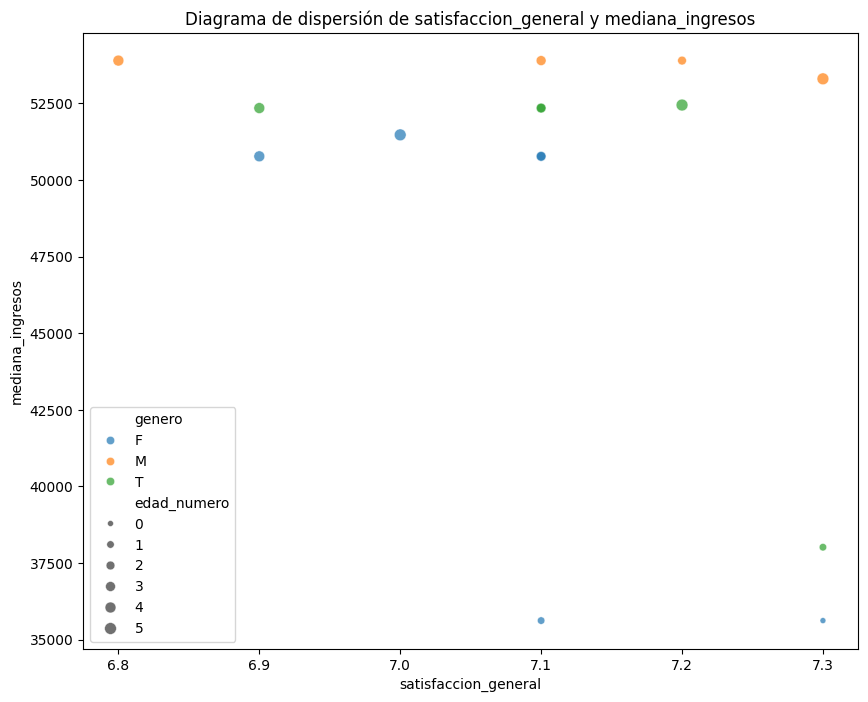

In [1189]:
dispersion_hasta_cuatro(df_lux, "satisfaccion_general", "mediana_ingresos", col_color= "genero", size="edad_numero")

Con esta visualización queda claro que la variable que está más ligada a la satisfacción es la edad, en concreto el grupo de edad menos feliz es el 4. Ahora consultaremos en el dataset a qué categoría corresponde, pero probablemente será, como anticipábamos el grupo de 35 a 49 años.

In [1190]:
df_lux.sort_values(by="satisfaccion_general")

,isced11,genero,edad,edad_ingresos,periodo,satisfaccion_general,categoria_satisfaccion,mediana_ingresos,categoria_ingresos,media_ingresos,no_afrontar_imprevistos(%),categoria_imprevistos,edad_numero
14775,TOTAL,M,Y35-49,Y25-49,2024-01-01,6.8,baja,53892.0,muy alta,60362.0,22.5,bajo,4
13335,TOTAL,F,Y35-49,Y25-49,2024-01-01,6.9,baja,50769.0,muy alta,58280.0,22.5,bajo,4
16215,TOTAL,T,Y35-49,Y25-49,2024-01-01,6.9,baja,52343.0,muy alta,59322.0,22.5,bajo,4
13455,TOTAL,F,Y50-64,Y50-64,2024-01-01,7.0,baja,51469.0,muy alta,59019.0,22.5,bajo,5
14535,TOTAL,M,Y25-34,Y25-49,2024-01-01,7.1,baja,53892.0,muy alta,60362.0,22.5,bajo,3
13095,TOTAL,F,Y25-34,Y25-49,2024-01-01,7.1,baja,50769.0,muy alta,58280.0,22.5,bajo,3
12855,TOTAL,F,Y20-24,Y16-24,2024-01-01,7.1,baja,35624.0,alta,43890.0,22.5,bajo,1
12975,TOTAL,F,Y25-29,Y25-49,2024-01-01,7.1,baja,50769.0,muy alta,58280.0,22.5,bajo,2
15975,TOTAL,T,Y25-34,Y25-49,2024-01-01,7.1,baja,52343.0,muy alta,59322.0,22.5,bajo,3
15855,TOTAL,T,Y25-29,Y25-49,2024-01-01,7.1,baja,52343.0,muy alta,59322.0,22.5,bajo,2


En efecto, confirmamos que el grupo con menor satisfacción es el que va de los 35 a los 49 años y son ambos géneros los que presentan un bajo nivel de satisfacción, por lo que, según este dataset, el sector más rentable para la empresa en Europa son las personas de los 35 a los 49 años que viven en Luxemburgo.

Por último analizaré la tendencia de satisfacción en este grupo en los úiltimos 4 años y la compararé con la de los ingresos.

In [1191]:
cond1 = df_sat.geo == "LU"
cond2 = df_sat.edad =="Y35-49"
cond3 = df_sat.isced11 == "TOTAL"

df_temp = df_sat.copy().loc[cond1 & cond2 & cond3]
df_temp

,isced11,genero,edad,edad_ingresos,geo,periodo,satisfaccion_general,categoria_satisfaccion,mediana_ingresos,categoria_ingresos,media_ingresos,no_afrontar_imprevistos(%),categoria_imprevistos
13332,TOTAL,F,Y35-49,Y25-49,LU,2021-01-01,7.5,alta,42546.0,alta,46922.0,21.3,bajo
13333,TOTAL,F,Y35-49,Y25-49,LU,2022-01-01,6.8,baja,46014.0,muy alta,49497.0,18.8,bajo
13334,TOTAL,F,Y35-49,Y25-49,LU,2023-01-01,7.0,baja,48290.0,muy alta,54831.0,24.1,bajo
13335,TOTAL,F,Y35-49,Y25-49,LU,2024-01-01,6.9,baja,50769.0,muy alta,58280.0,22.5,bajo
14772,TOTAL,M,Y35-49,Y25-49,LU,2021-01-01,7.4,baja,44442.0,muy alta,49881.0,21.3,bajo
14773,TOTAL,M,Y35-49,Y25-49,LU,2022-01-01,6.9,baja,46888.0,muy alta,51579.0,18.8,bajo
14774,TOTAL,M,Y35-49,Y25-49,LU,2023-01-01,6.8,baja,51590.0,muy alta,56670.0,24.1,bajo
14775,TOTAL,M,Y35-49,Y25-49,LU,2024-01-01,6.8,baja,53892.0,muy alta,60362.0,22.5,bajo
16212,TOTAL,T,Y35-49,Y25-49,LU,2021-01-01,7.4,baja,43600.0,muy alta,48424.0,21.3,bajo
16213,TOTAL,T,Y35-49,Y25-49,LU,2022-01-01,6.9,baja,46323.0,muy alta,50560.0,18.8,bajo


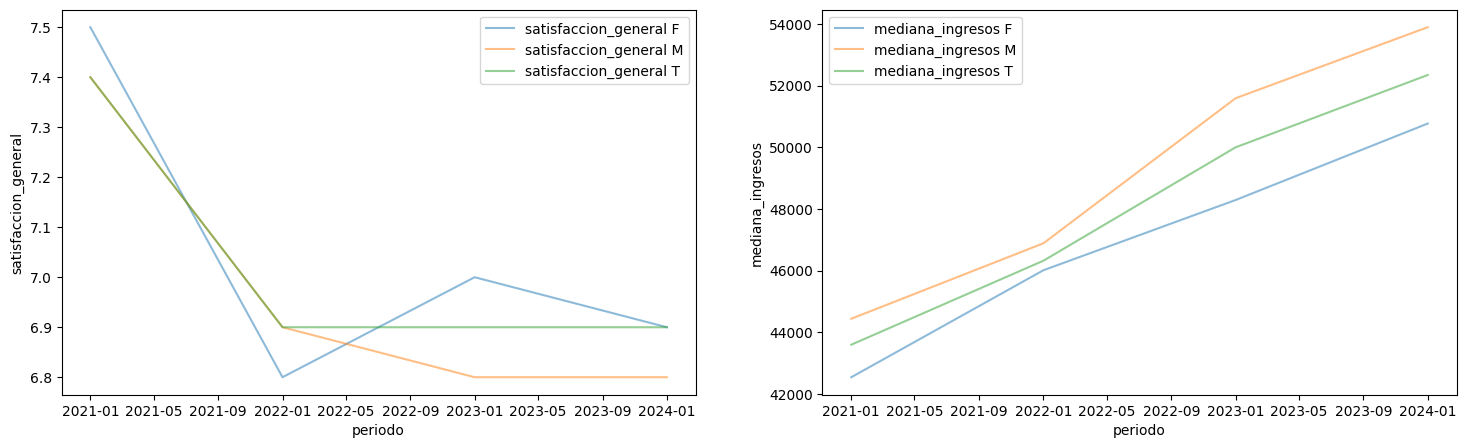

In [1192]:

fig, axs = plt.subplots(1, 2, figsize = (18, 5))

#for h, i in enumerate(df_temp.edad.unique()):
for j in df_temp.genero.unique():
    sns.lineplot(x = "periodo", y = "satisfaccion_general", data = df_temp.loc[df_temp.genero == j], label = f"satisfaccion_general {j}", ax = axs[0], alpha = 0.5)
    sns.lineplot(x = "periodo", y = "mediana_ingresos", data = df_temp.loc[df_temp.genero == j], label = f"mediana_ingresos {j}", ax = axs[1], alpha = 0.5)

La satisfacción ha seguido claramente una tendencia descendente desde 2021 hasta 2024, en los hombres no ha crecido en ningún momento. Sin embargo, en las mujeres sí que creció de 2023 a 2023, pero volvió a descender en 2024 y, en todo caso, siempre por debajo de los niveles de 2021. Los ingresos, por el contrario no han parado de crecer, además, significativamente, por lo que el aumento de ingresos no va ligado al aumento de la satisfacción y serán otros motivos los que afectan a nuestro grupo objetivo.

## Visualizaciones

### edad - satisfaccion_general

In [1193]:
datos = df_sat.groupby("edad")["satisfaccion_general"].mean()

In [1194]:
datos.index

Index(['Y16-19', 'Y16-24', 'Y20-24', 'Y25-29', 'Y25-34', 'Y25-64', 'Y35-49',
       'Y50-64', 'Y65-74', 'Y_GE16', 'Y_GE65', 'Y_GE75'],
      dtype='object', name='edad')

In [1195]:
datos = datos.copy()[["Y16-24", "Y35-49", "Y_GE75"]]
datos = round(datos, 2)
datos.index = ["16 a 24 años", "35 a 49 años", "75+ años"]
datos

16 a 24 años    7.61
35 a 49 años    7.20
75+ años        6.97
Name: satisfaccion_general, dtype: float64

([], [])

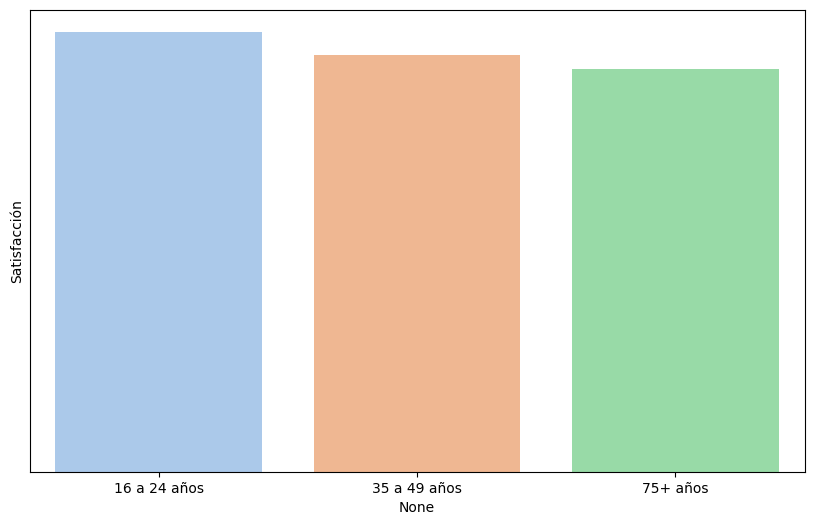

In [1196]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=datos.index, y=datos.values, hue = datos.index, palette= "pastel")
plt.ylabel("Satisfacción")
plt.yticks([])

### satisfaccion_general - mediana_ingresos

In [1197]:
cond1 = df_sat.categoria_satisfaccion == "baja"
datos = df_sat.copy().loc[cond1]
datos = datos.categoria_ingresos.value_counts(normalize=True)
datos.index = ["bajos", "altos", "muy altos"]

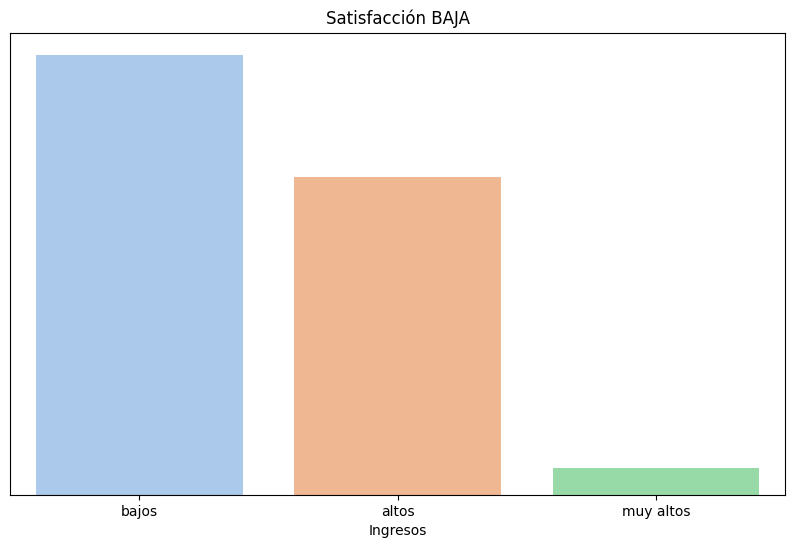

In [1198]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=datos.index, y=datos.values, hue=datos.index, palette="pastel")

plt.title("Satisfacción BAJA")
plt.xlabel("Ingresos")
plt.yticks([]);

### no_afrontar_imprevistos(%) - satisfaccion_general

In [1199]:
cond1 = df_sat.categoria_imprevistos == "bajo"
datos = df_sat.copy().loc[cond1]
datos = datos.categoria_satisfaccion.value_counts(normalize=True)
datos

categoria_satisfaccion
alta        0.594718
baja        0.391776
muy baja    0.013505
Name: proportion, dtype: float64

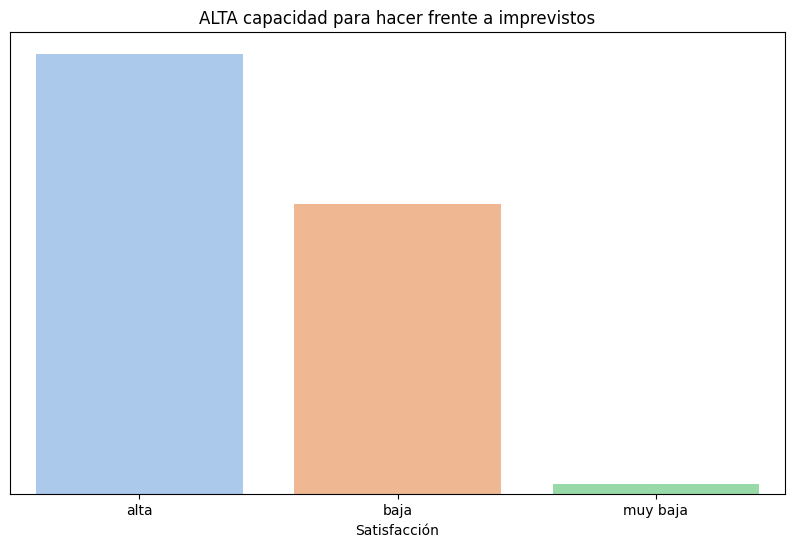

In [1200]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=datos.index, y=datos.values, hue=datos.index, palette="pastel")

plt.title("ALTA capacidad para hacer frente a imprevistos")
plt.xlabel("Satisfacción")
plt.yticks([]);


In [1204]:
cond1 = df_sat.isced11 == 'TOTAL'
cond2 = df_sat.genero == 'T'
cond3 = df_sat.edad == 'Y35-49'
cond4 = df_sat.geo == "LU"
cond5 = df_sat.periodo == "2024"

df_num = df_sat.loc[cond1 & cond2 & cond3 & cond4 & cond5] # Como esta variable es igual para todos los grupos de un país y un año, nos quedamos solo con un registro de cada país y año
df_num


,isced11,genero,edad,edad_ingresos,geo,periodo,satisfaccion_general,categoria_satisfaccion,mediana_ingresos,categoria_ingresos,media_ingresos,no_afrontar_imprevistos(%),categoria_imprevistos
16215,TOTAL,T,Y35-49,Y25-49,LU,2024-01-01,6.9,baja,52343.0,muy alta,59322.0,22.5,bajo
